In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [2]:
ticker = 'ATVI'
data = pd.DataFrame()
data[ticker] = wb.get_data_yahoo(ticker, start='2010-1-1')['Adj Close']
data.head()

ATVI
Date                 
2010-01-04  10.077829
2010-01-05  10.095665
2010-01-06  10.042156
2010-01-07   9.801357
2010-01-08   9.721090

In [3]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

ATVI
Date                
2010-01-04       NaN
2010-01-05  0.001768
2010-01-06 -0.005314
2010-01-07 -0.024271
2010-01-08 -0.008223

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

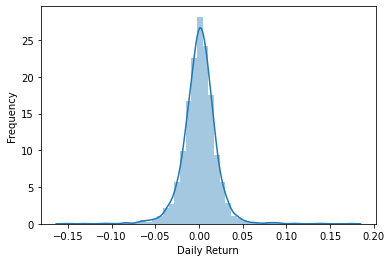

In [4]:
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='Date'>

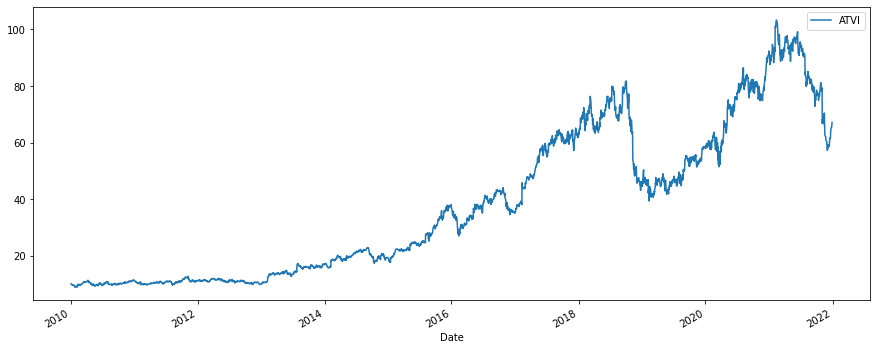

In [5]:
data.plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

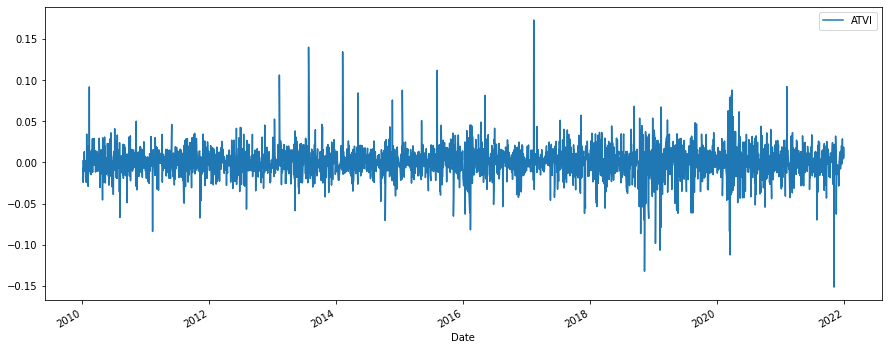

In [6]:
log_returns.plot(figsize=(15,6))

In [7]:
u = log_returns.mean()
var = log_returns.var()

$$
{drift} = {u} - \frac{1}{2} * {var}
$$

In [8]:
drift = u - (0.5*var)
drift

ATVI    0.000438
dtype: float64

In [9]:
stddev = log_returns.std()

In [10]:
x = np.random.rand(10,2)
x

array([[0.65283399, 0.73639921],
       [0.54286343, 0.5444694 ],
       [0.05009325, 0.94453747],
       [0.07075231, 0.90385134],
       [0.57602839, 0.75440922],
       [0.917093  , 0.18119646],
       [0.46067187, 0.84224532],
       [0.35005656, 0.46300307],
       [0.00981824, 0.04889449],
       [0.20782575, 0.56037558]])

In [11]:
norm.ppf(x)

array([[ 0.39298302,  0.63228359],
       [ 0.10765024,  0.1117001 ],
       [-1.64395018,  1.594049  ],
       [-1.47021097,  1.30381309],
       [ 0.1917434 ,  0.68843074],
       [ 1.38578032, -0.91081487],
       [-0.09874123,  1.00372878],
       [-0.38516778, -0.09287088],
       [-2.33322235, -1.65566842],
       [-0.81398856,  0.15192152]])

In [12]:
Z = norm.ppf(np.random.rand(50,10000))
Z

array([[ 0.33098725, -0.43530673,  0.10978133, ...,  0.04326415,
        -0.55387261,  0.05121443],
       [ 0.11838697,  1.41115035,  0.77866018, ..., -1.97110705,
        -1.50278503,  1.00105314],
       [ 0.99377896, -0.60430707,  0.18028699, ..., -0.66047676,
         0.57673191, -0.77388466],
       ...,
       [ 0.24221042,  0.27165824,  1.96490314, ..., -0.39891187,
        -1.55898123,  0.5072365 ],
       [ 0.8951316 ,  0.91515901, -0.03926298, ..., -0.90562361,
         0.80490753,  0.9200034 ],
       [ 1.51130345,  0.47217193,  0.56723429, ..., -0.49967606,
        -0.04568106, -1.96826622]])

In [13]:
t_intervals = 1000
iterations = 10

$$
{daily}_{returns} = {e^r}
$$

$$
{r}={drift}+{stdev*z}
$$

In [14]:
daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))

In [15]:
daily_returns

array([[0.99507522, 0.99587221, 1.03373797, ..., 1.00774244, 1.00695458,
        0.9916432 ],
       [0.99585979, 1.01105816, 0.975389  , ..., 0.99893214, 0.98145218,
        0.99625562],
       [1.00291125, 1.00938038, 0.98882012, ..., 0.99616046, 0.9998384 ,
        1.02244645],
       ...,
       [0.95805708, 1.01577638, 0.97894243, ..., 0.98947993, 0.98486081,
        0.97714127],
       [0.99322453, 0.98622514, 1.01417978, ..., 0.99011447, 1.02756827,
        0.98462907],
       [0.9927416 , 0.97479106, 0.97494946, ..., 0.99719205, 1.02871219,
        1.03221404]])

---

In [16]:
S0 = data.iloc[-1]
S0

ATVI    67.118599
Name: 2021-12-29 00:00:00, dtype: float64

In [17]:
price_list = np.zeros_like(daily_returns)

In [18]:
price_list.shape

(50, 1000)

In [19]:
price_list[0] = S0
price_list

array([[67.11859894, 67.11859894, 67.11859894, ..., 67.11859894,
        67.11859894, 67.11859894],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
for t in range(1,50):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [21]:
price_list.shape

(50, 1000)

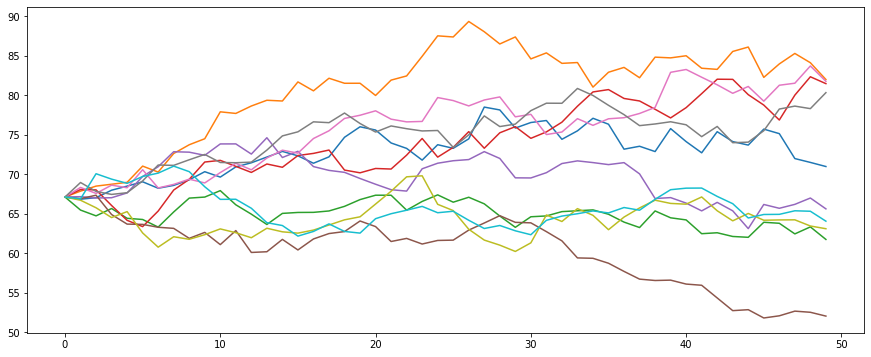

In [22]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])

Text(0.5, 6.79999999999999, 'Price after 50 days')

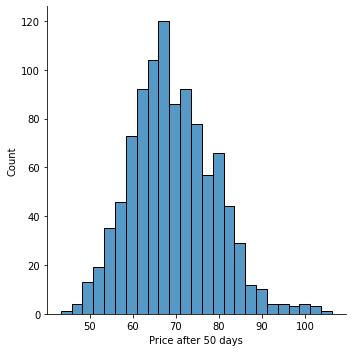

In [23]:
sns.displot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Price after 50 days")

In [24]:
df = pd.DataFrame(price_list)

In [25]:
df.head()

0          1          2          3          4          5    \
0  67.118599  67.118599  67.118599  67.118599  67.118599  67.118599   
1  66.840714  67.860807  65.466743  68.064678  67.162233  66.910247   
2  67.035304  68.497367  64.734833  68.020640  66.993802  67.345308   
3  67.978821  68.734362  65.663885  66.046008  67.027730  64.902996   
4  68.497597  68.974882  64.426986  64.169239  67.637306  63.692165   

         6          7          8          9    ...        990        991  \
0  67.118599  67.118599  67.118599  67.118599  ...  67.118599  67.118599   
1  68.330256  68.953701  66.712242  66.889016  ...  65.573847  67.549651   
2  67.571060  67.824548  65.757836  70.062671  ...  65.033378  69.790422   
3  68.619540  67.448010  64.517238  69.380689  ...  66.284407  70.371016   
4  68.291365  67.661667  65.271522  68.846965  ...  66.462850  70.383606   

         992        993        994        995        996        997  \
0  67.118599  67.118599  67.118599  67.118599  67.118599  67.118599   
1  65.491499  69.840756  68.336957  65.839396  66.468723  67.046925   
2  65.654128  71.097554  66.519145  68.569661  67.743236  66.789496   
3  64.974829  72.459744  64.945316  70.359089  68.192683  67.648575   
4  64.536837  69.521390  64.868518  71.117381  69.425415  68.220727   

         998        999  
0  67.118599  67.118599  
1  65.873695  66.867281  
2  65.863050  68.368215  
3  67.843137  68.590274  
4  66.468845  66.648513  

[5 rows x 1000 columns]

In [26]:
import seaborn as sns

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


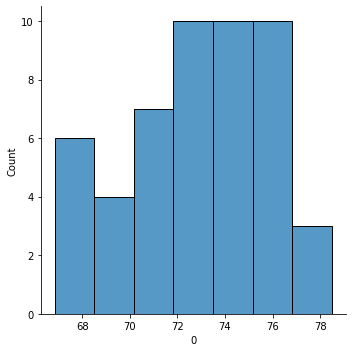

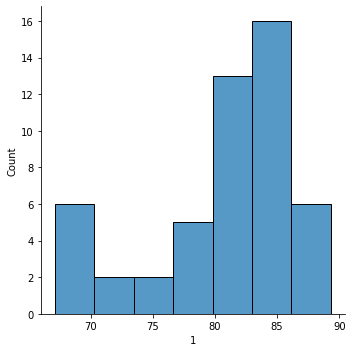

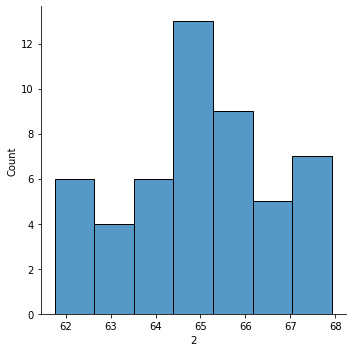

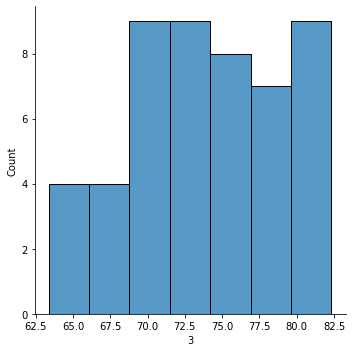

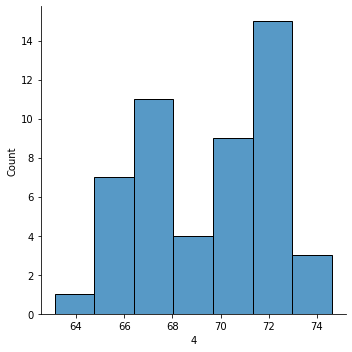

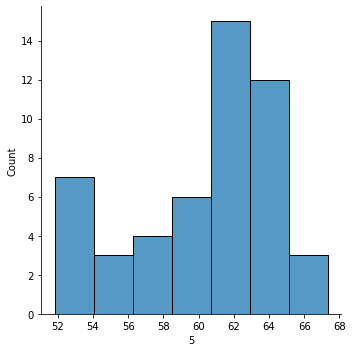

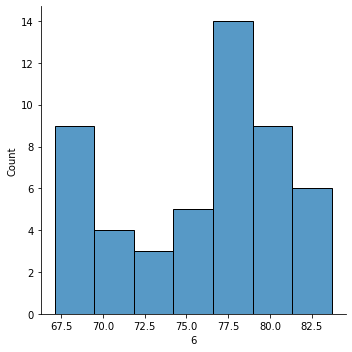

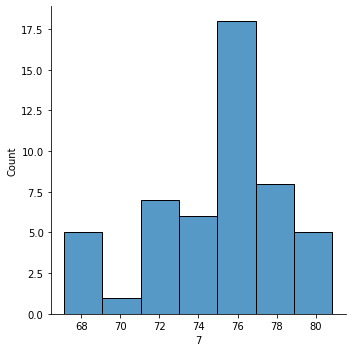

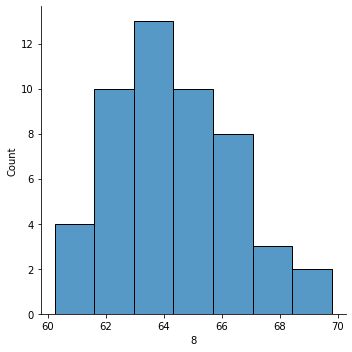

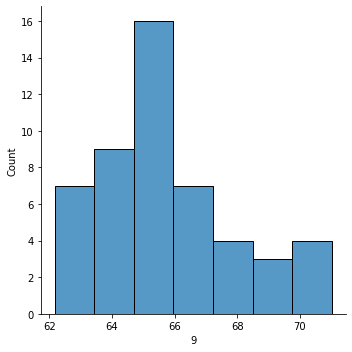

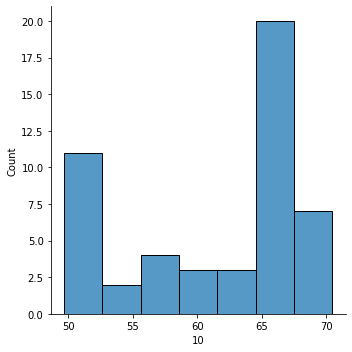

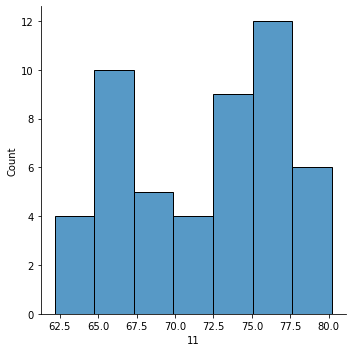

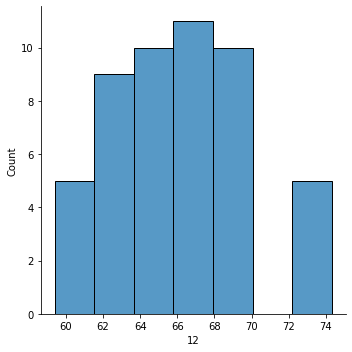

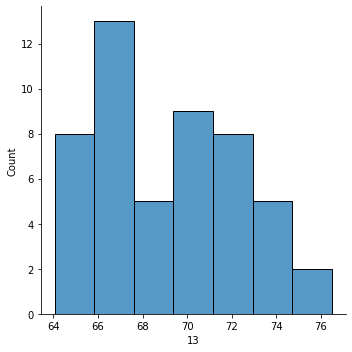

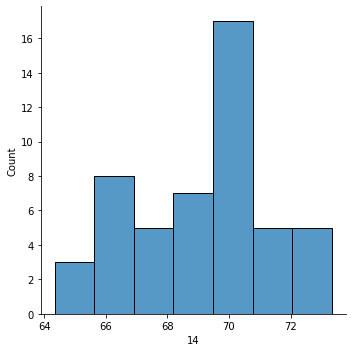

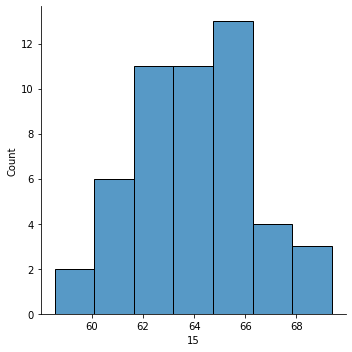

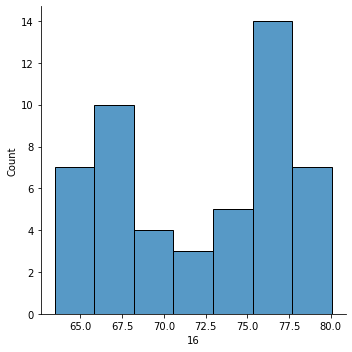

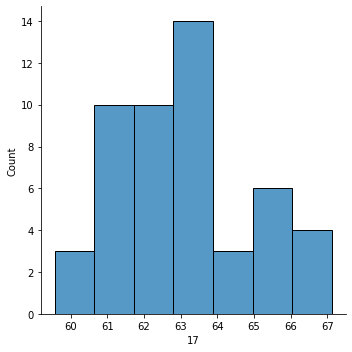

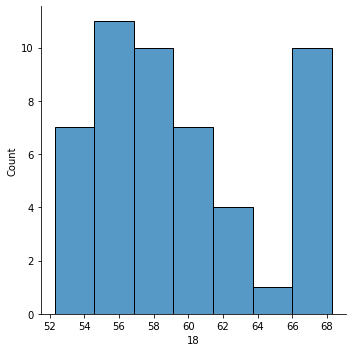

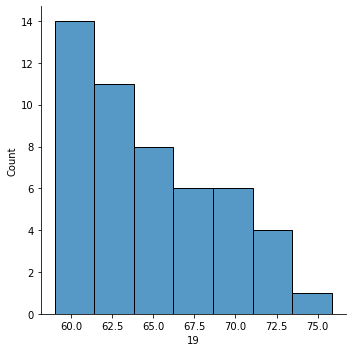

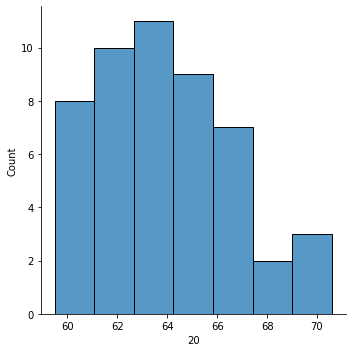

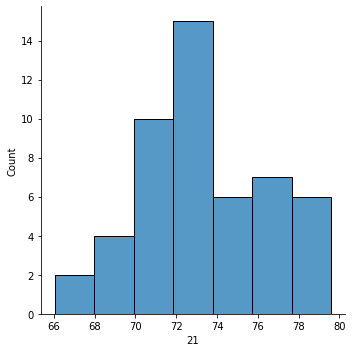

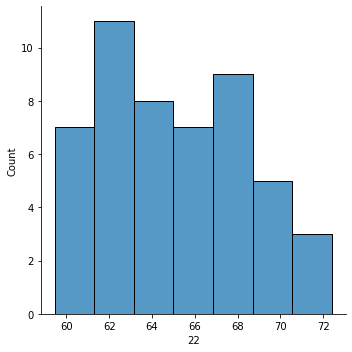

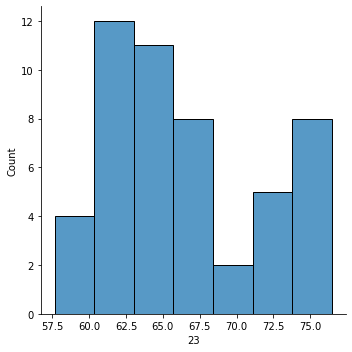

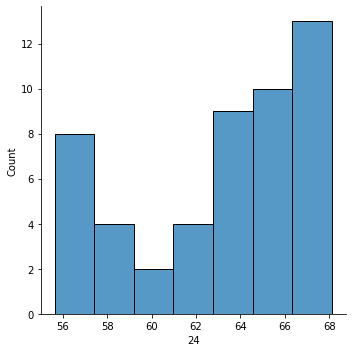

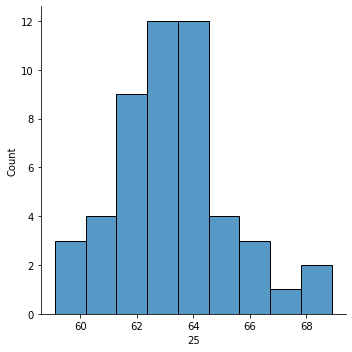

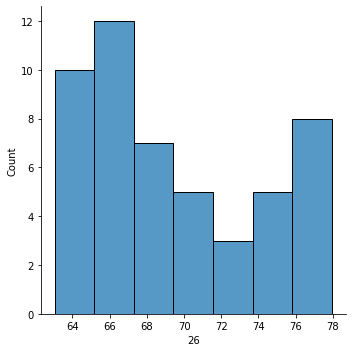

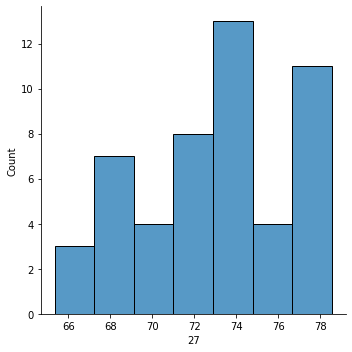

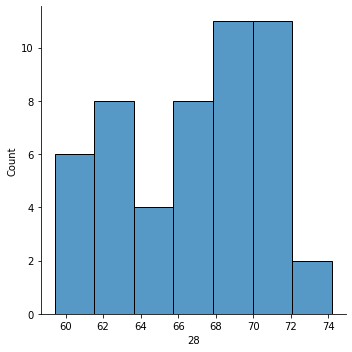

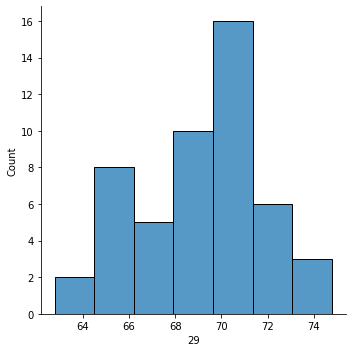

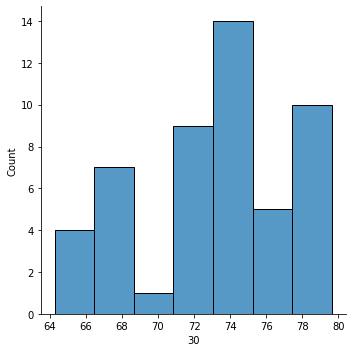

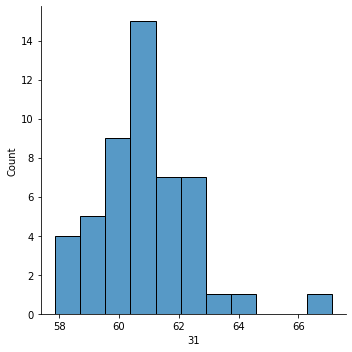

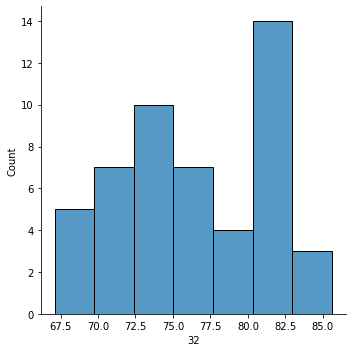

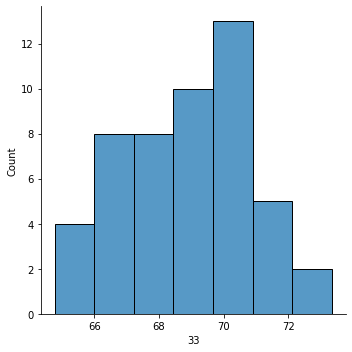

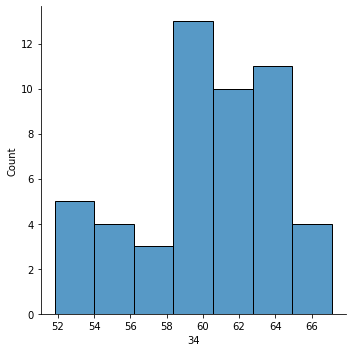

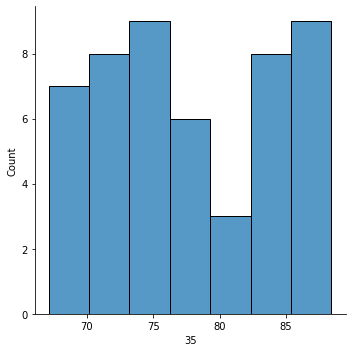

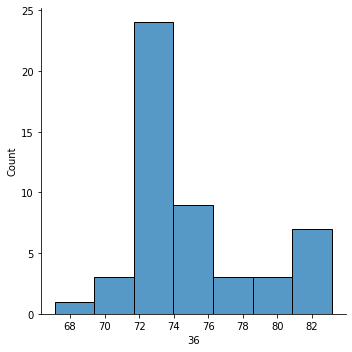

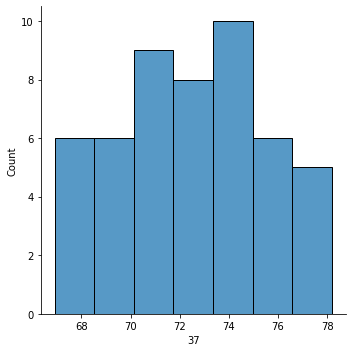

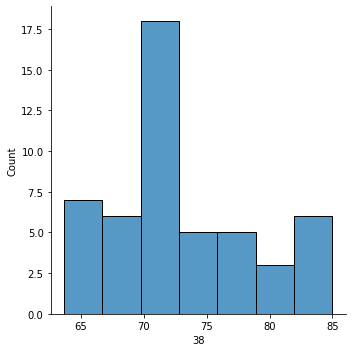

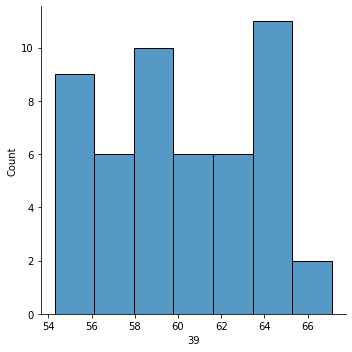

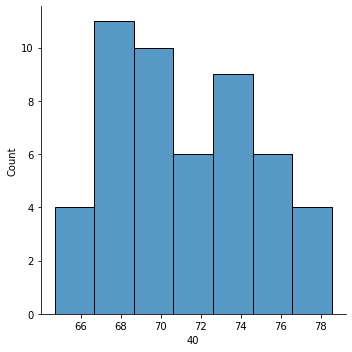

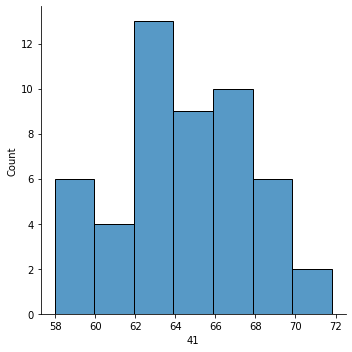

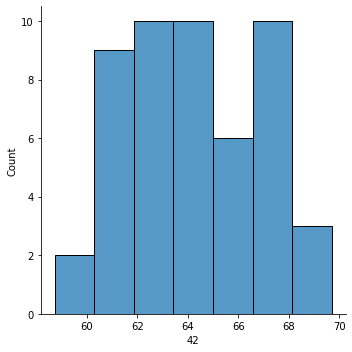

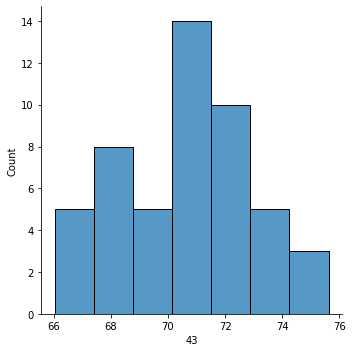

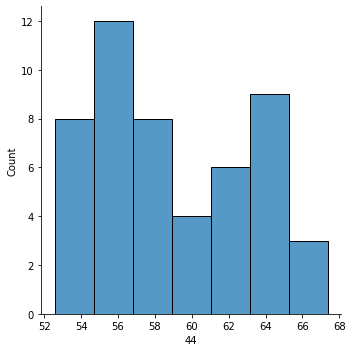

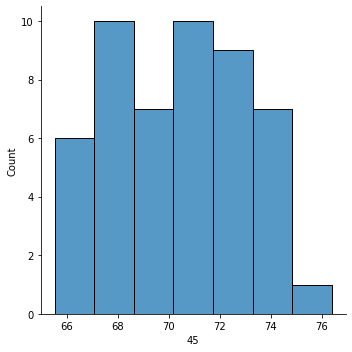

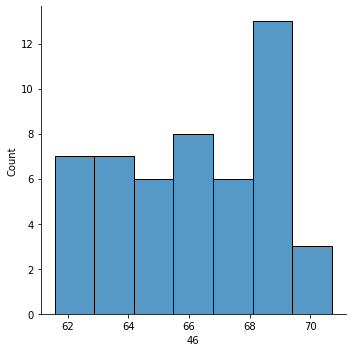

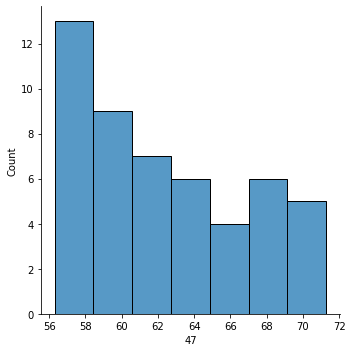

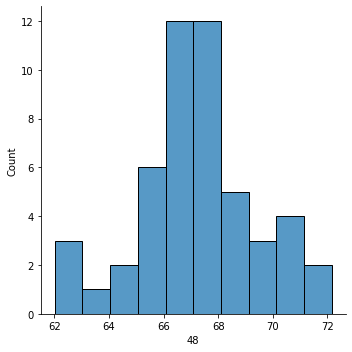

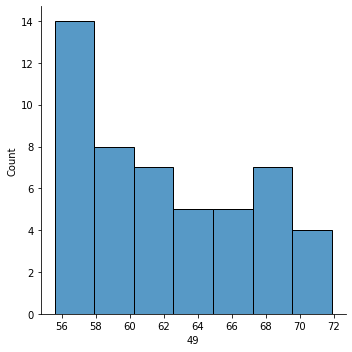

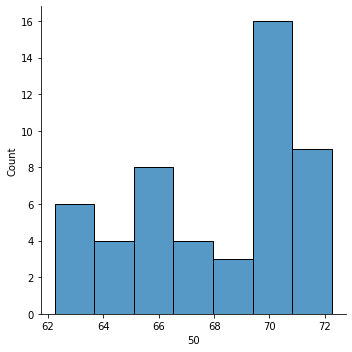

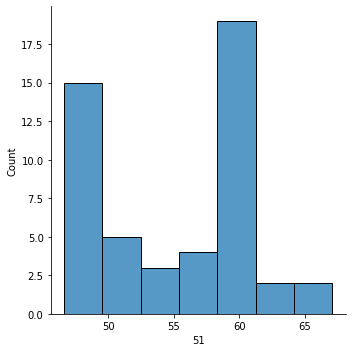

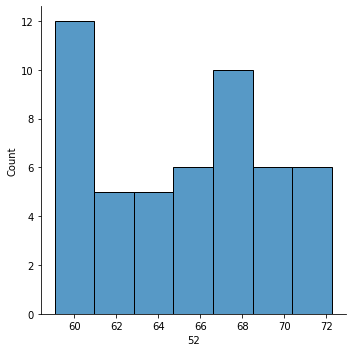

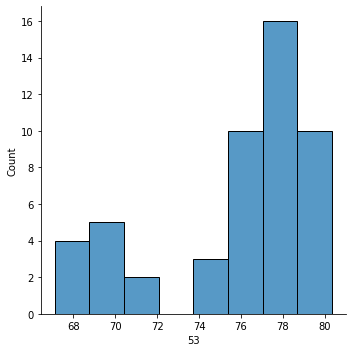

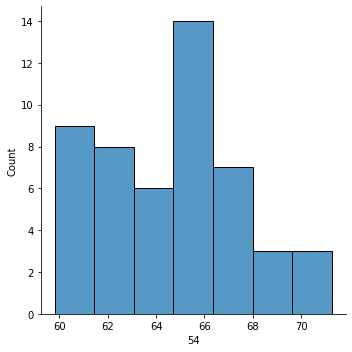

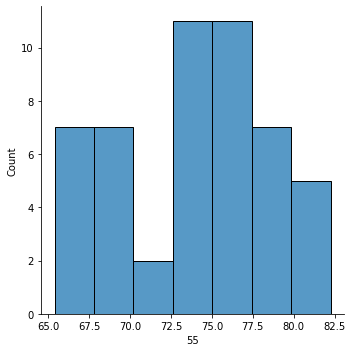

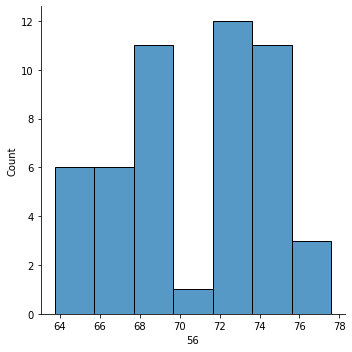

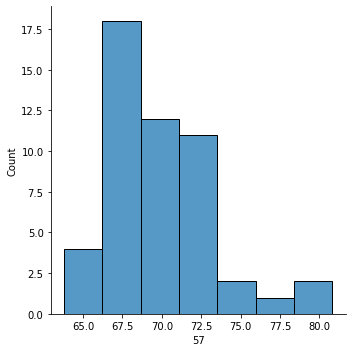

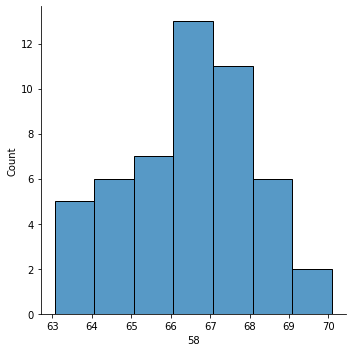

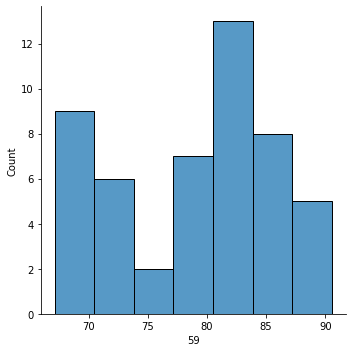

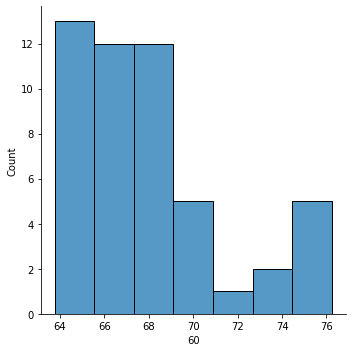

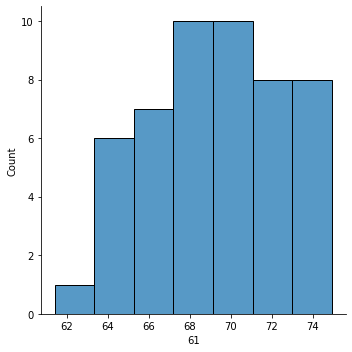

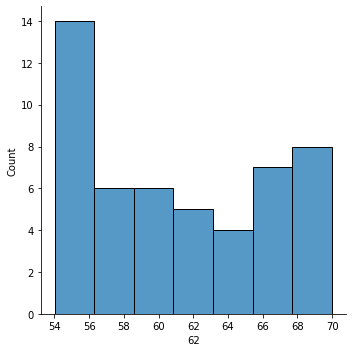

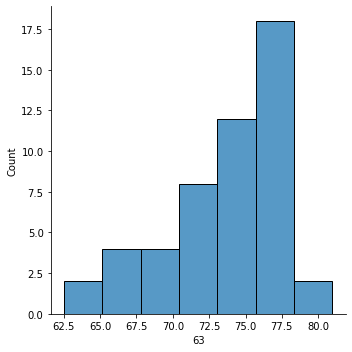

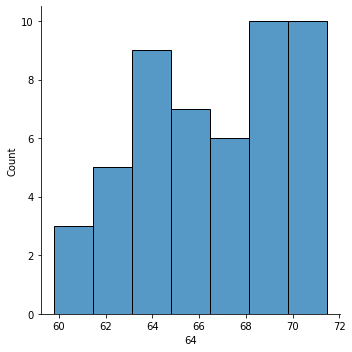

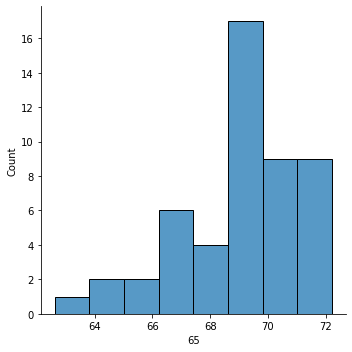

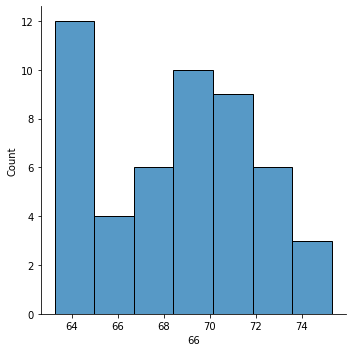

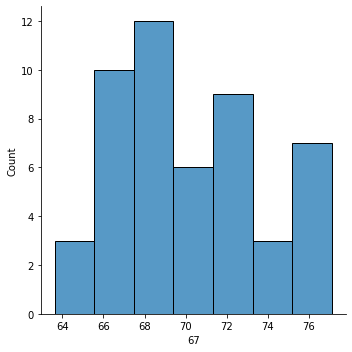

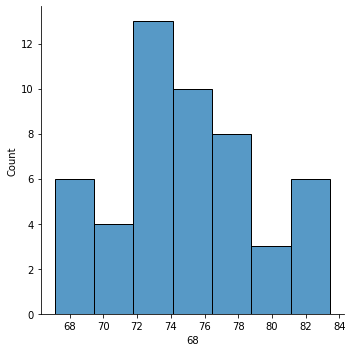

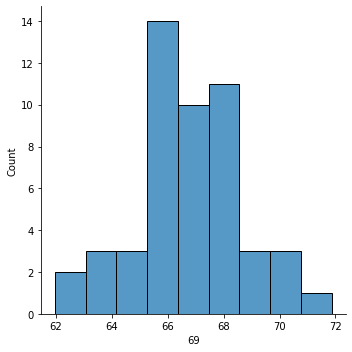

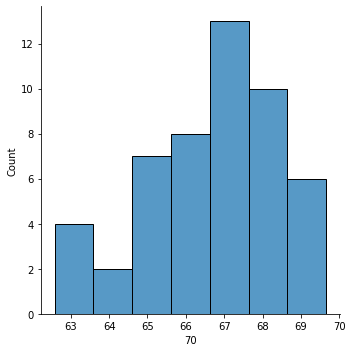

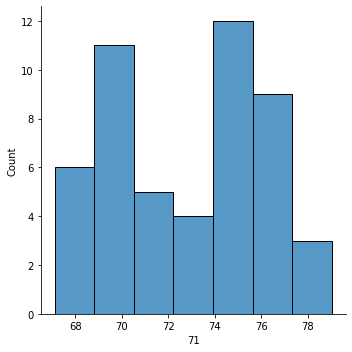

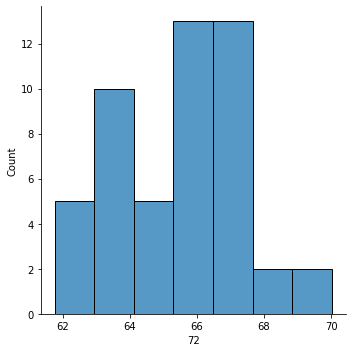

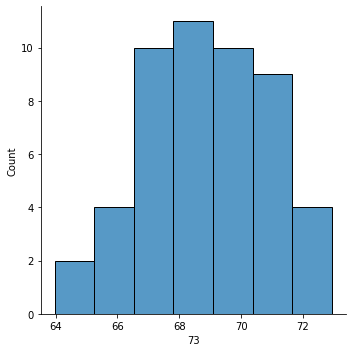

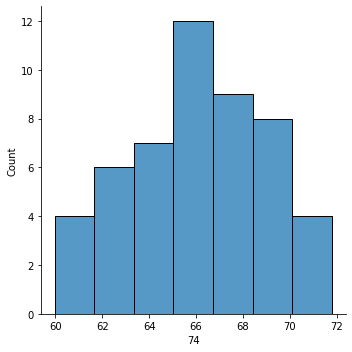

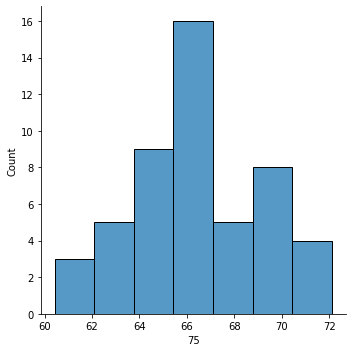

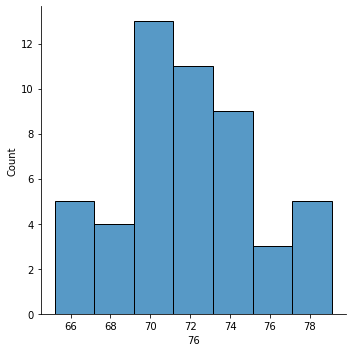

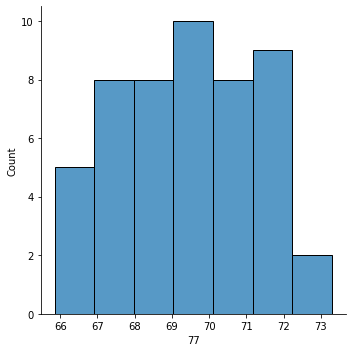

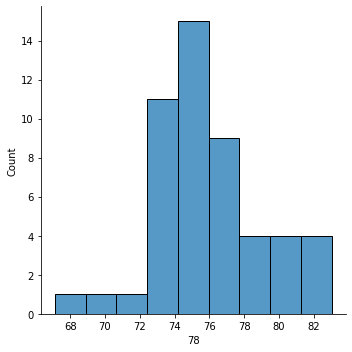

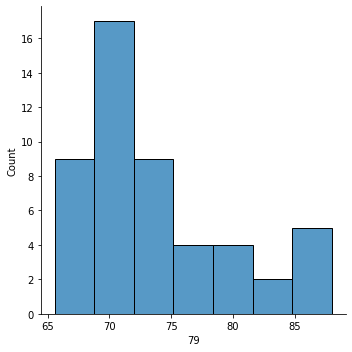

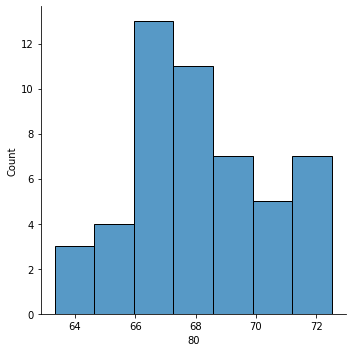

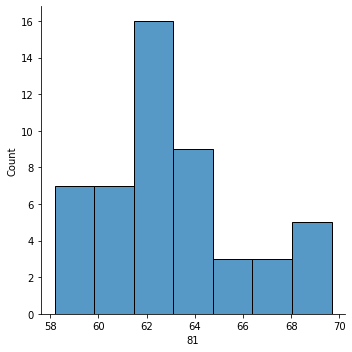

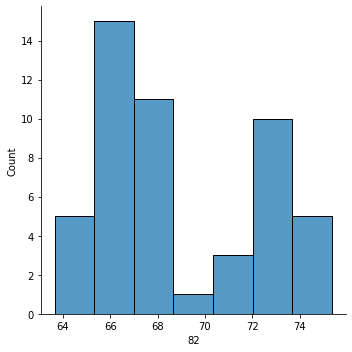

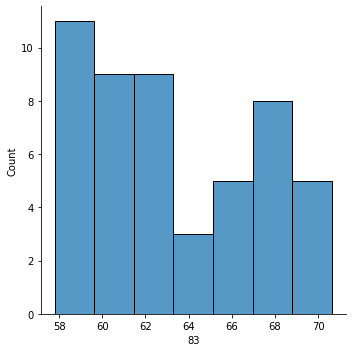

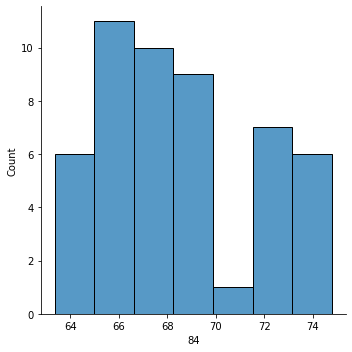

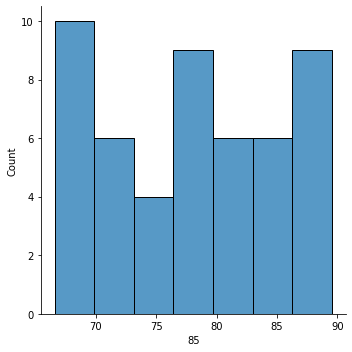

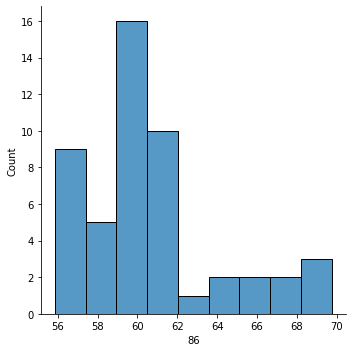

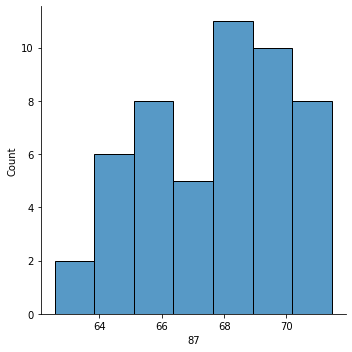

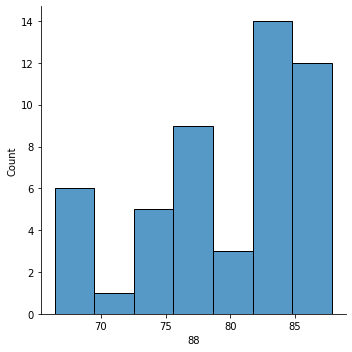

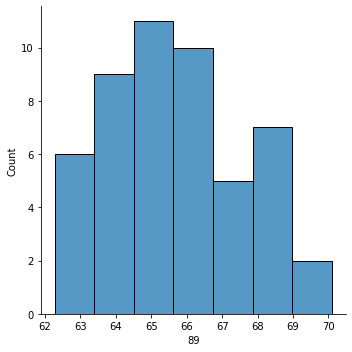

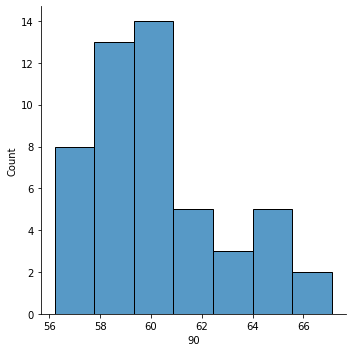

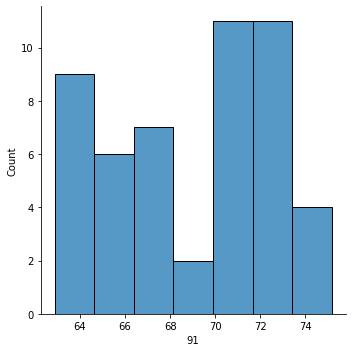

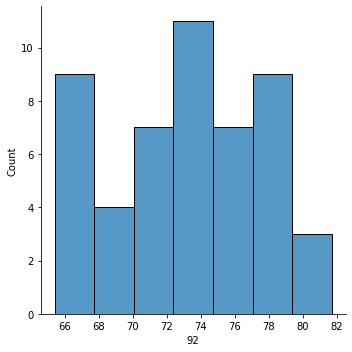

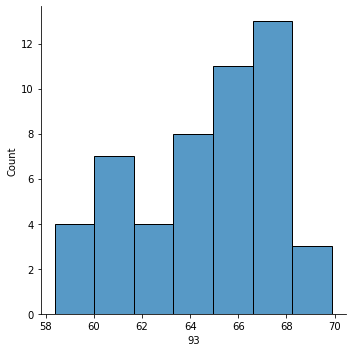

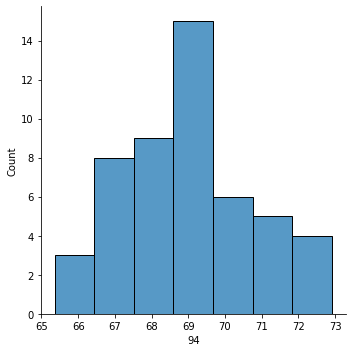

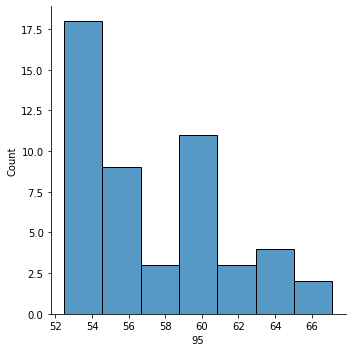

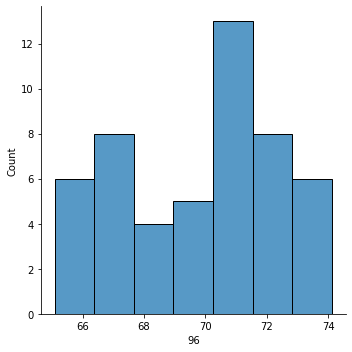

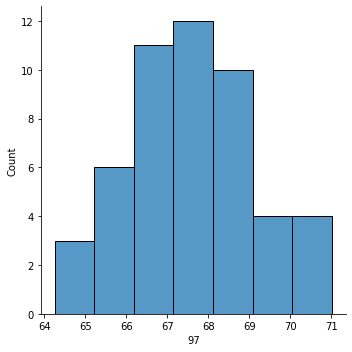

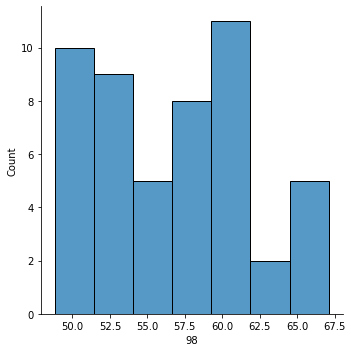

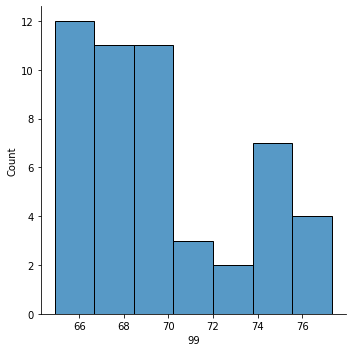

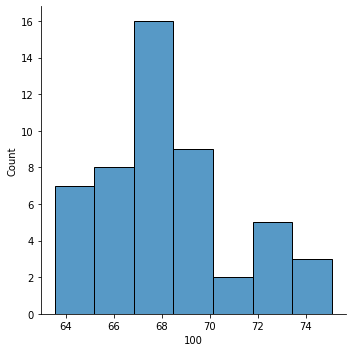

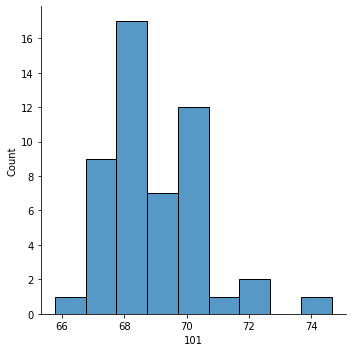

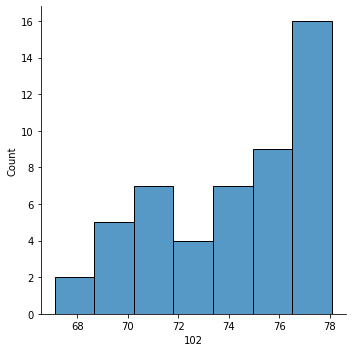

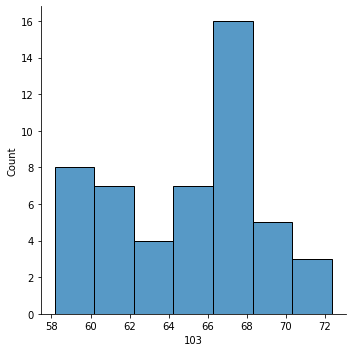

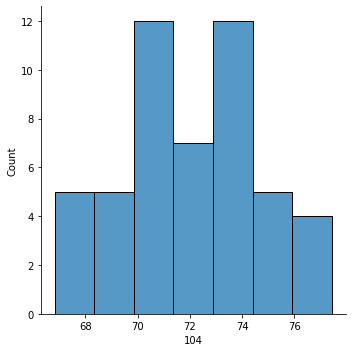

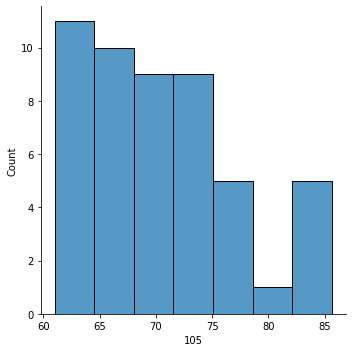

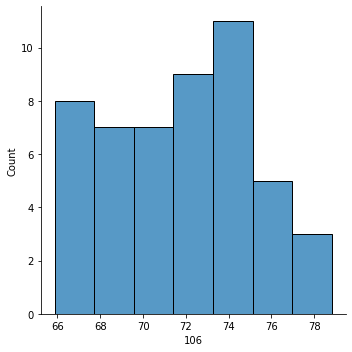

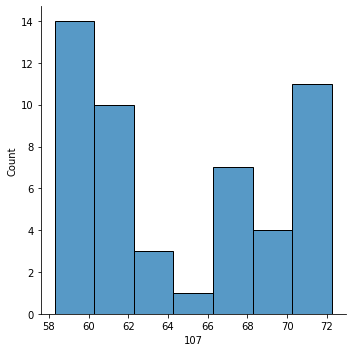

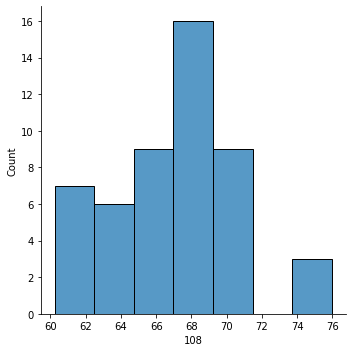

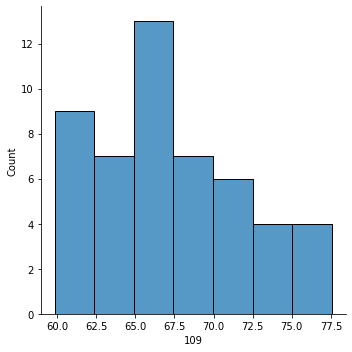

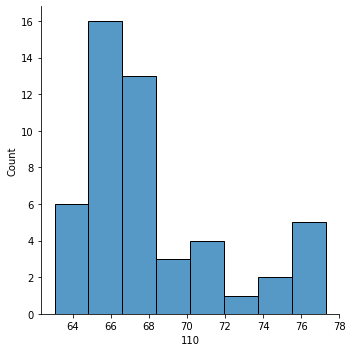

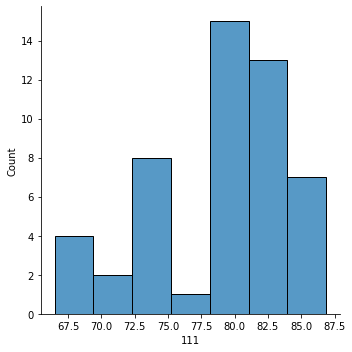

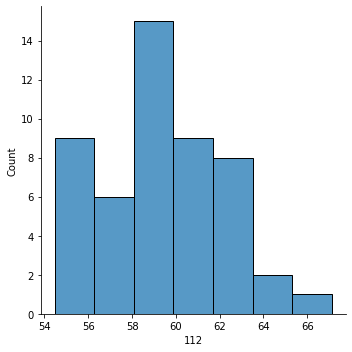

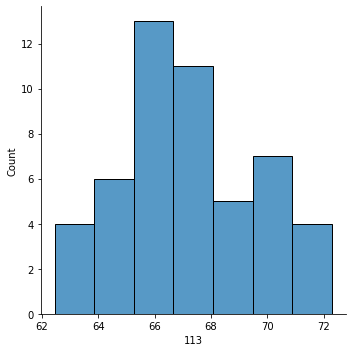

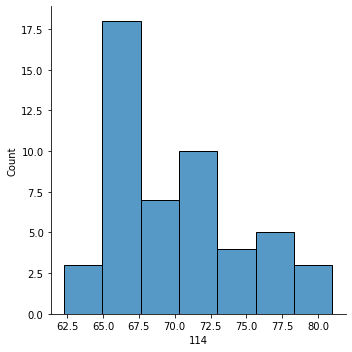

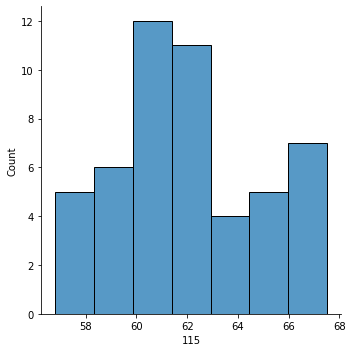

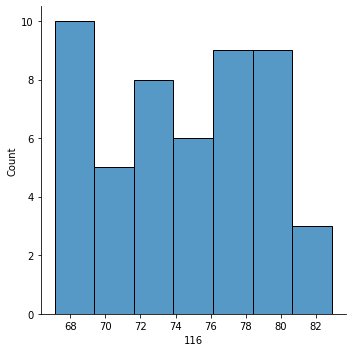

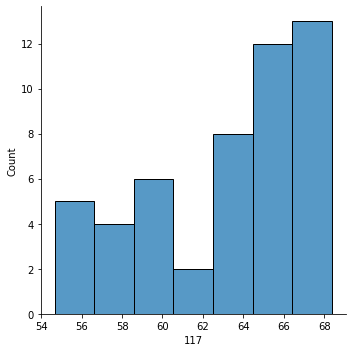

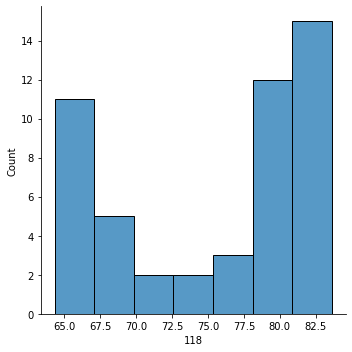

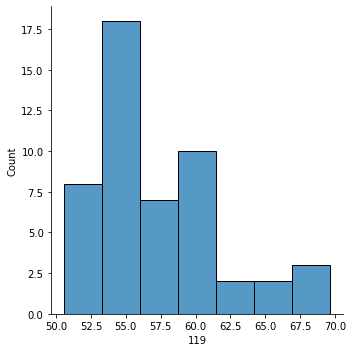

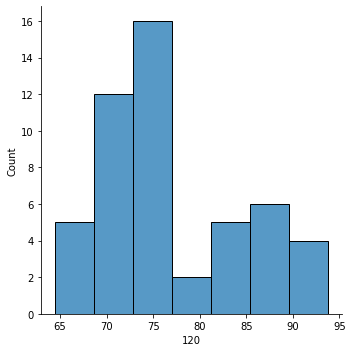

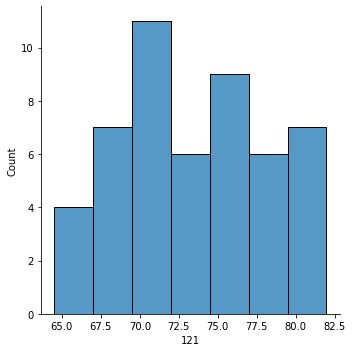

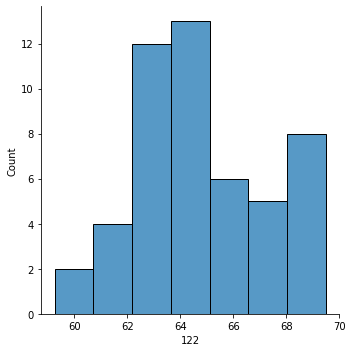

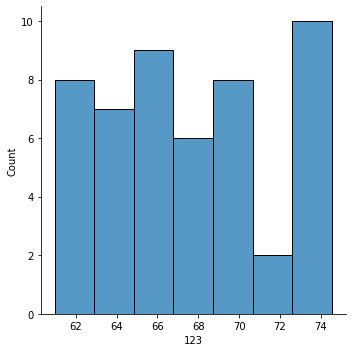

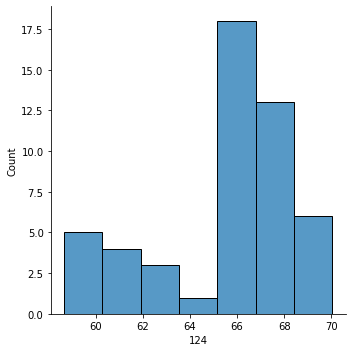

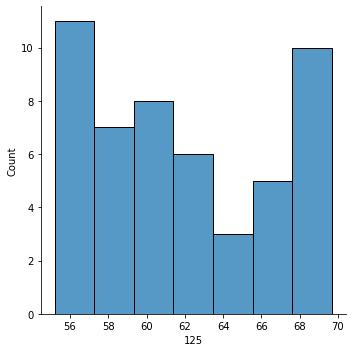

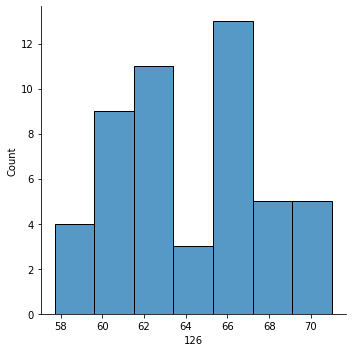

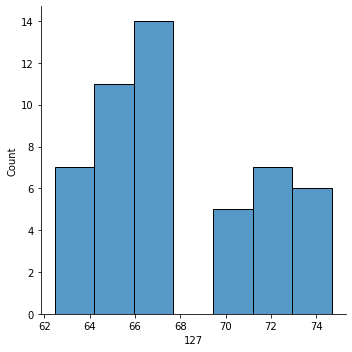

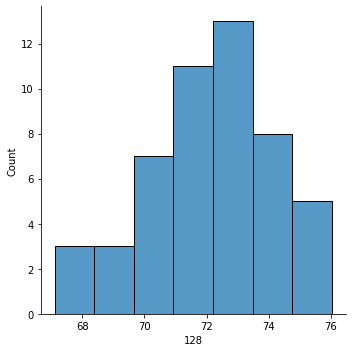

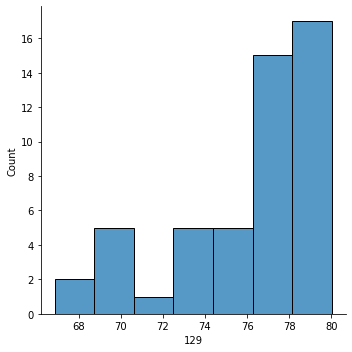

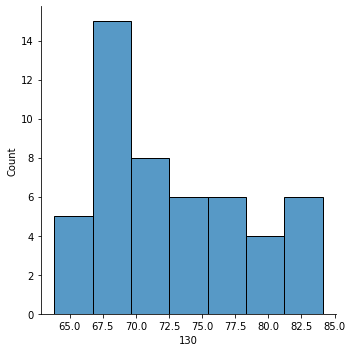

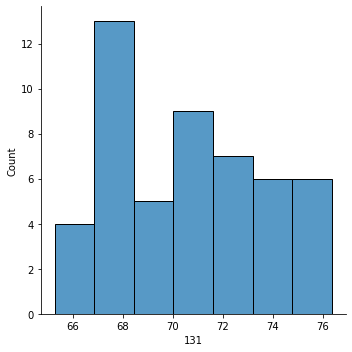

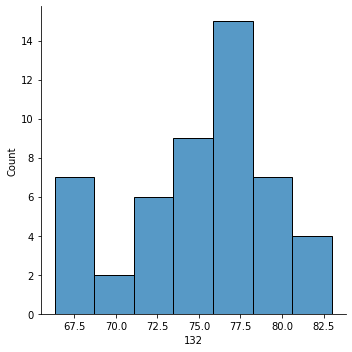

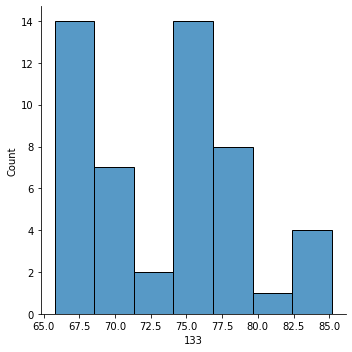

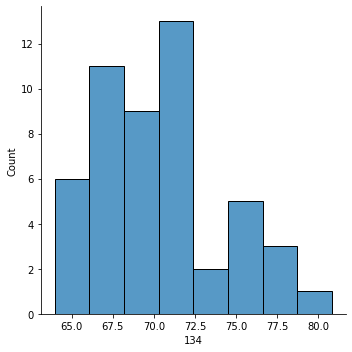

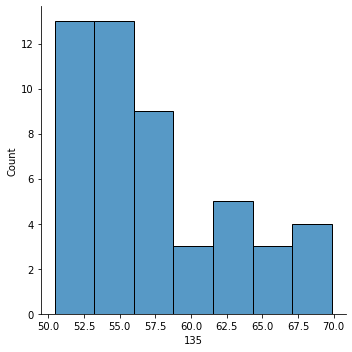

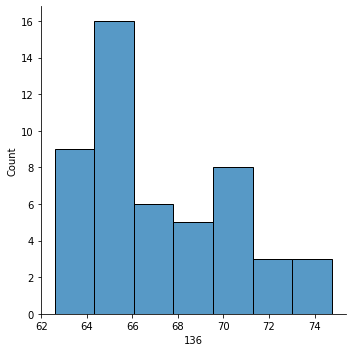

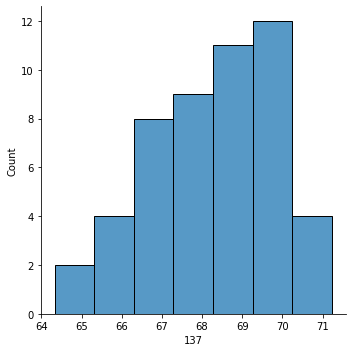

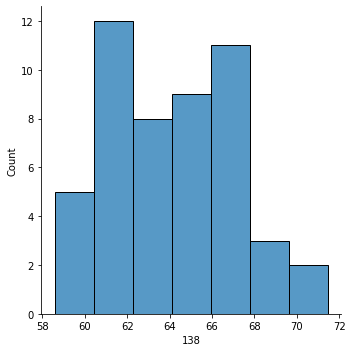

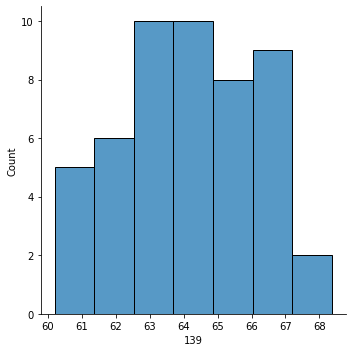

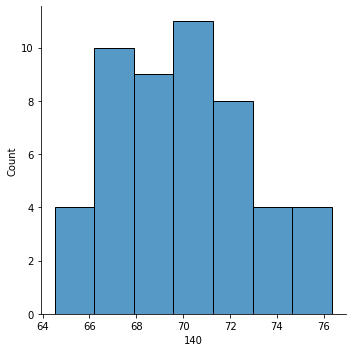

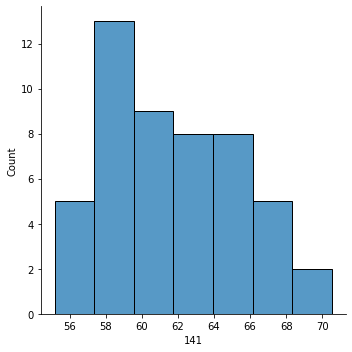

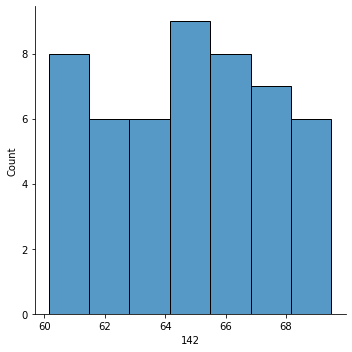

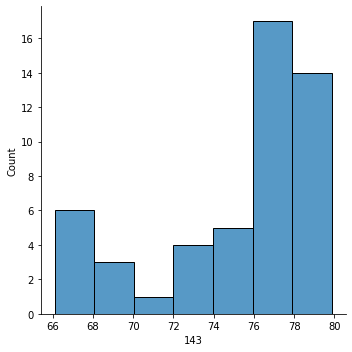

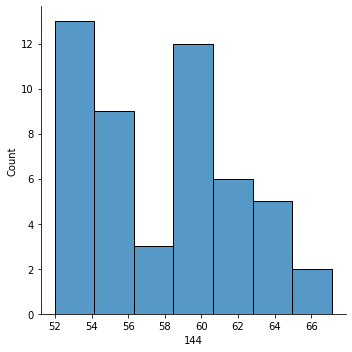

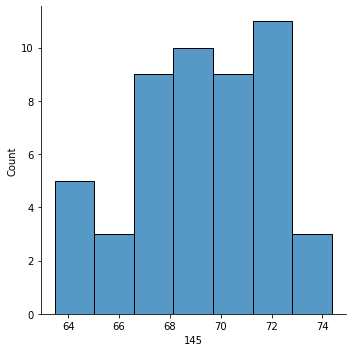

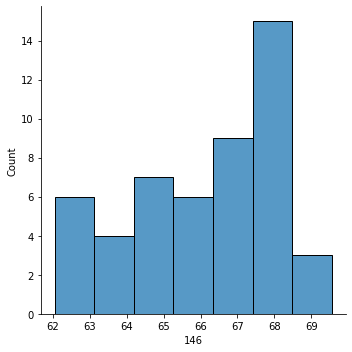

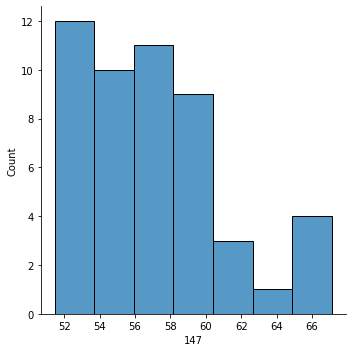

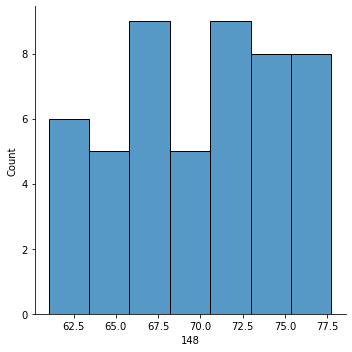

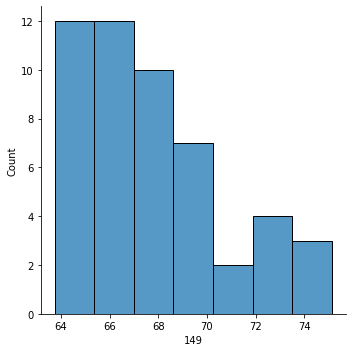

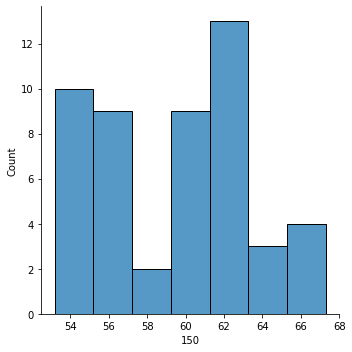

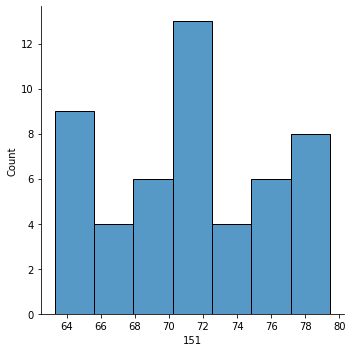

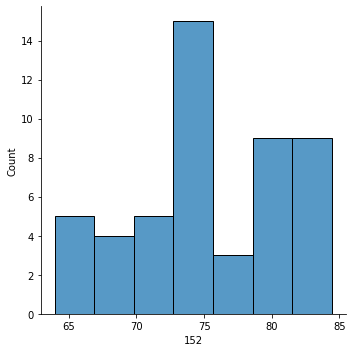

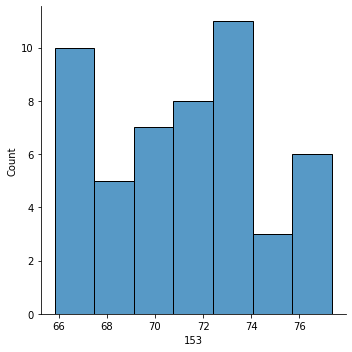

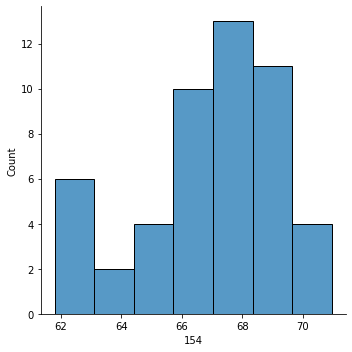

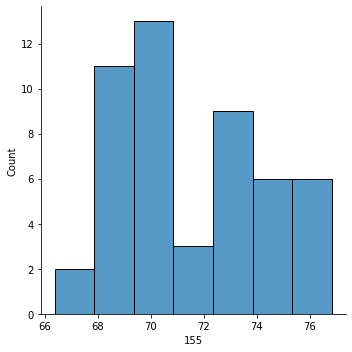

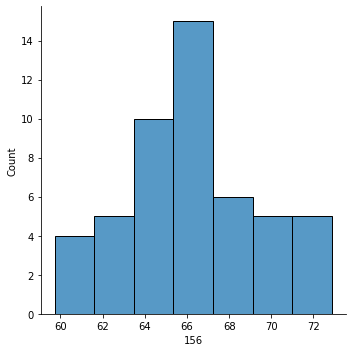

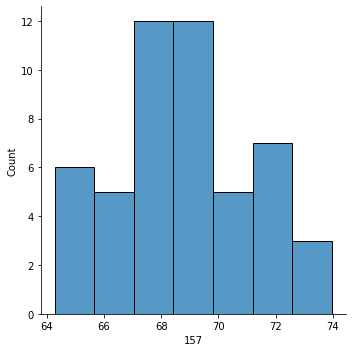

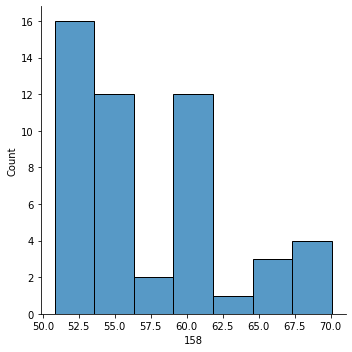

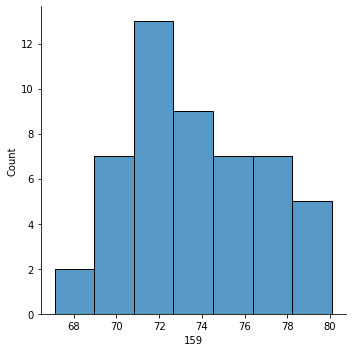

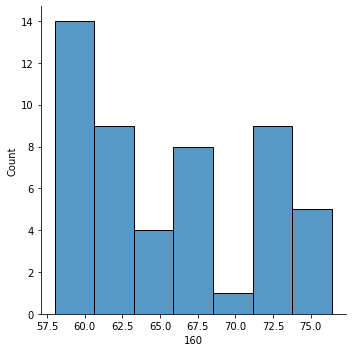

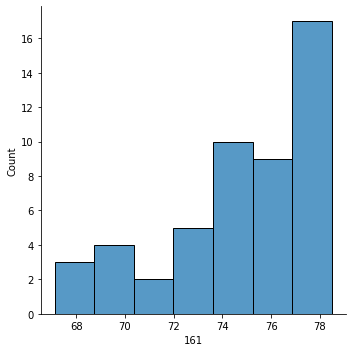

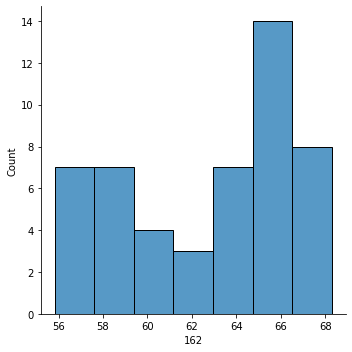

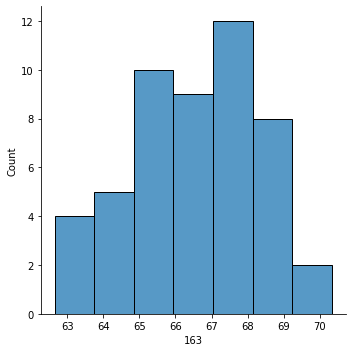

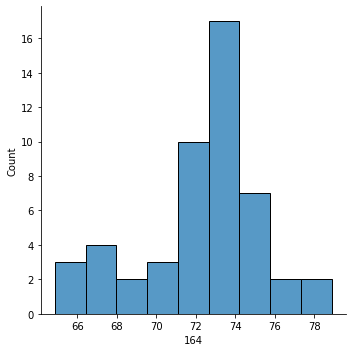

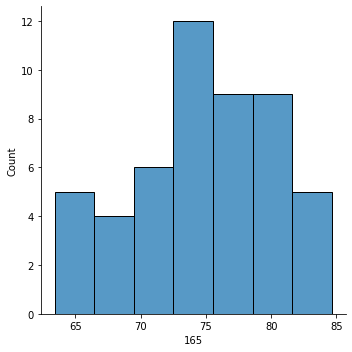

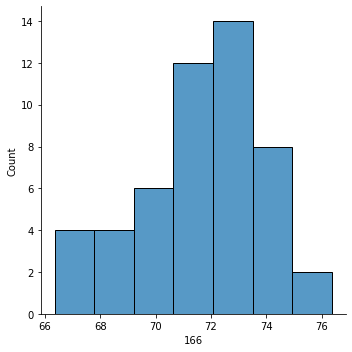

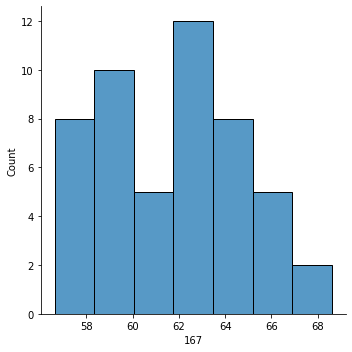

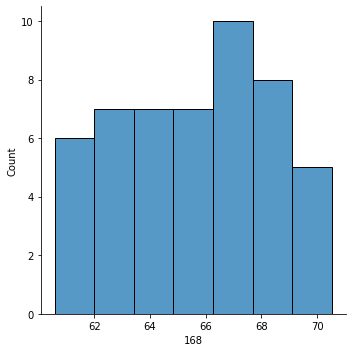

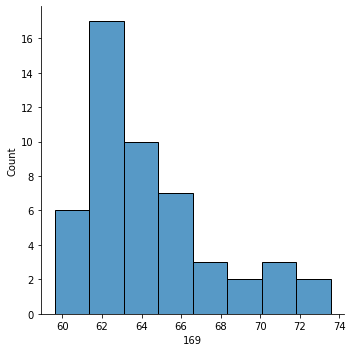

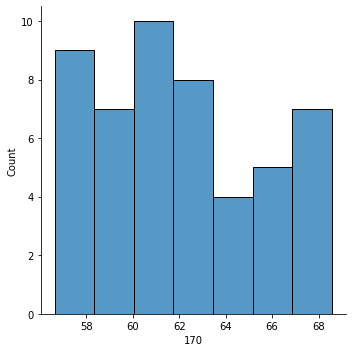

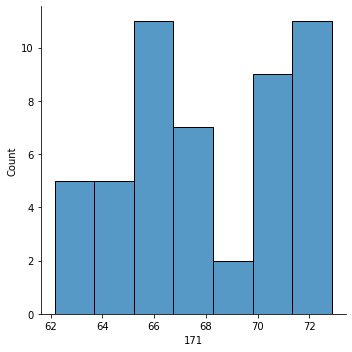

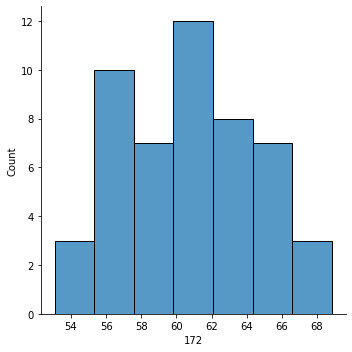

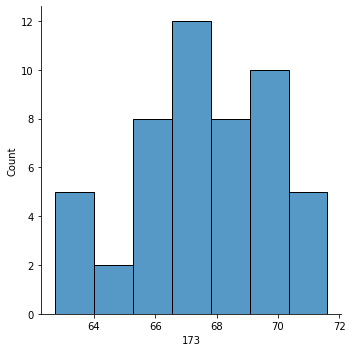

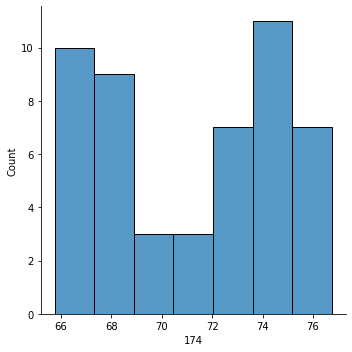

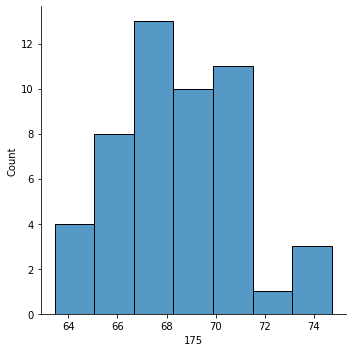

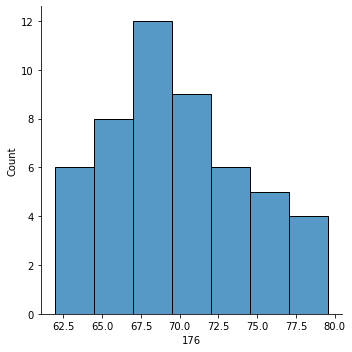

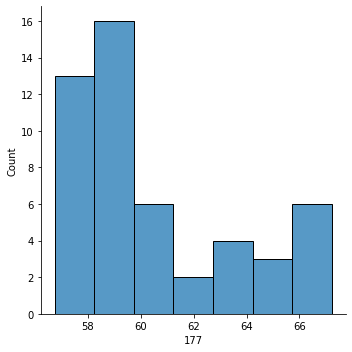

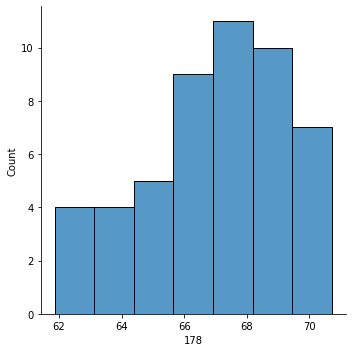

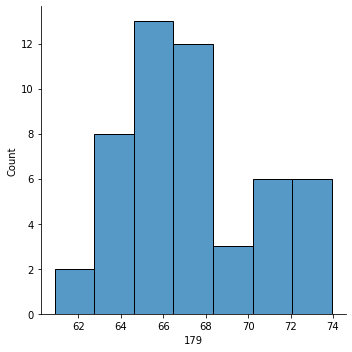

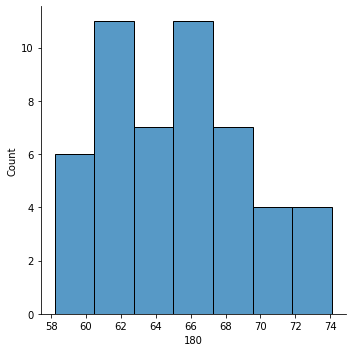

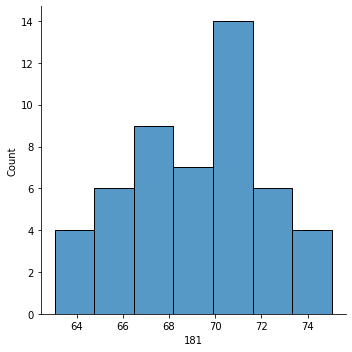

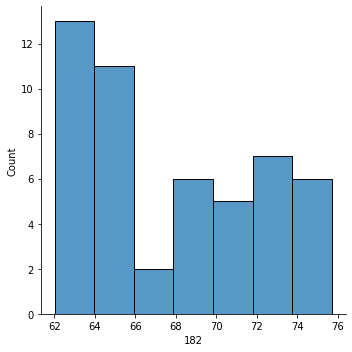

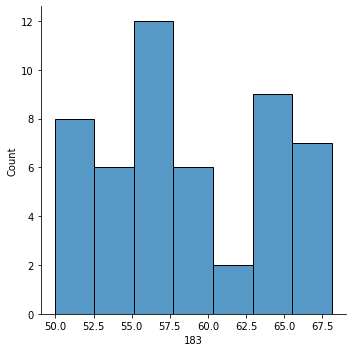

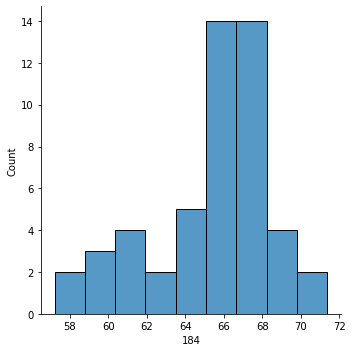

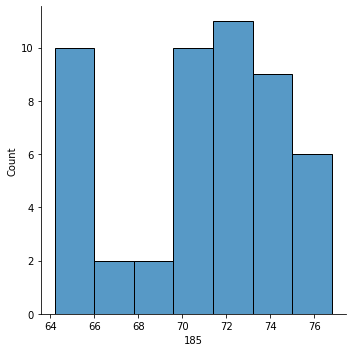

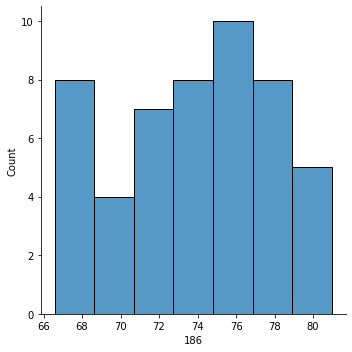

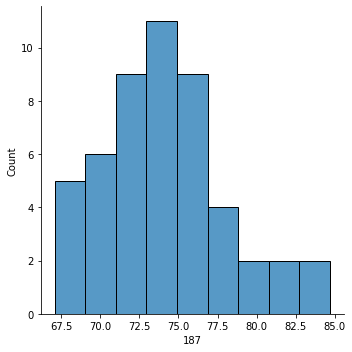

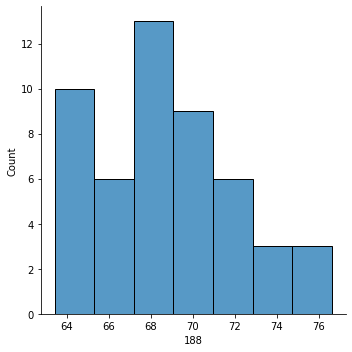

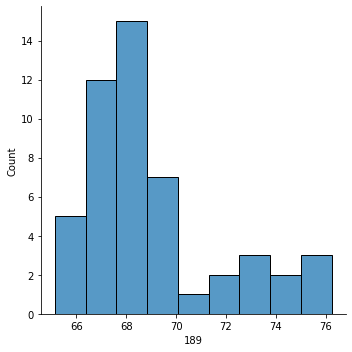

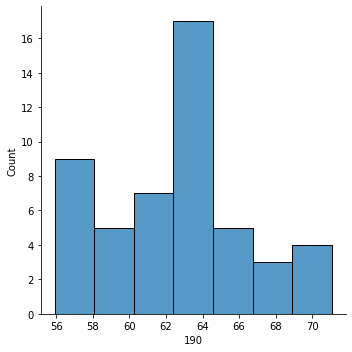

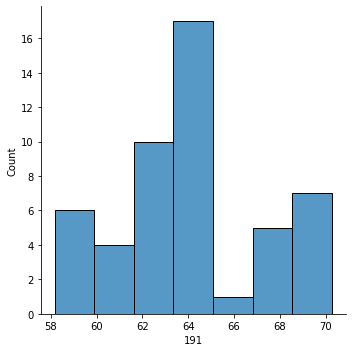

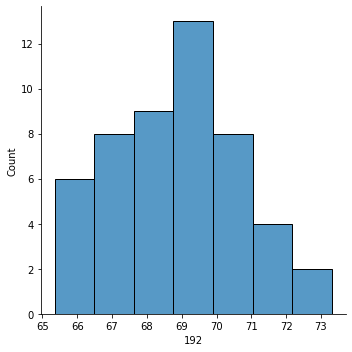

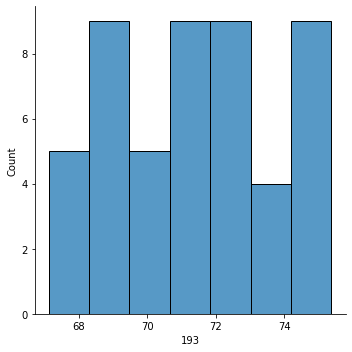

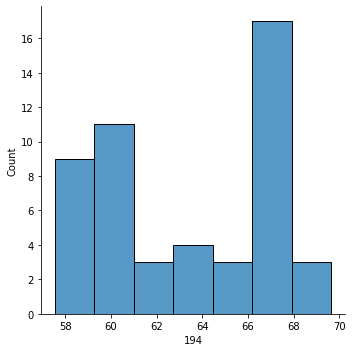

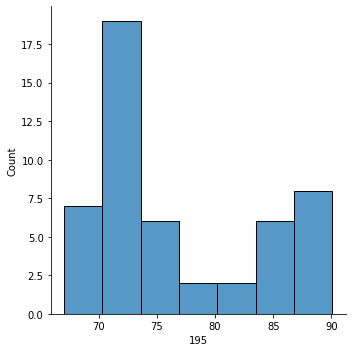

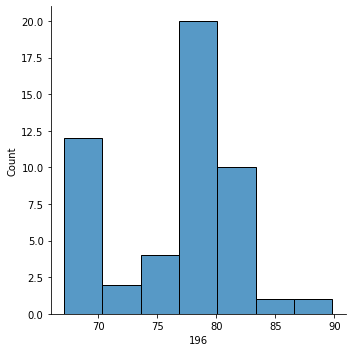

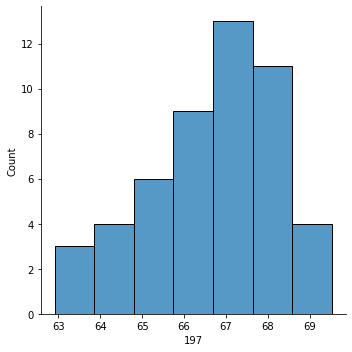

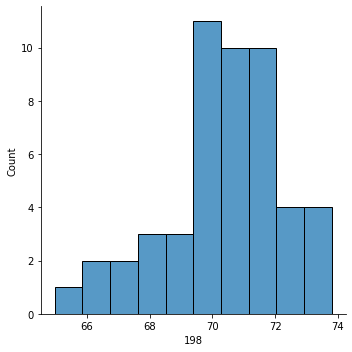

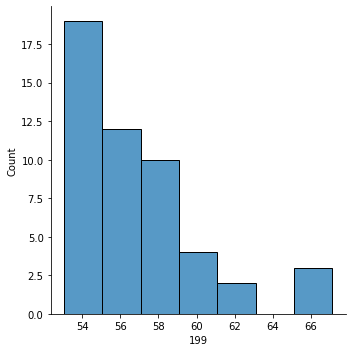

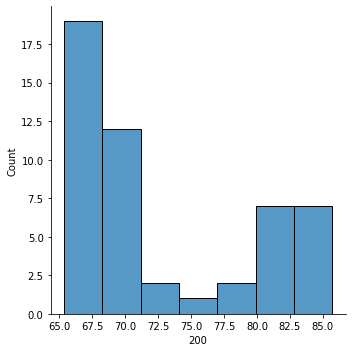

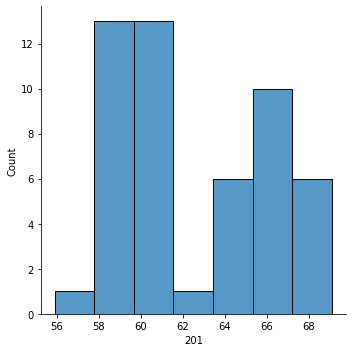

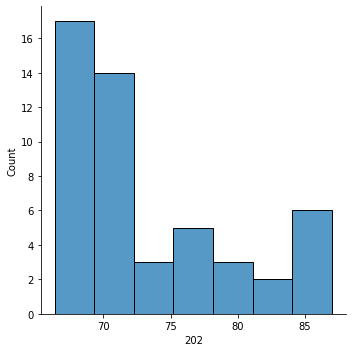

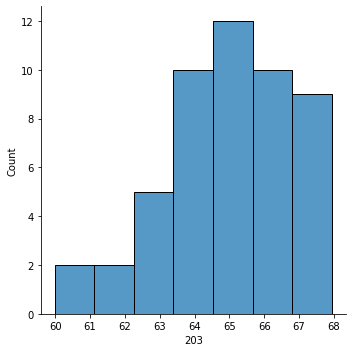

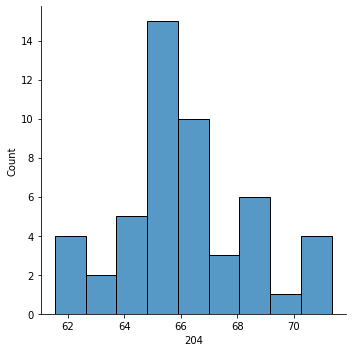

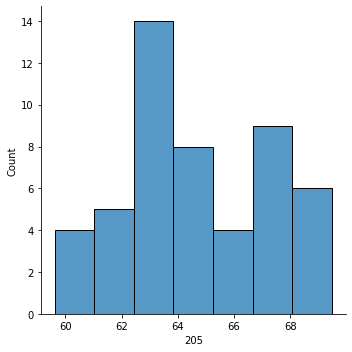

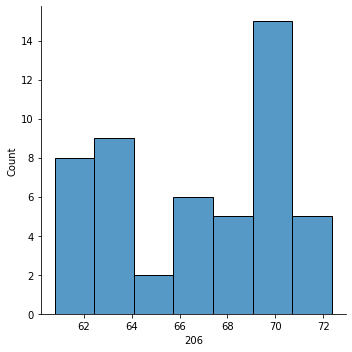

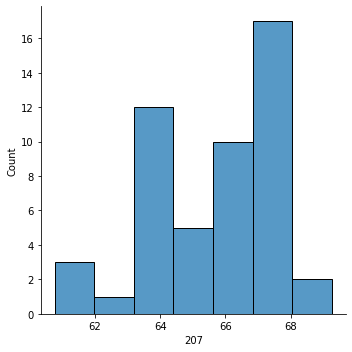

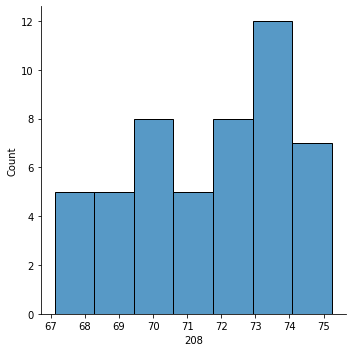

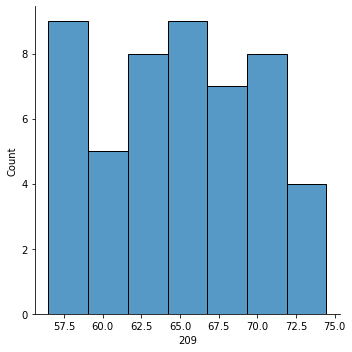

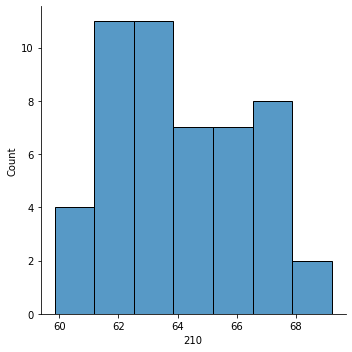

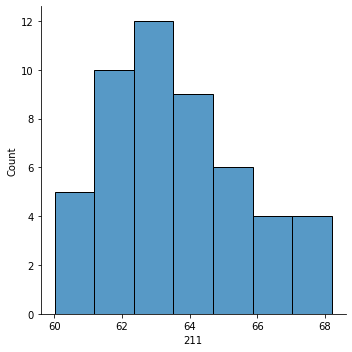

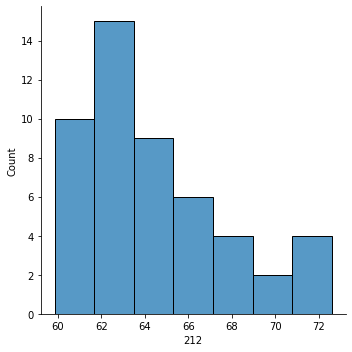

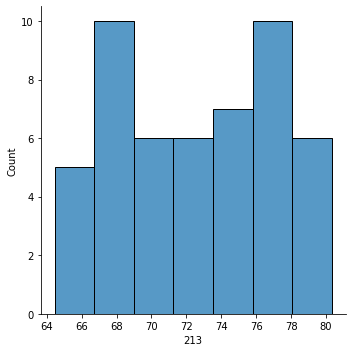

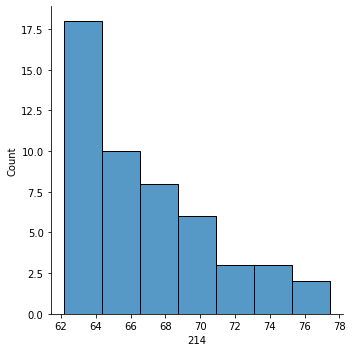

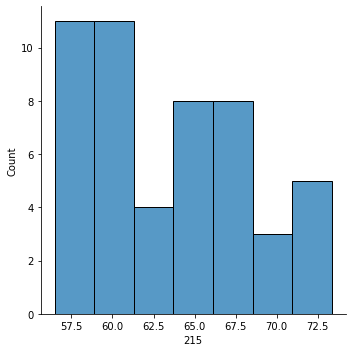

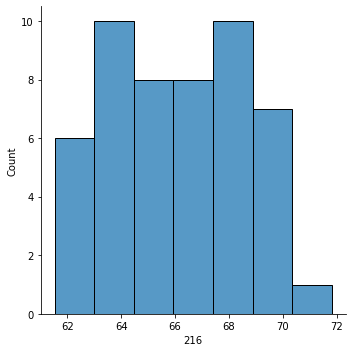

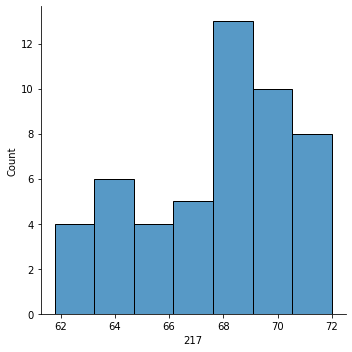

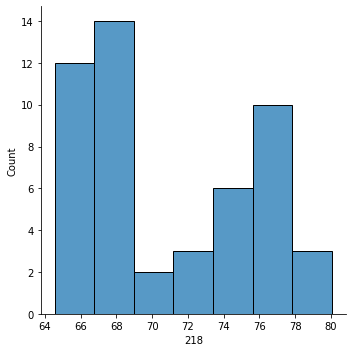

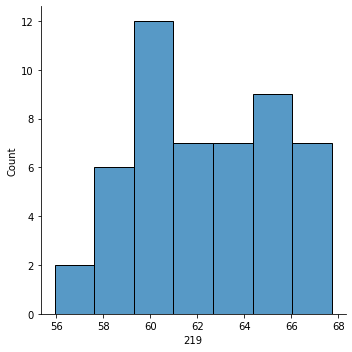

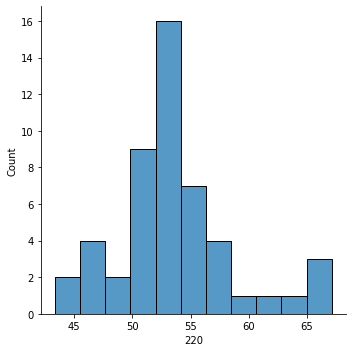

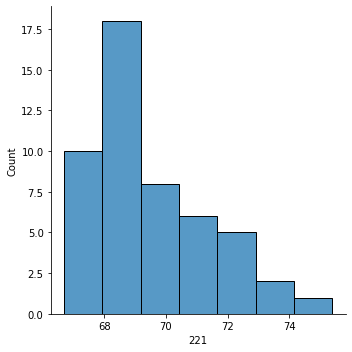

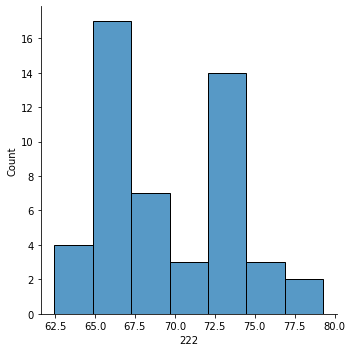

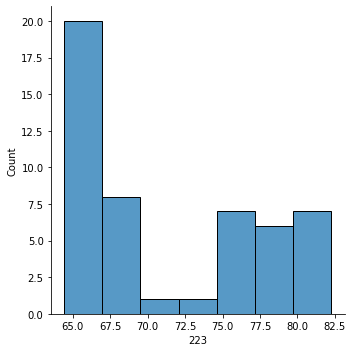

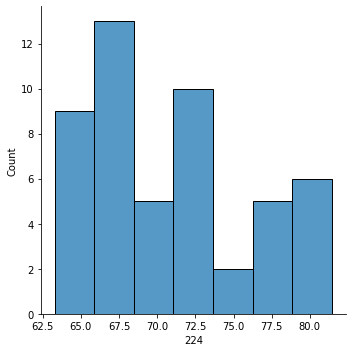

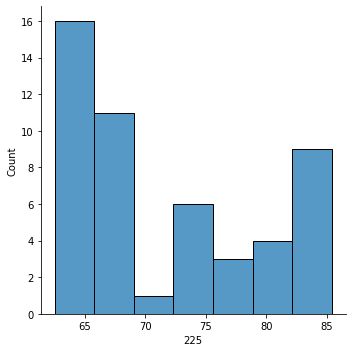

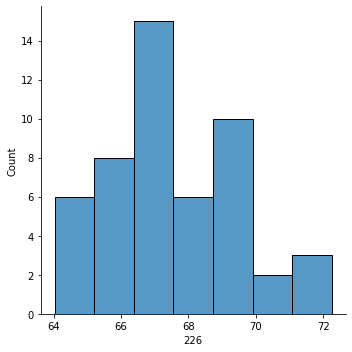

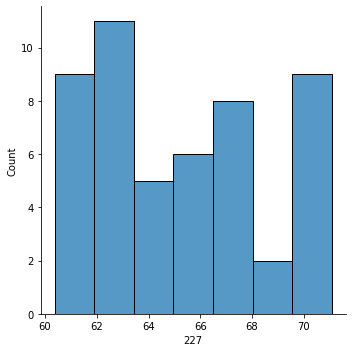

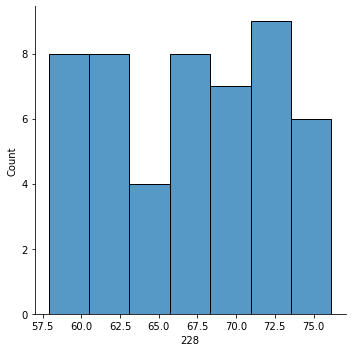

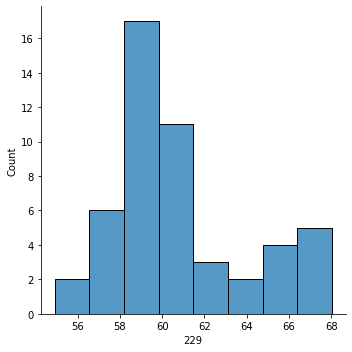

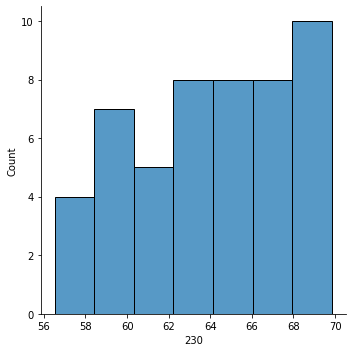

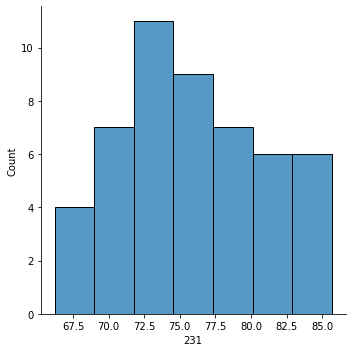

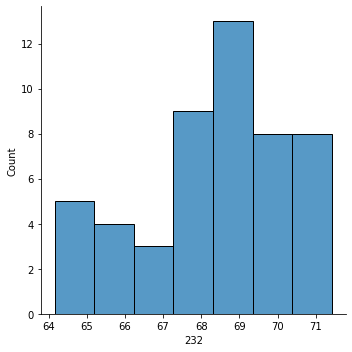

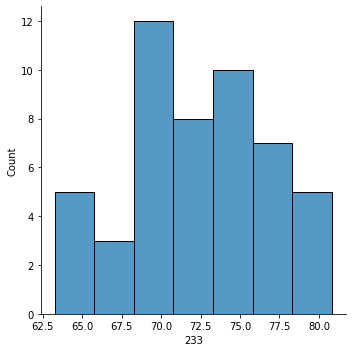

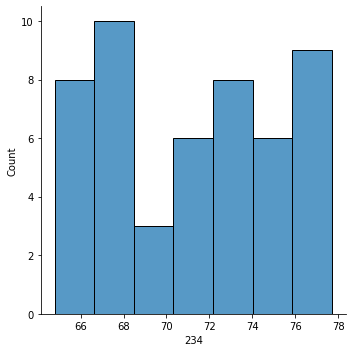

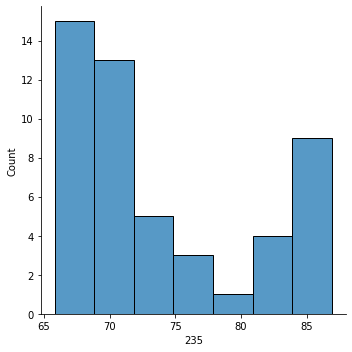

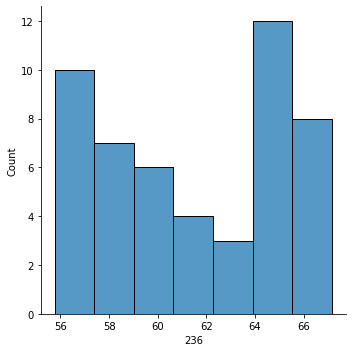

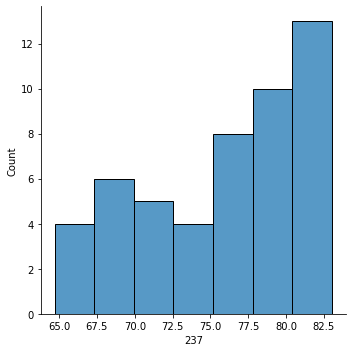

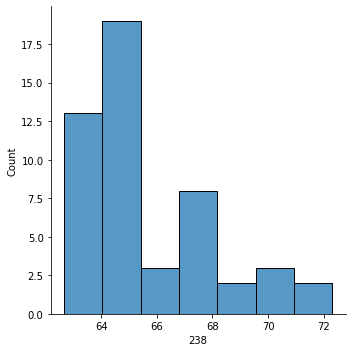

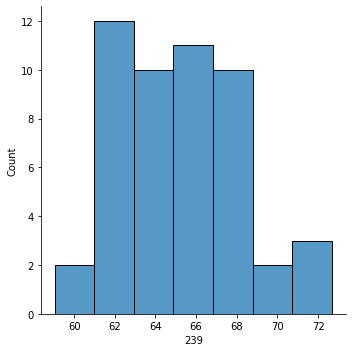

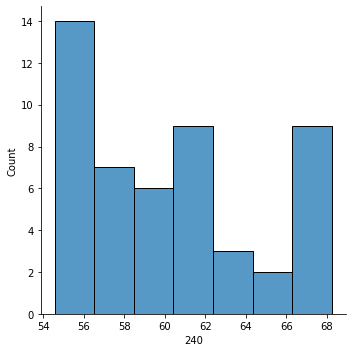

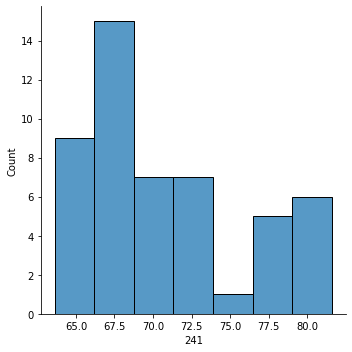

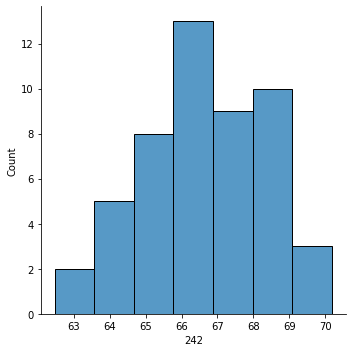

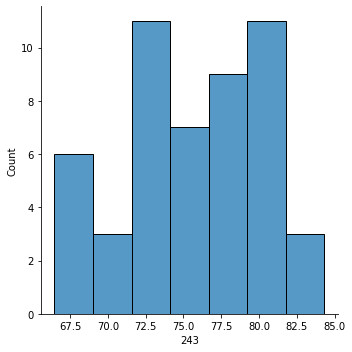

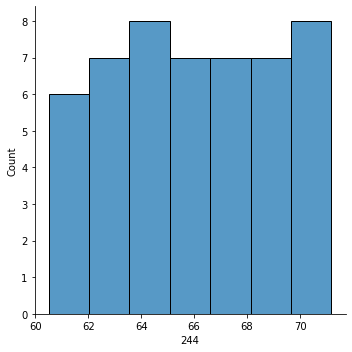

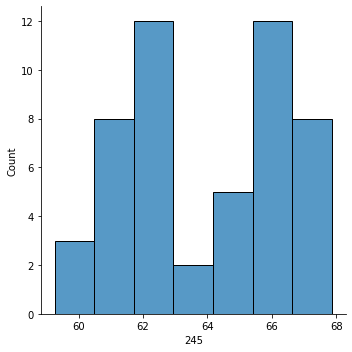

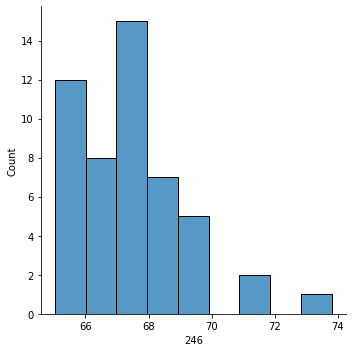

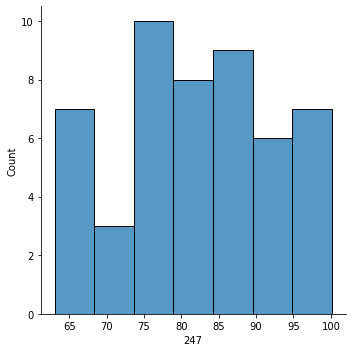

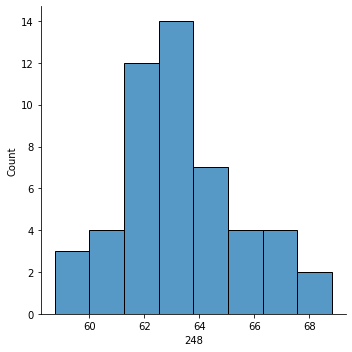

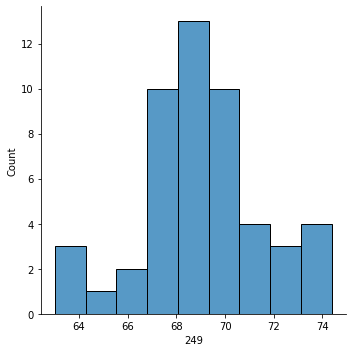

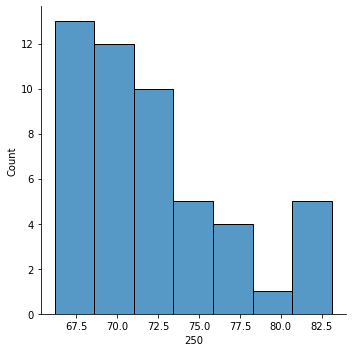

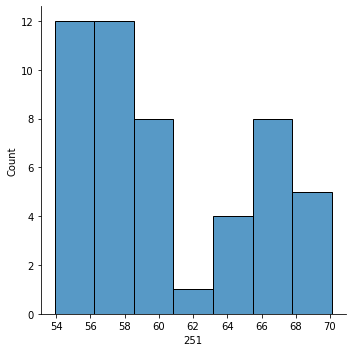

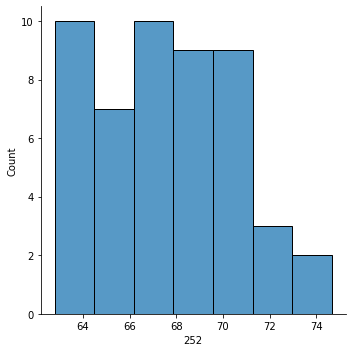

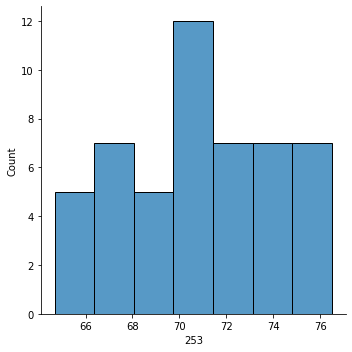

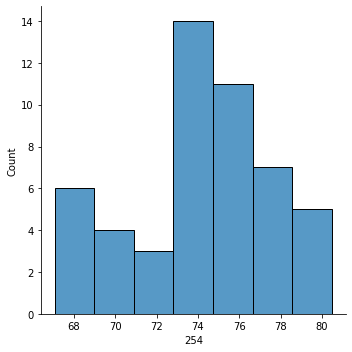

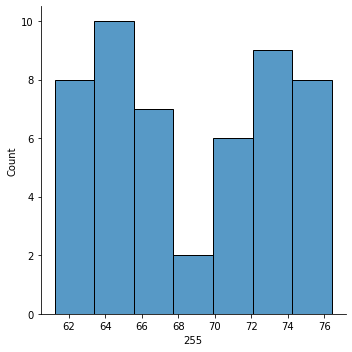

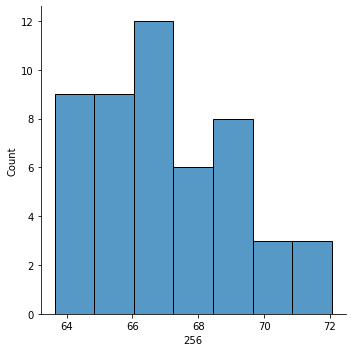

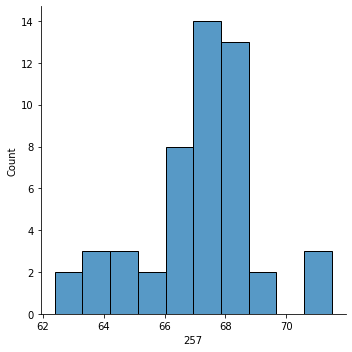

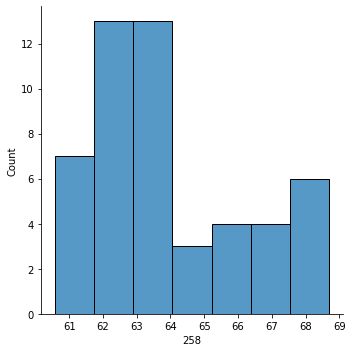

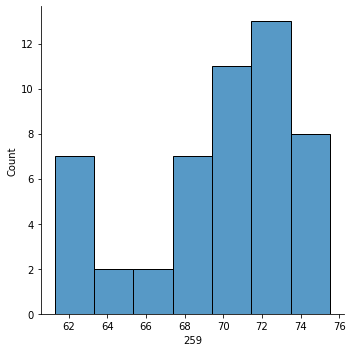

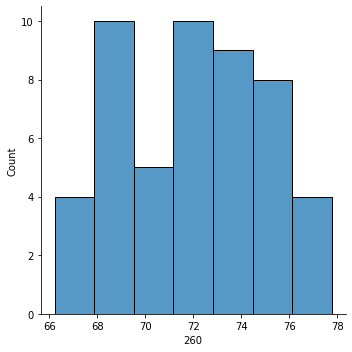

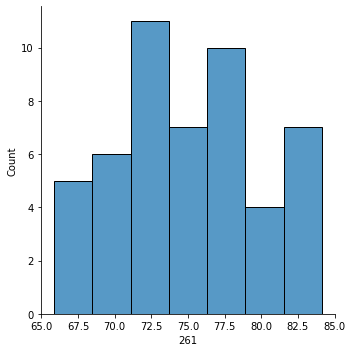

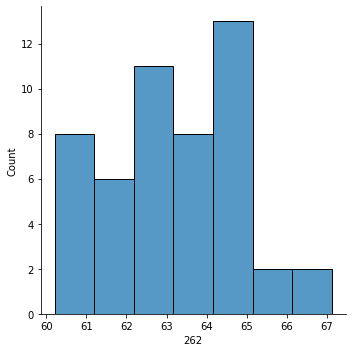

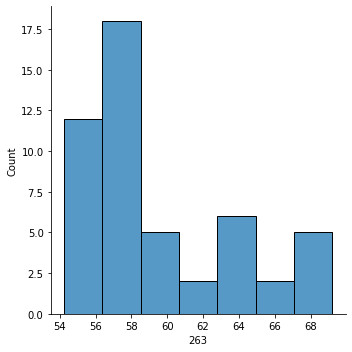

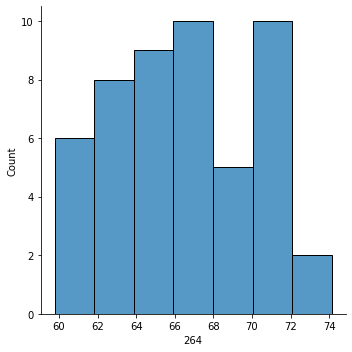

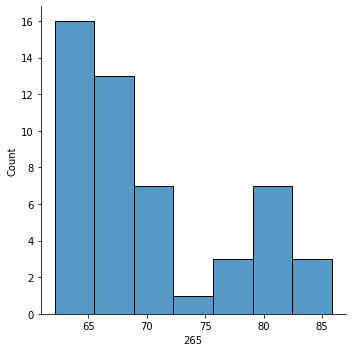

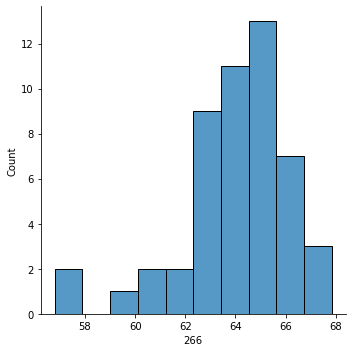

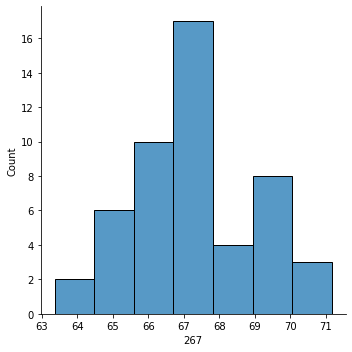

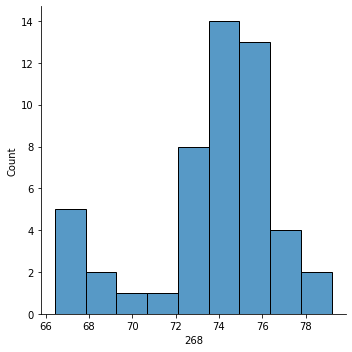

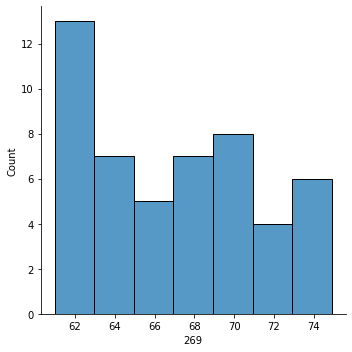

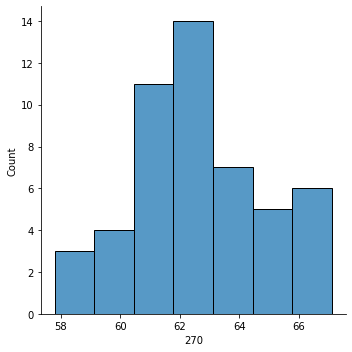

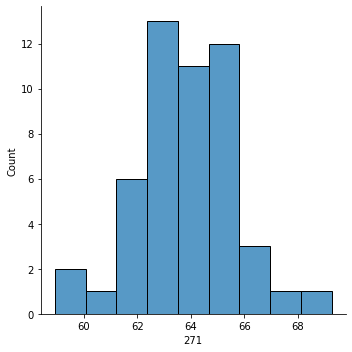

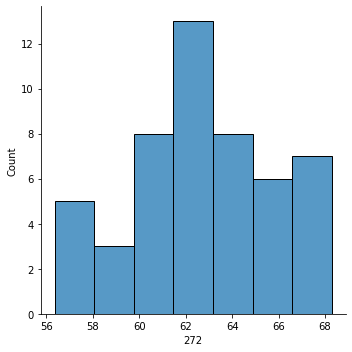

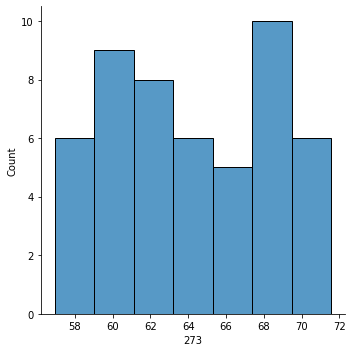

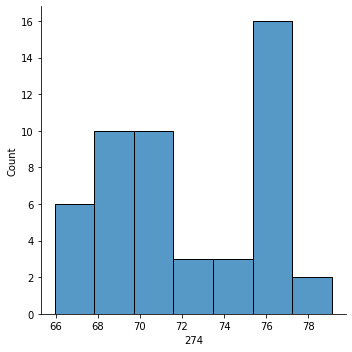

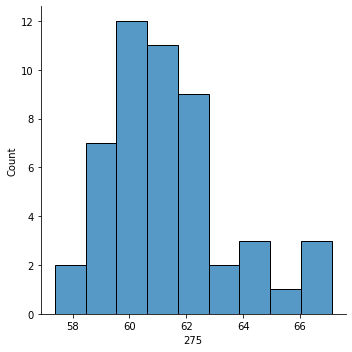

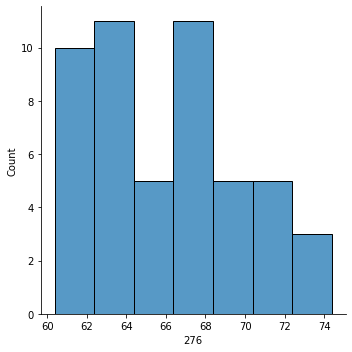

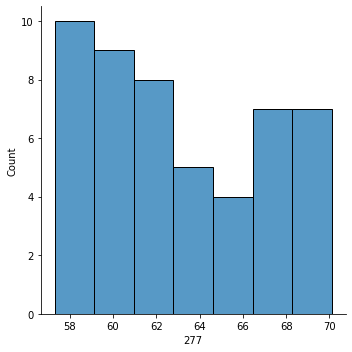

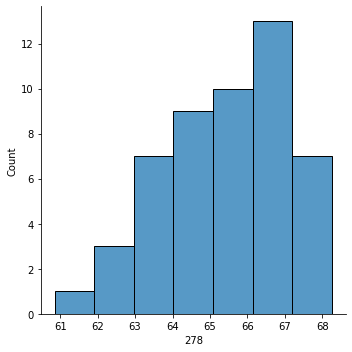

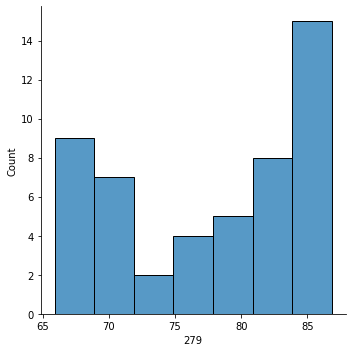

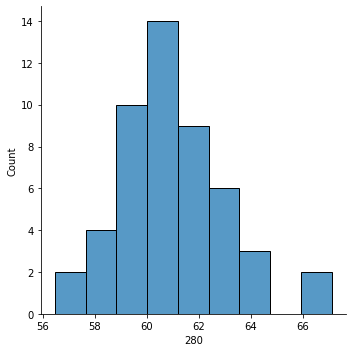

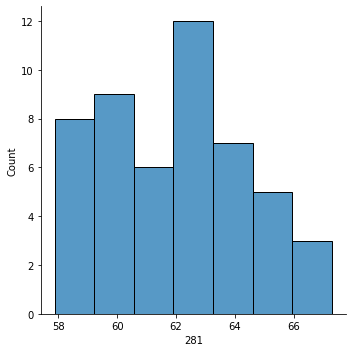

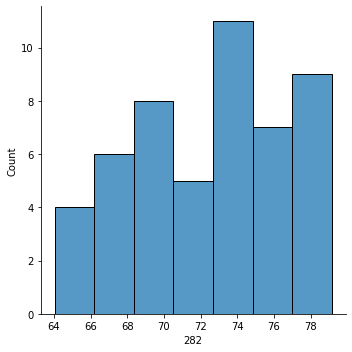

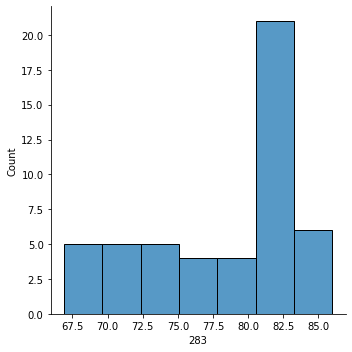

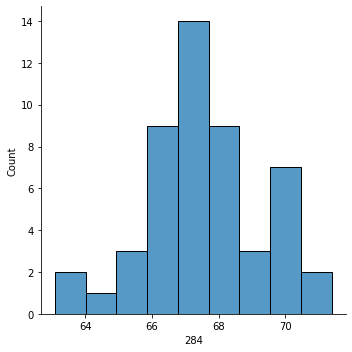

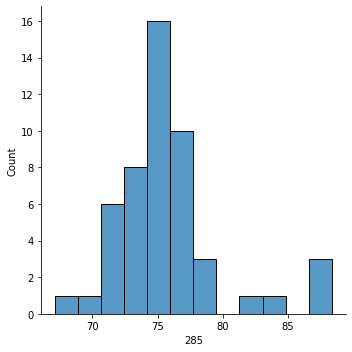

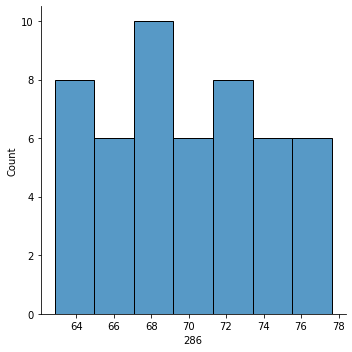

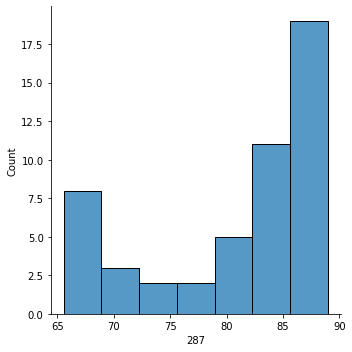

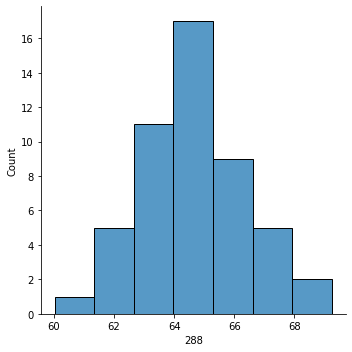

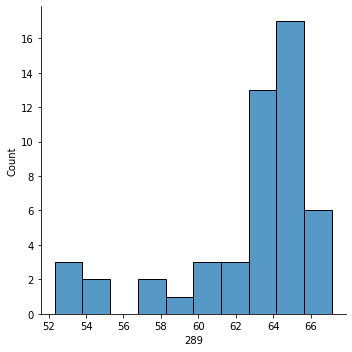

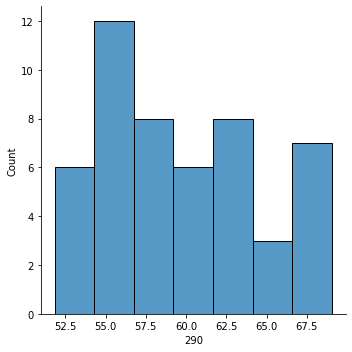

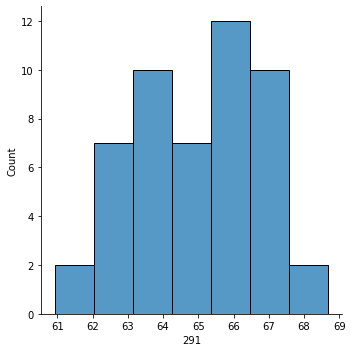

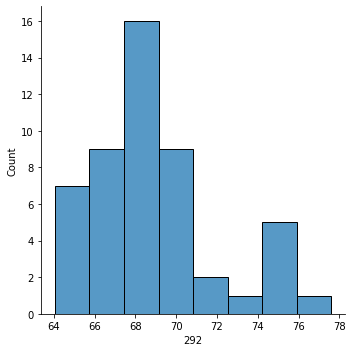

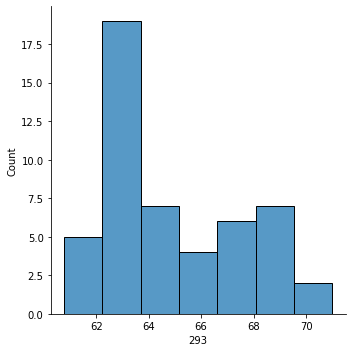

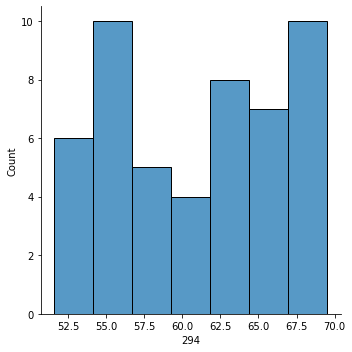

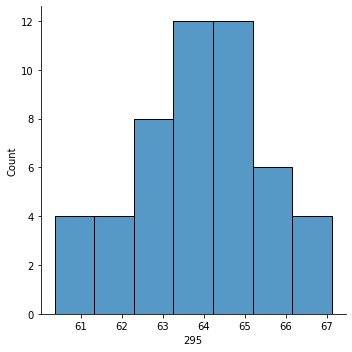

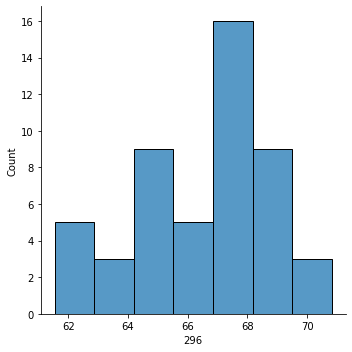

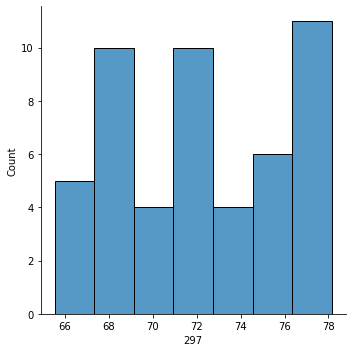

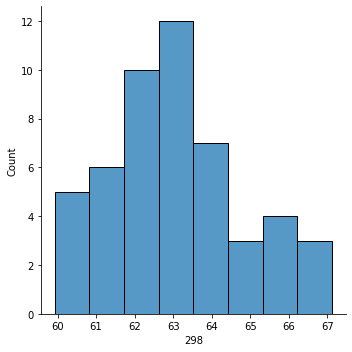

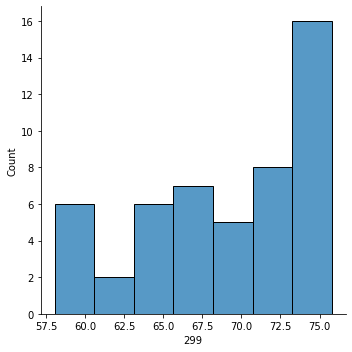

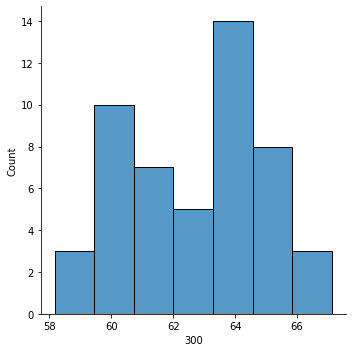

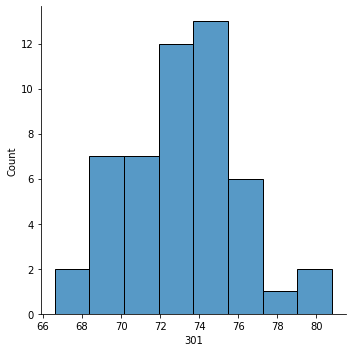

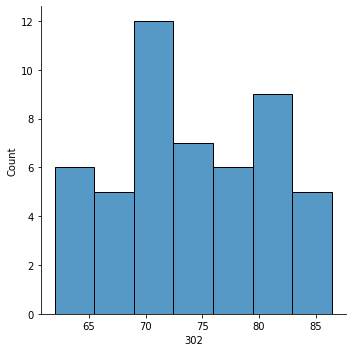

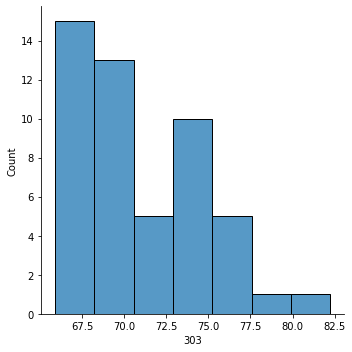

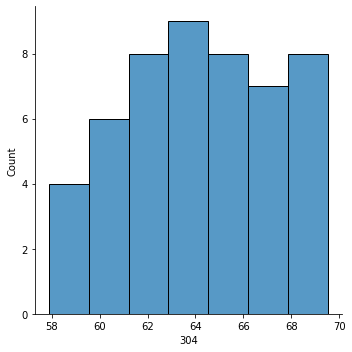

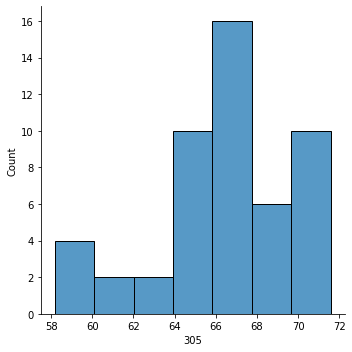

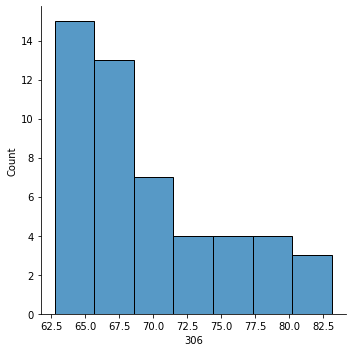

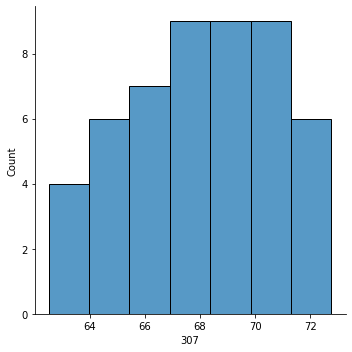

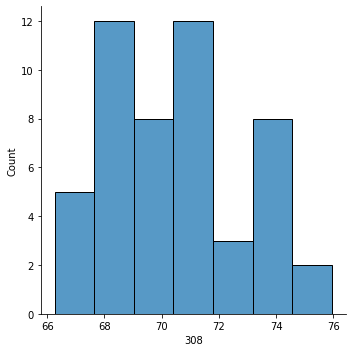

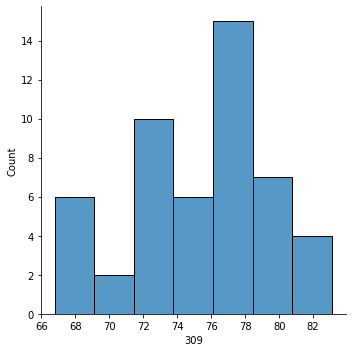

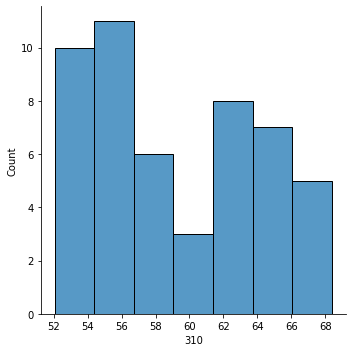

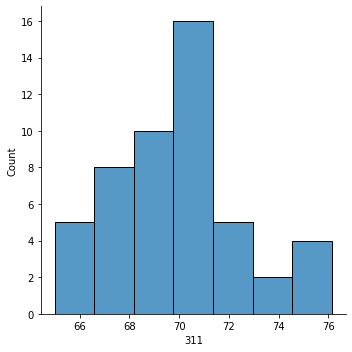

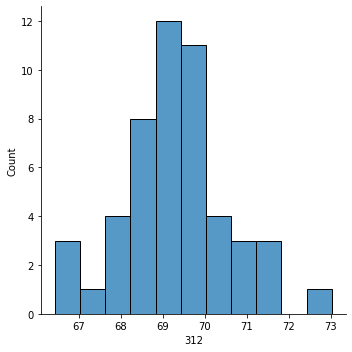

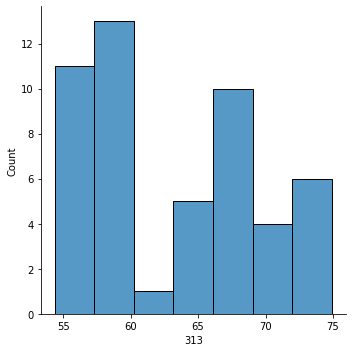

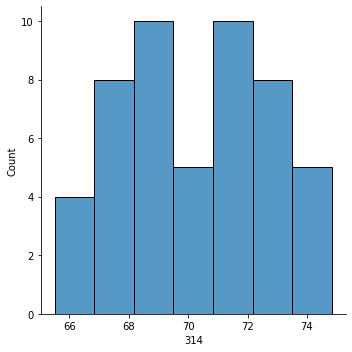

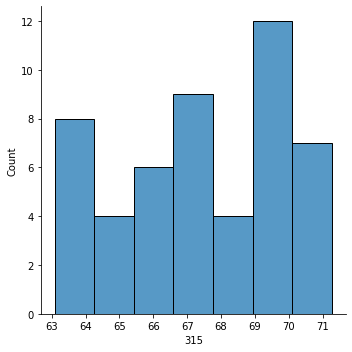

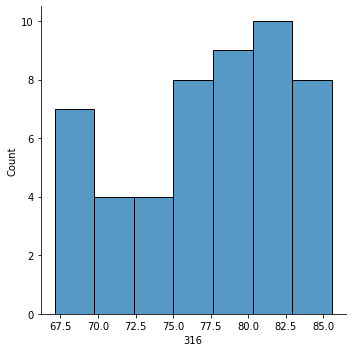

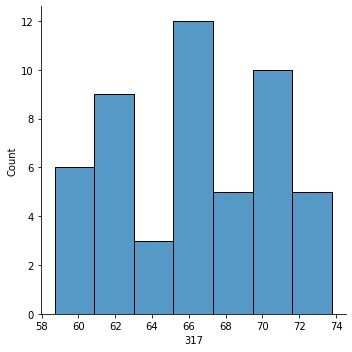

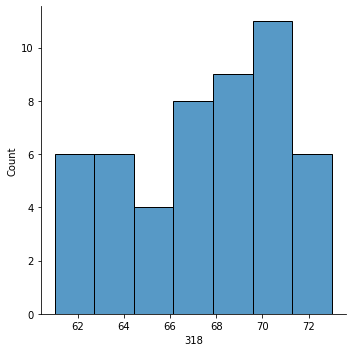

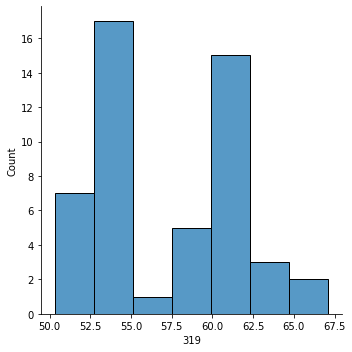

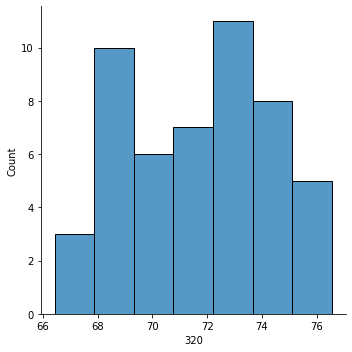

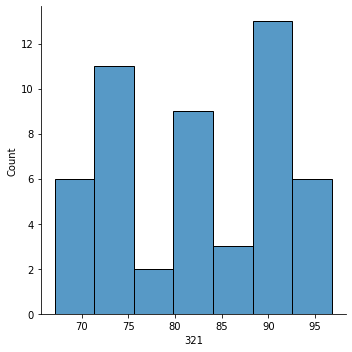

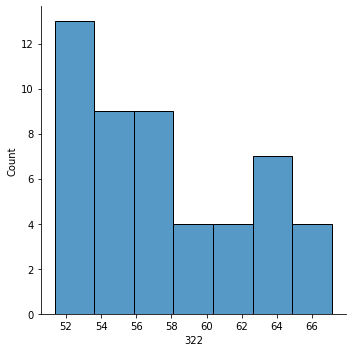

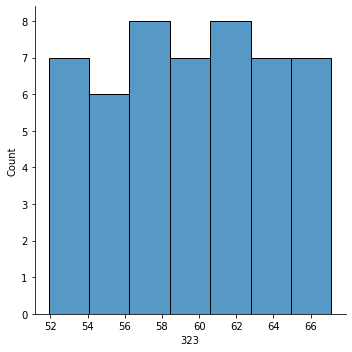

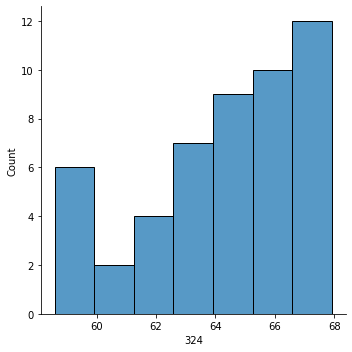

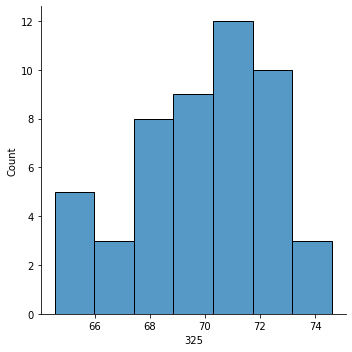

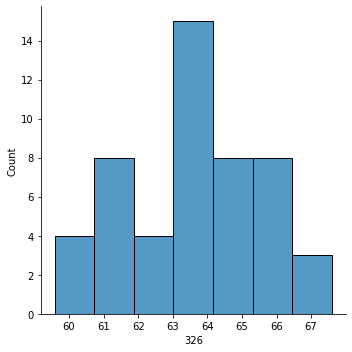

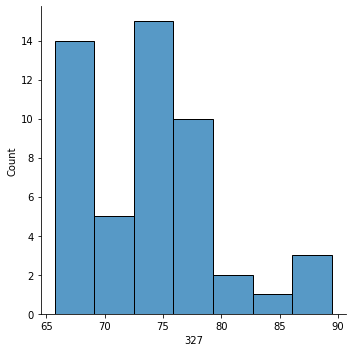

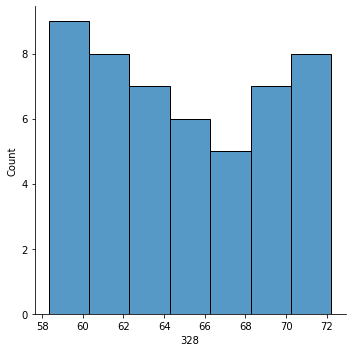

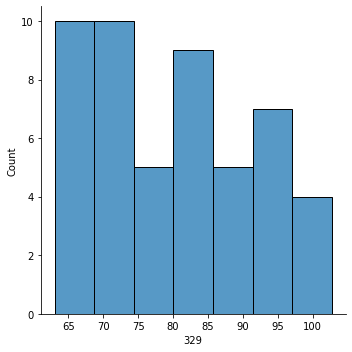

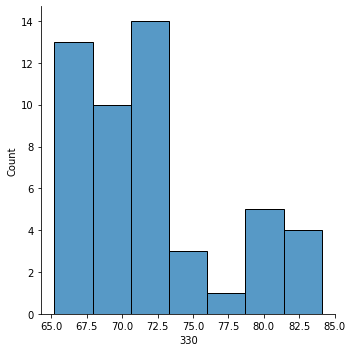

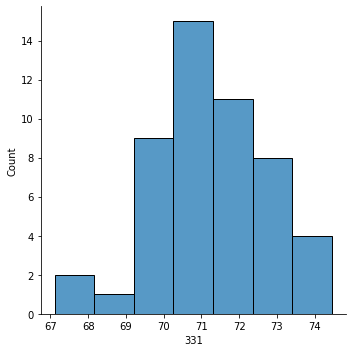

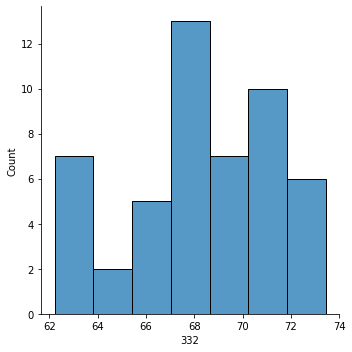

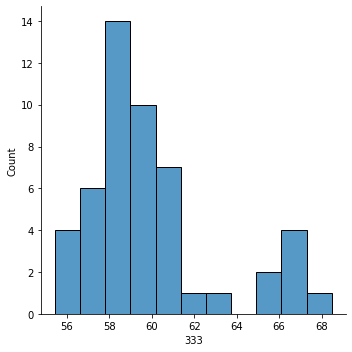

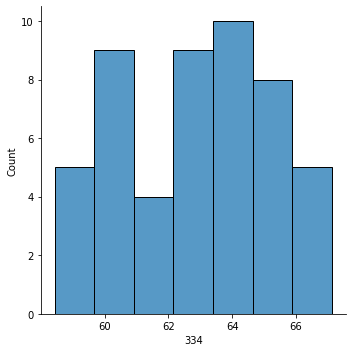

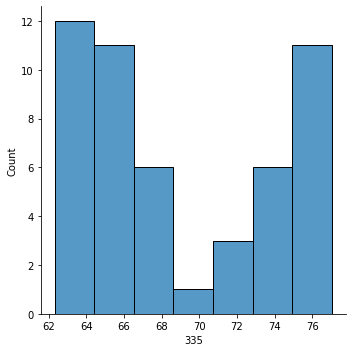

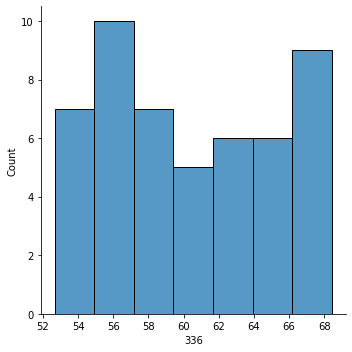

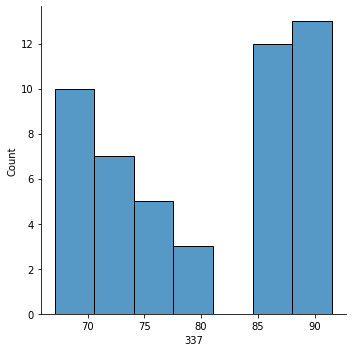

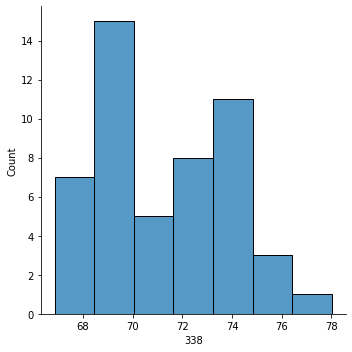

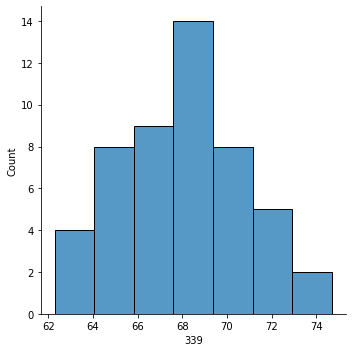

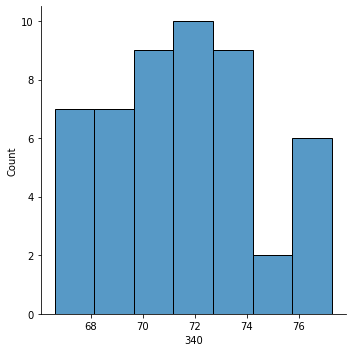

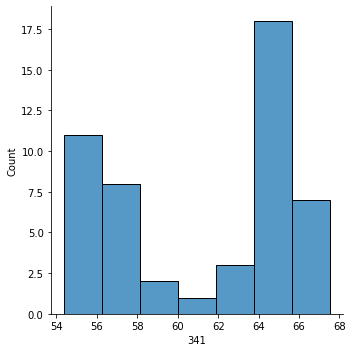

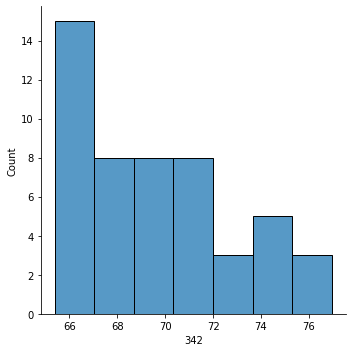

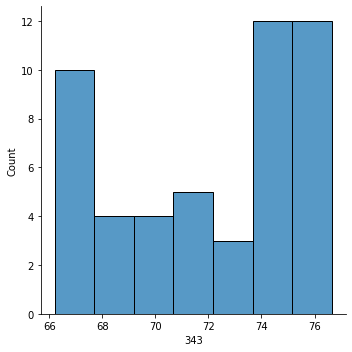

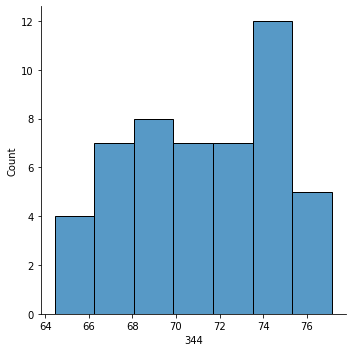

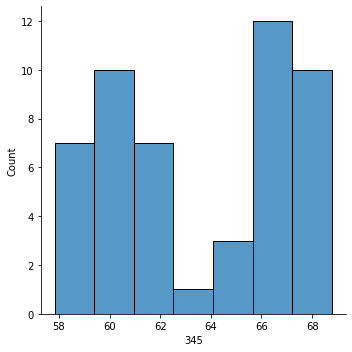

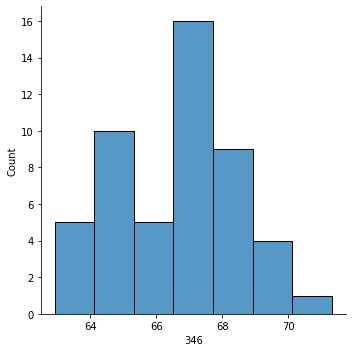

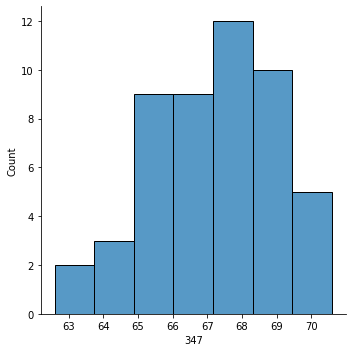

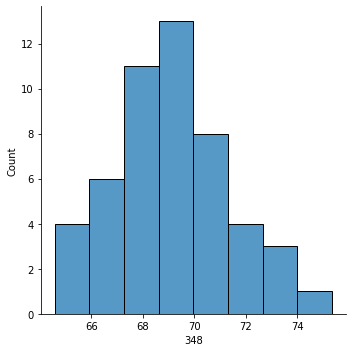

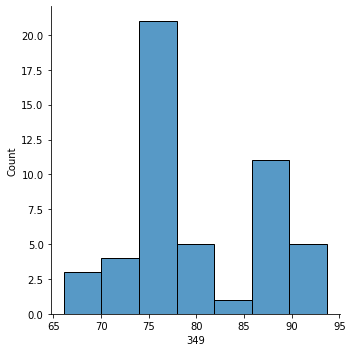

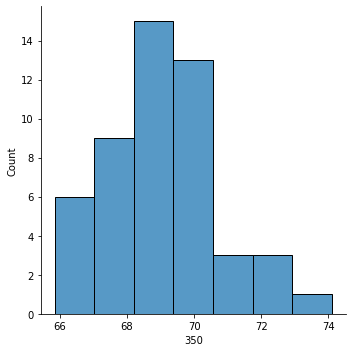

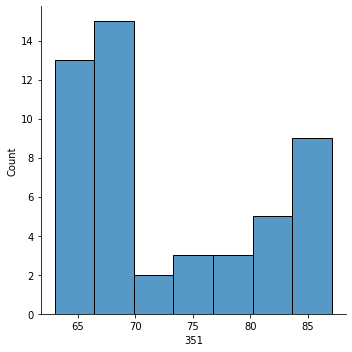

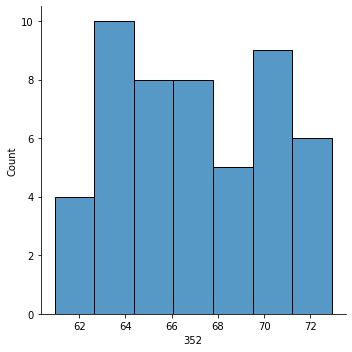

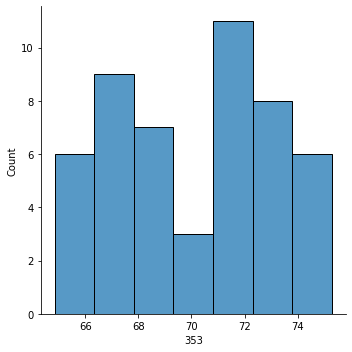

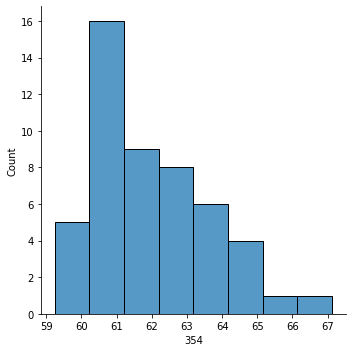

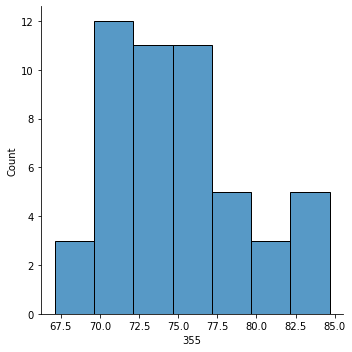

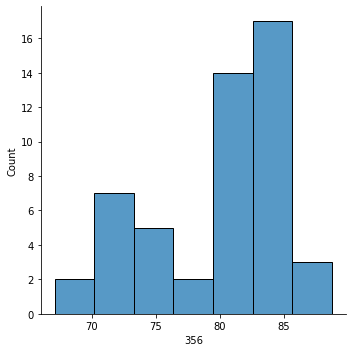

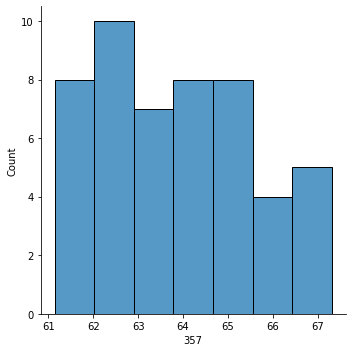

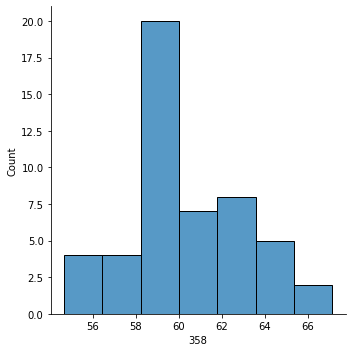

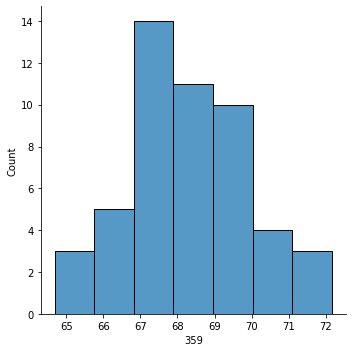

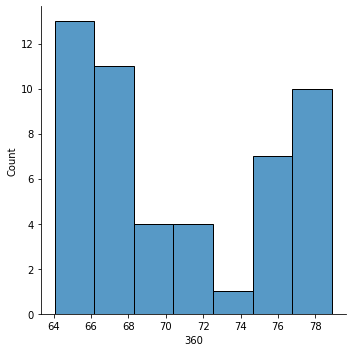

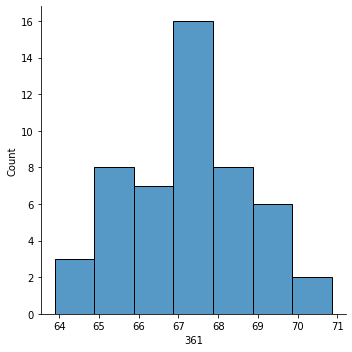

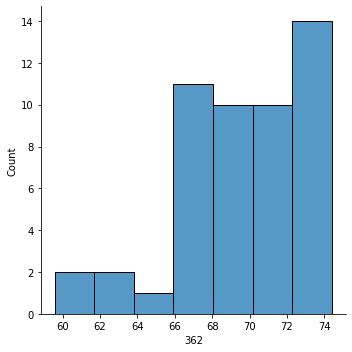

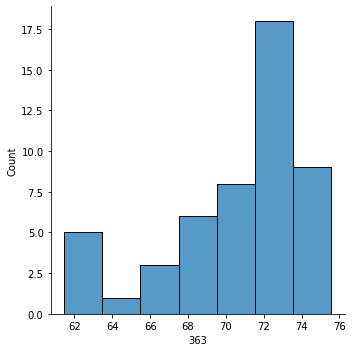

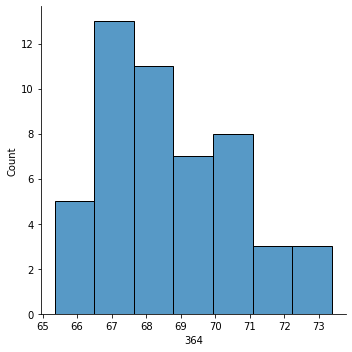

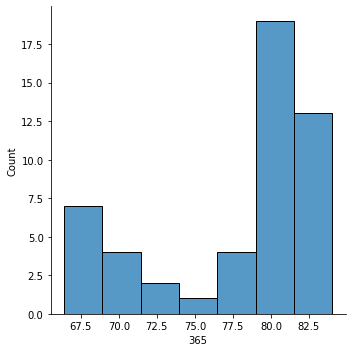

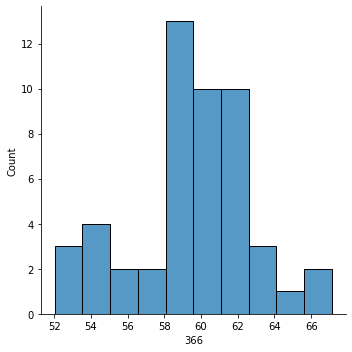

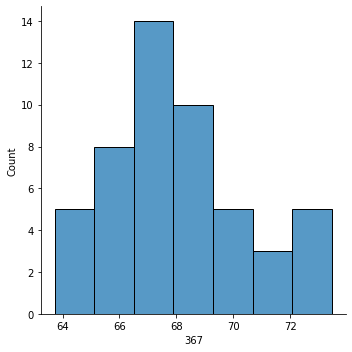

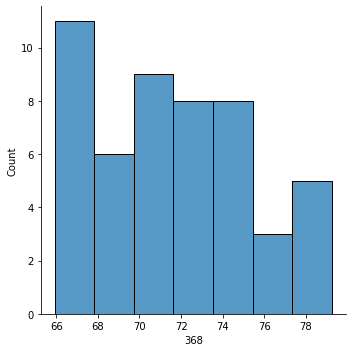

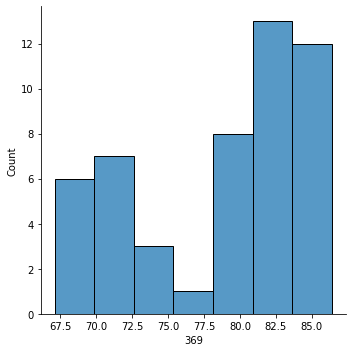

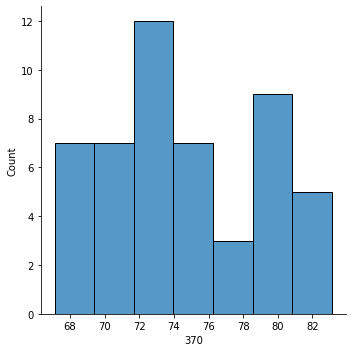

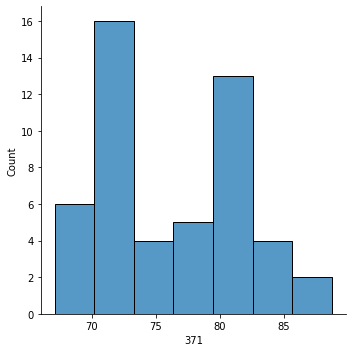

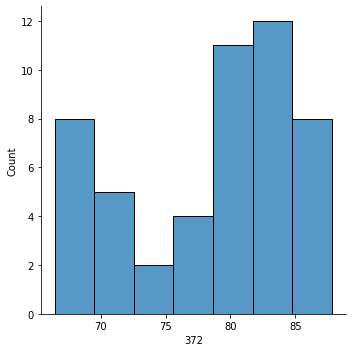

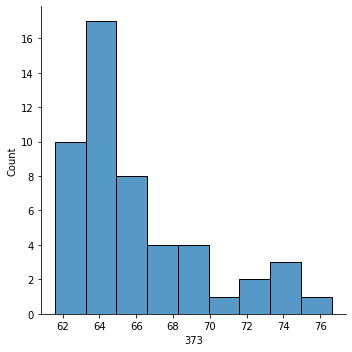

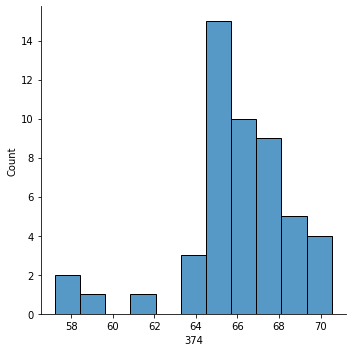

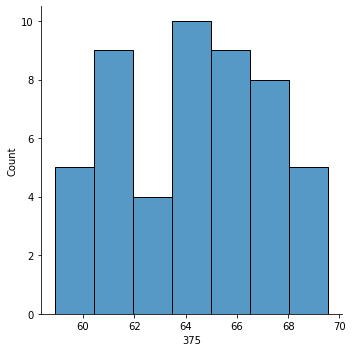

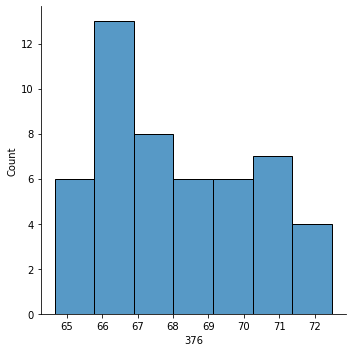

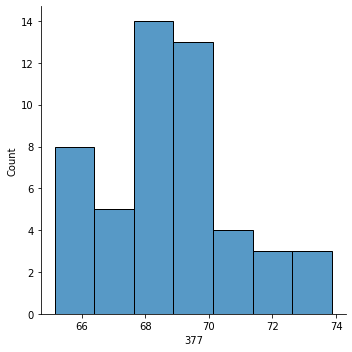

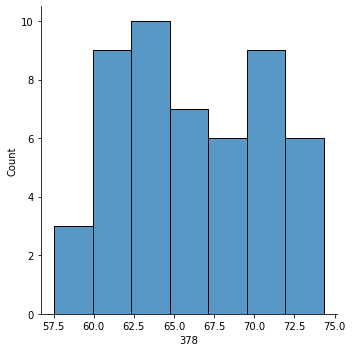

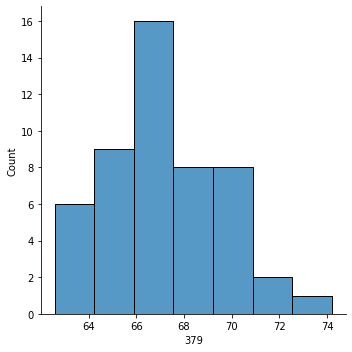

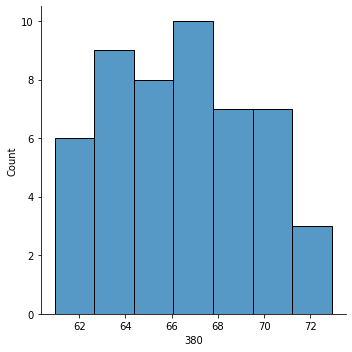

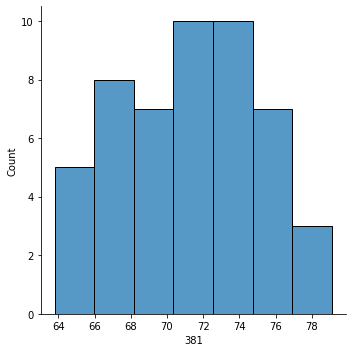

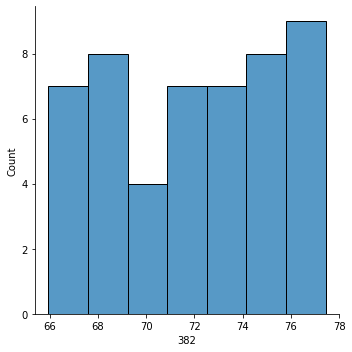

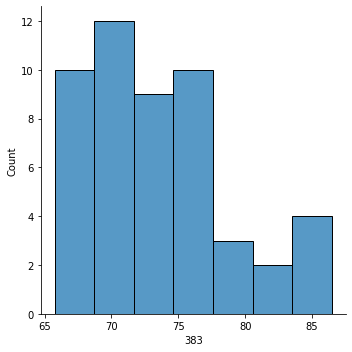

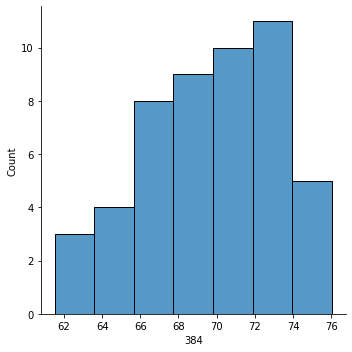

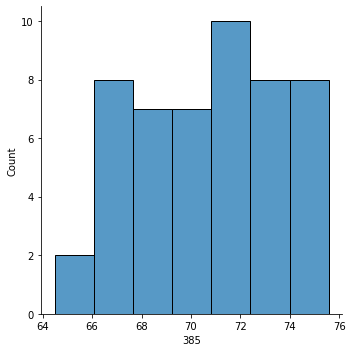

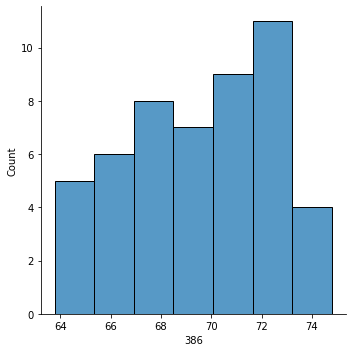

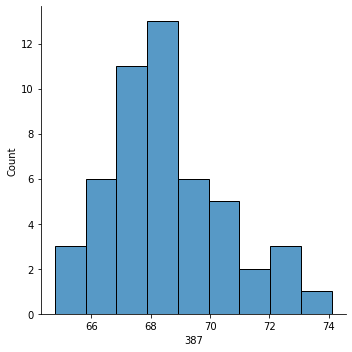

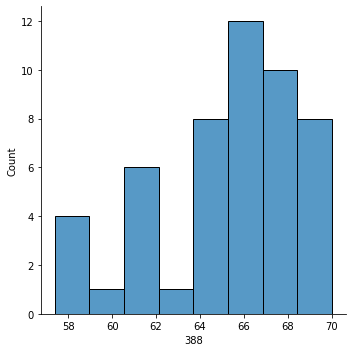

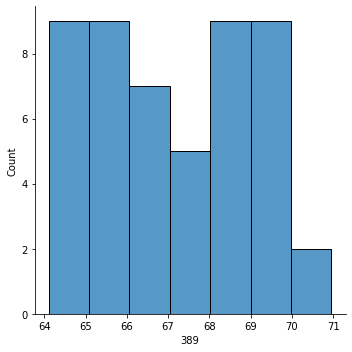

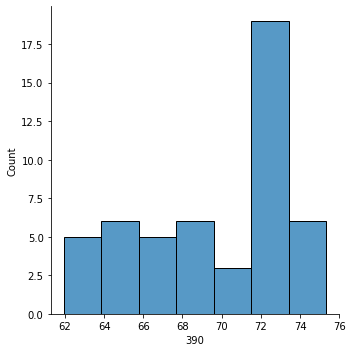

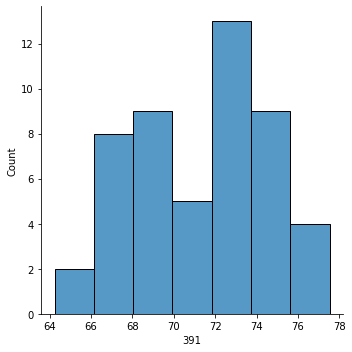

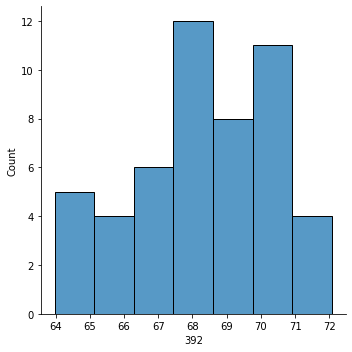

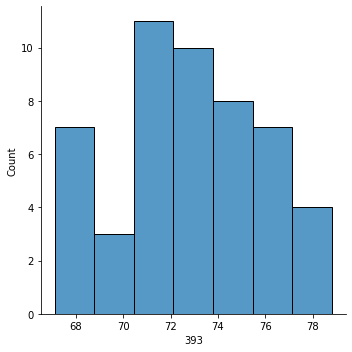

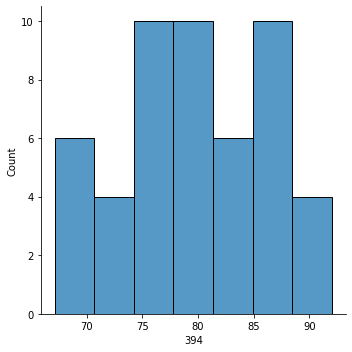

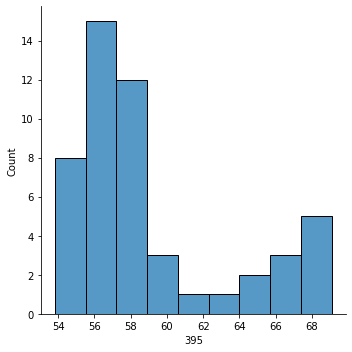

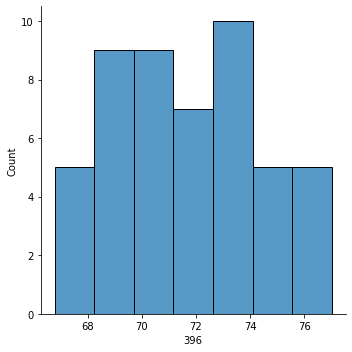

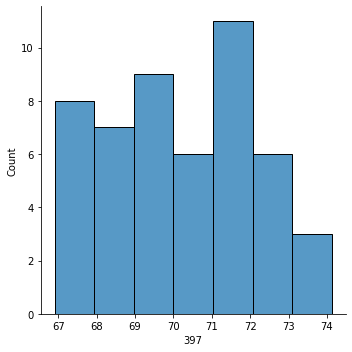

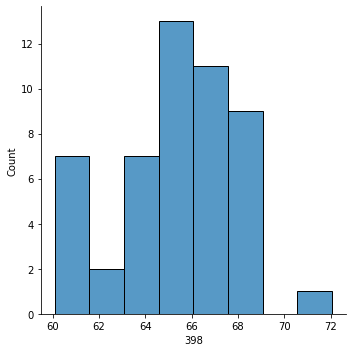

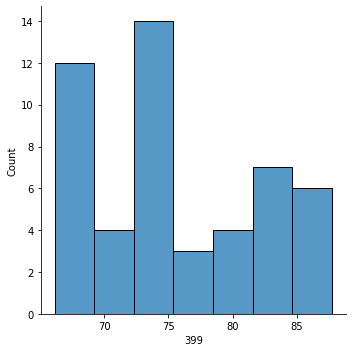

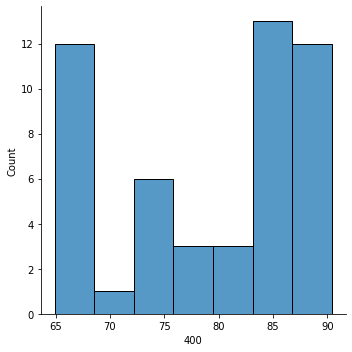

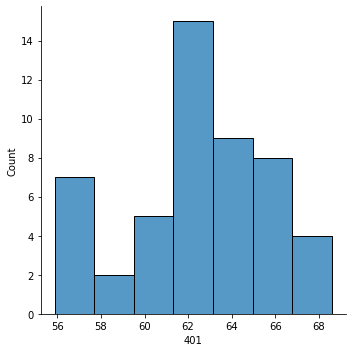

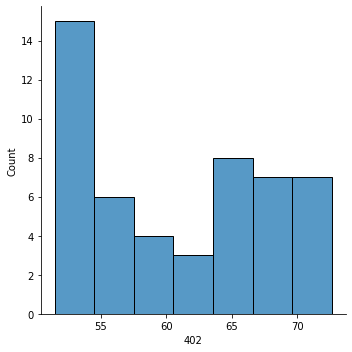

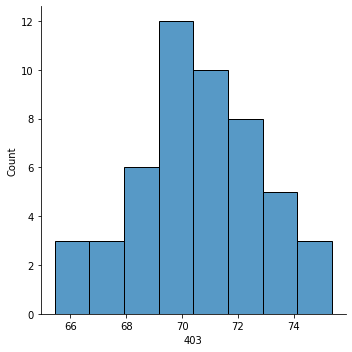

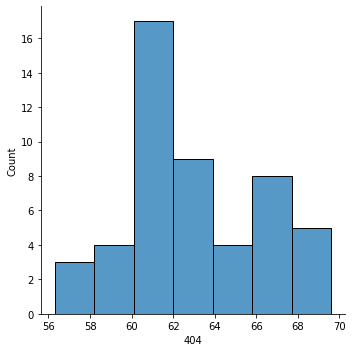

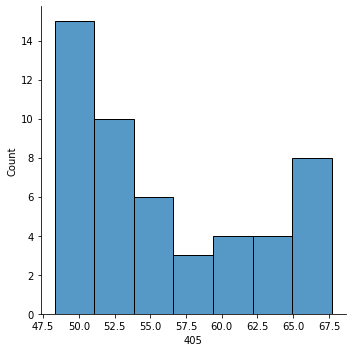

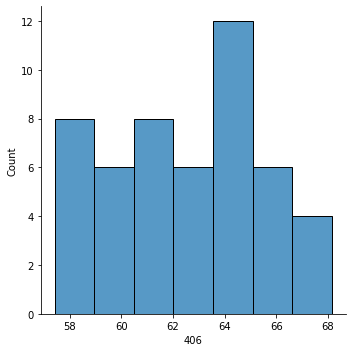

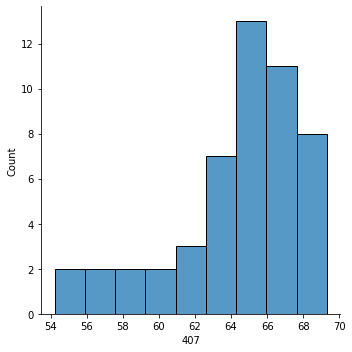

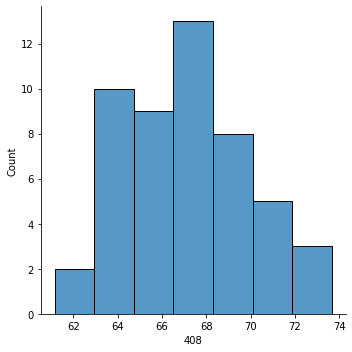

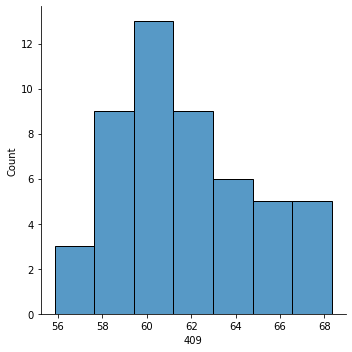

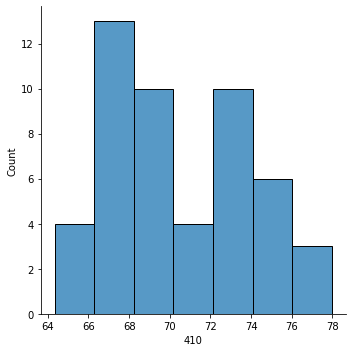

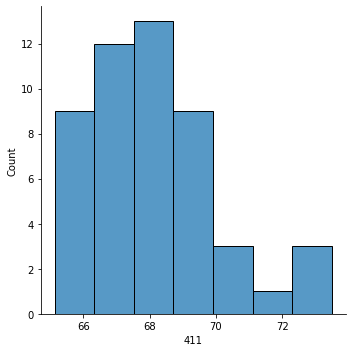

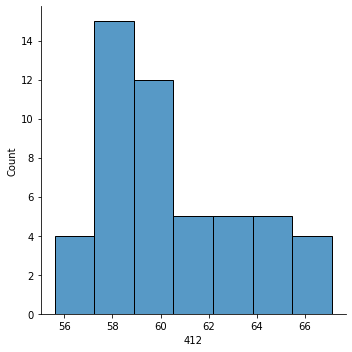

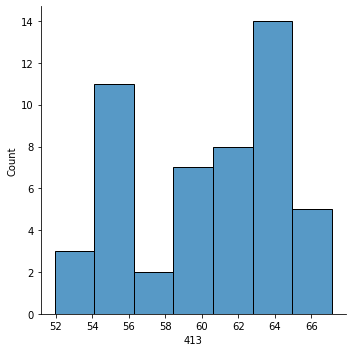

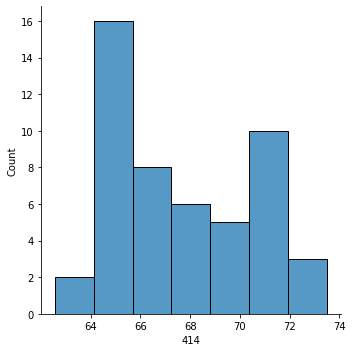

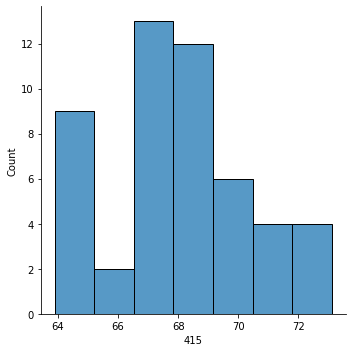

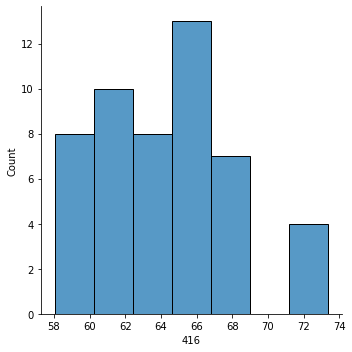

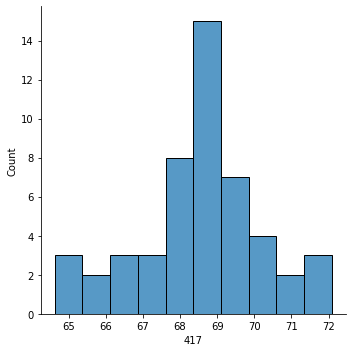

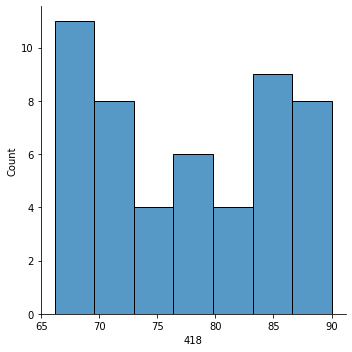

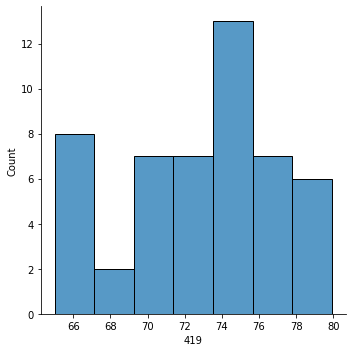

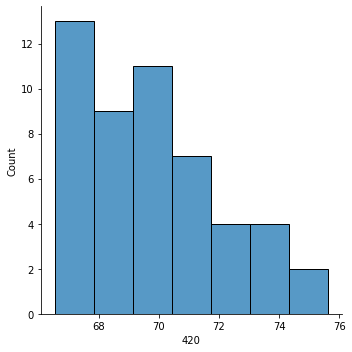

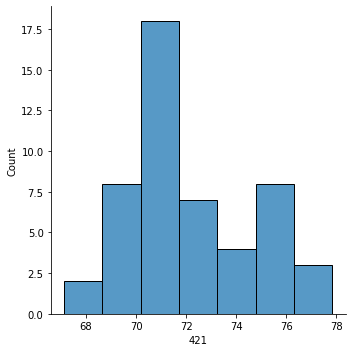

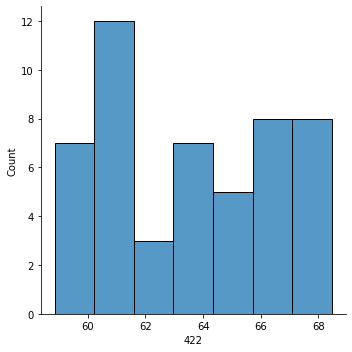

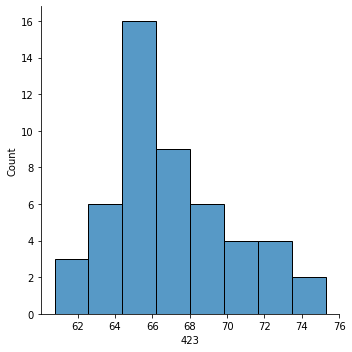

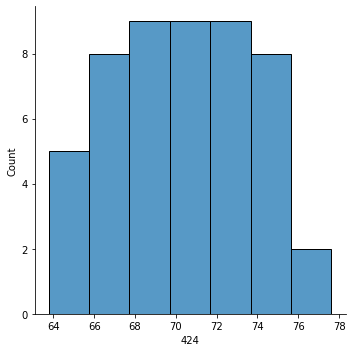

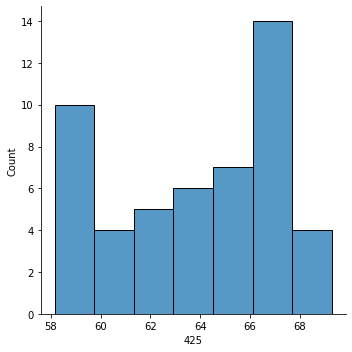

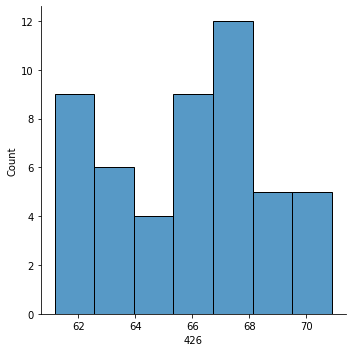

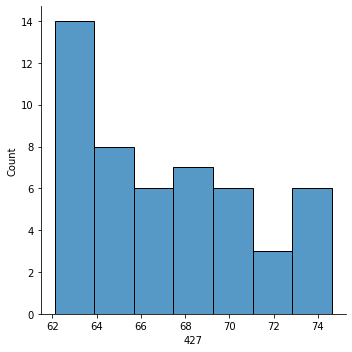

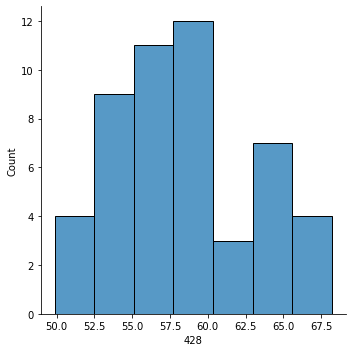

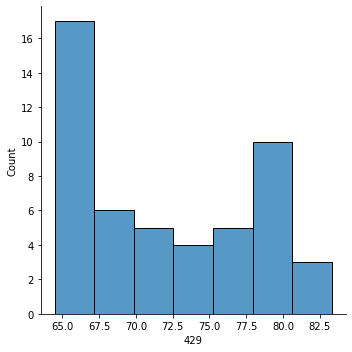

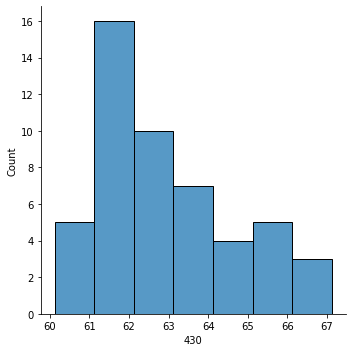

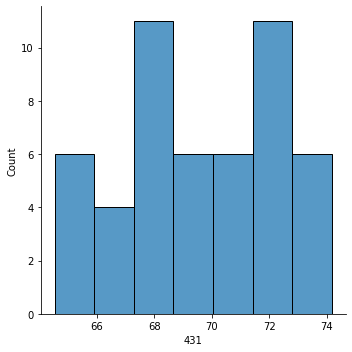

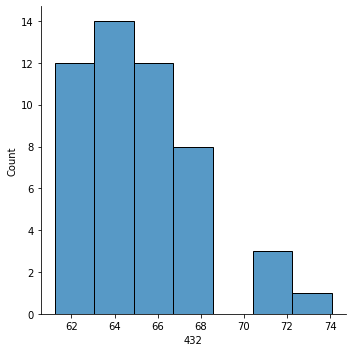

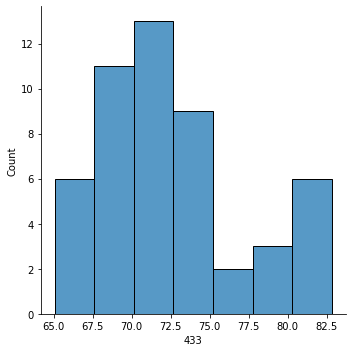

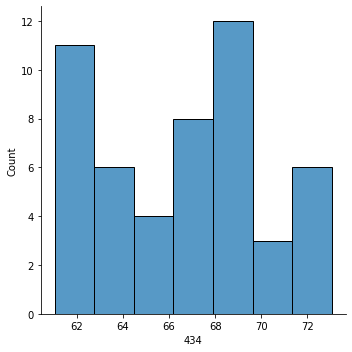

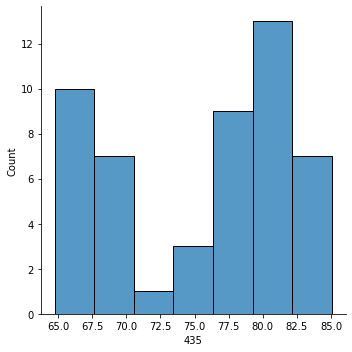

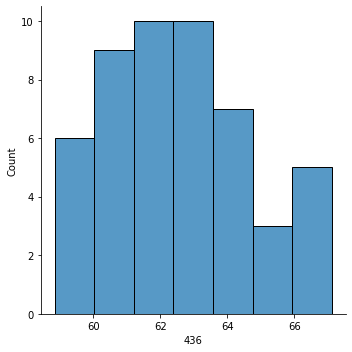

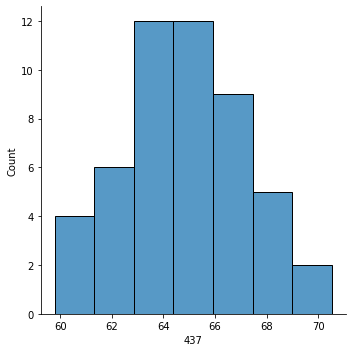

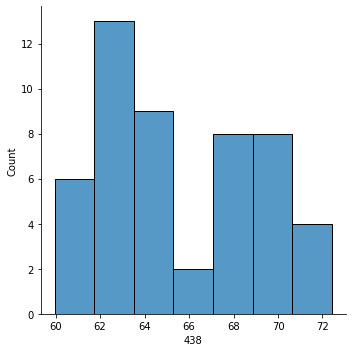

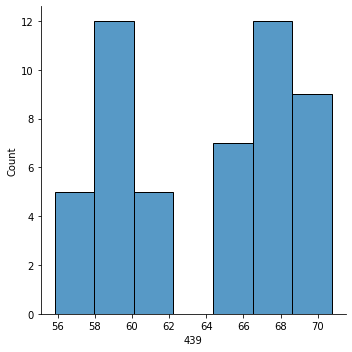

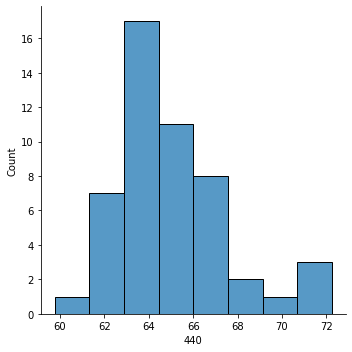

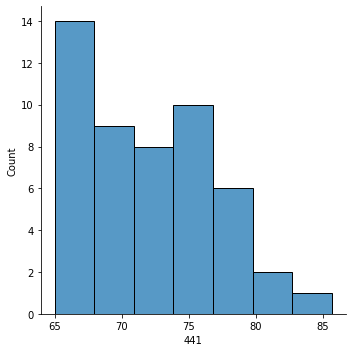

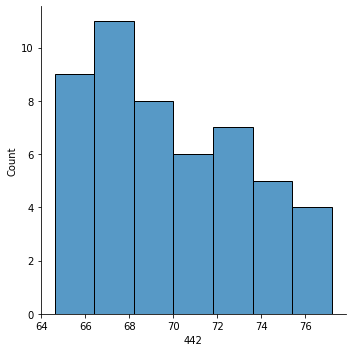

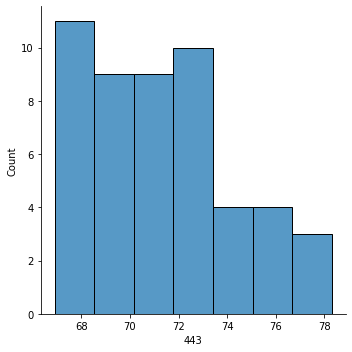

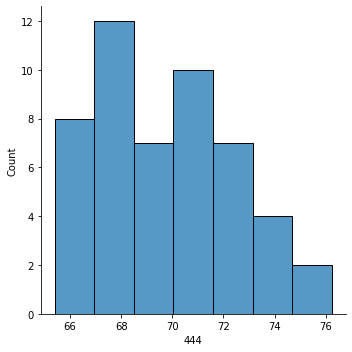

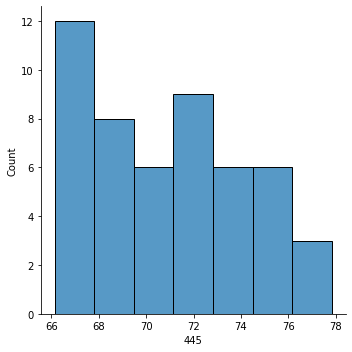

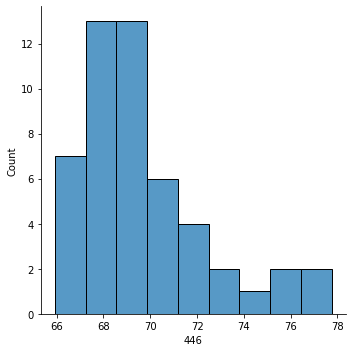

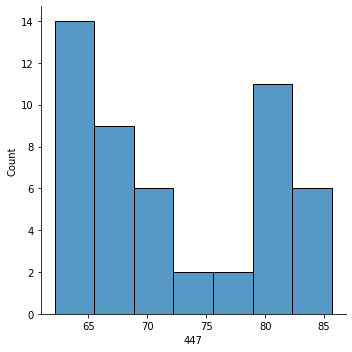

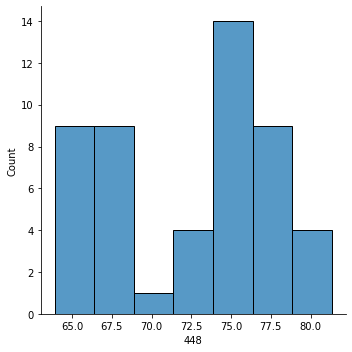

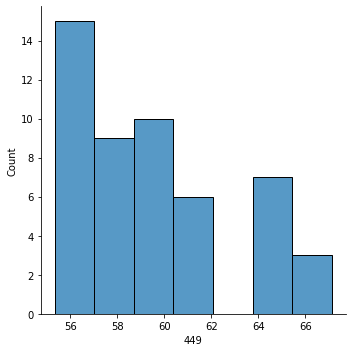

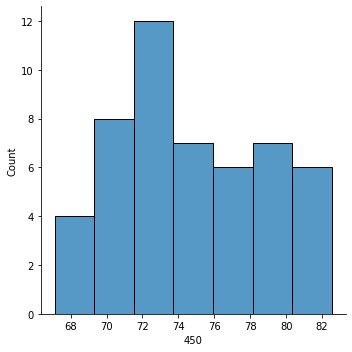

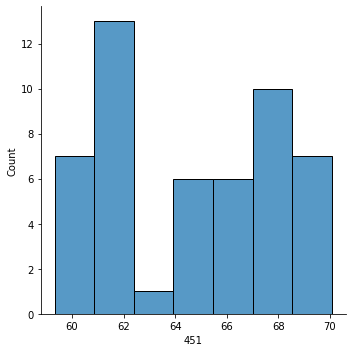

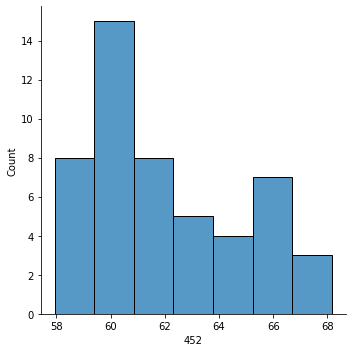

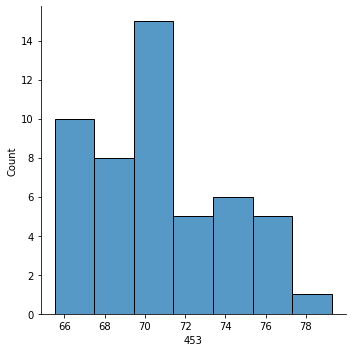

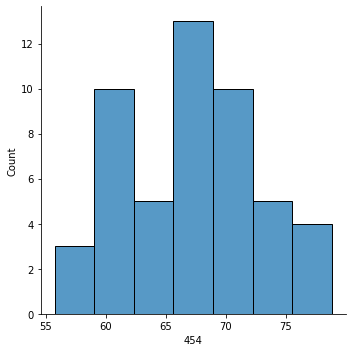

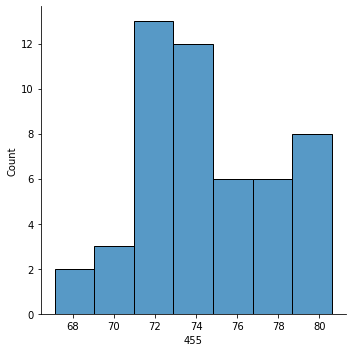

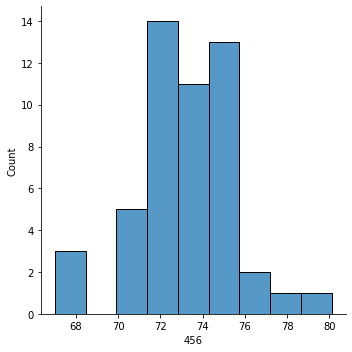

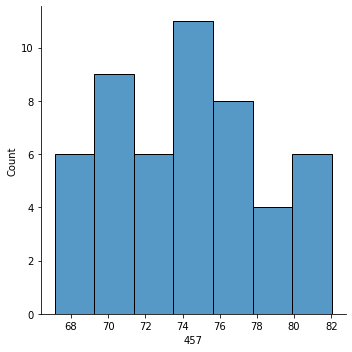

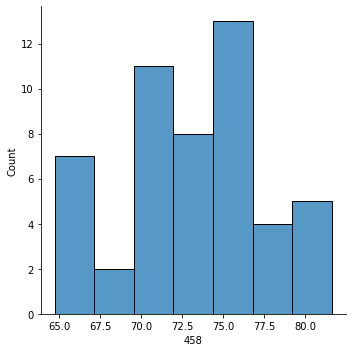

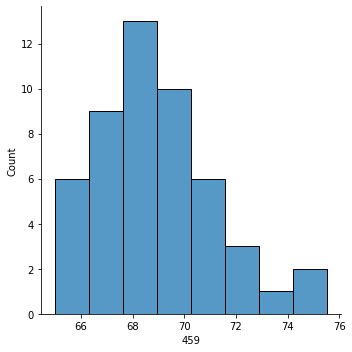

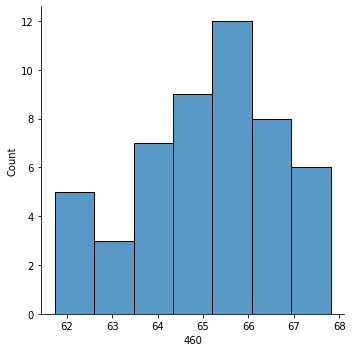

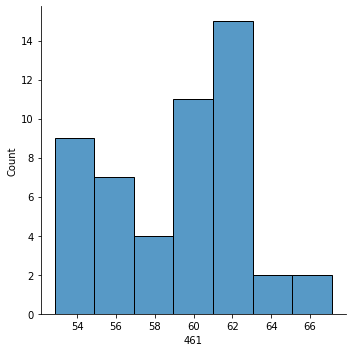

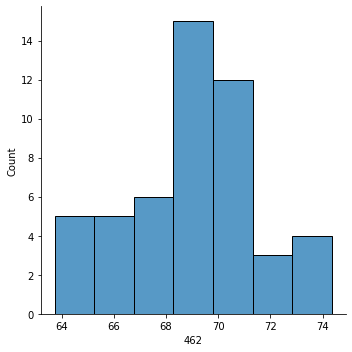

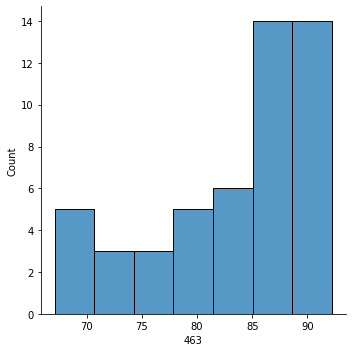

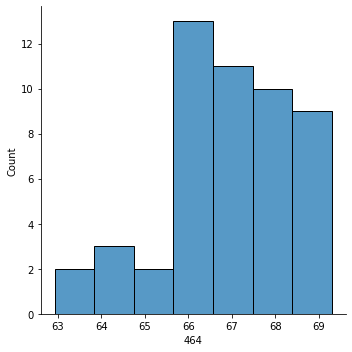

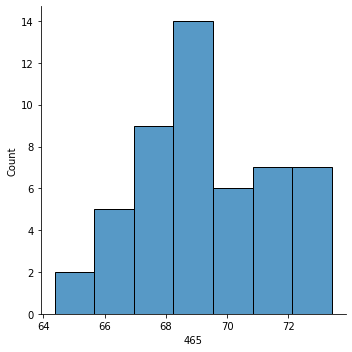

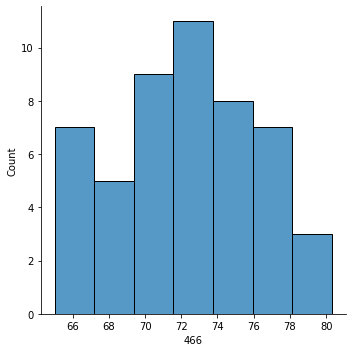

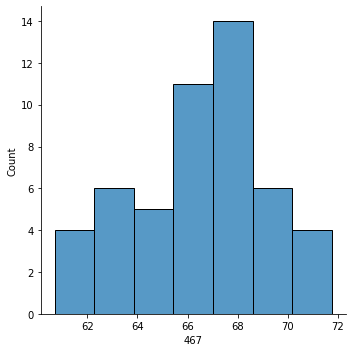

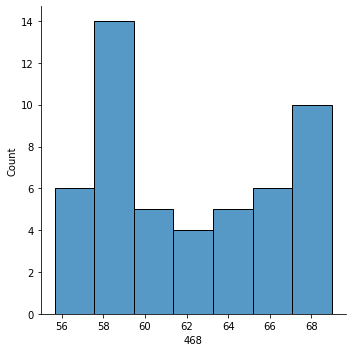

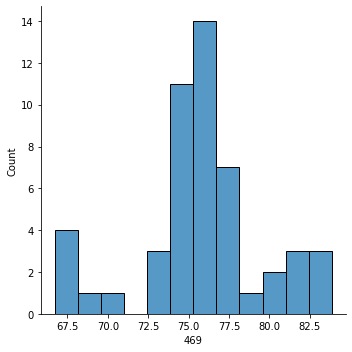

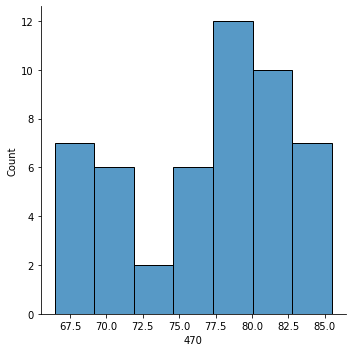

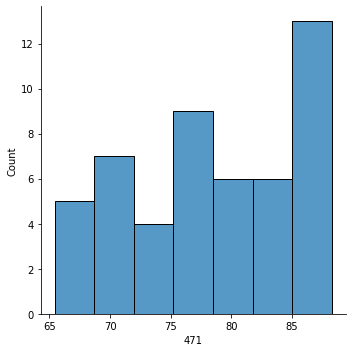

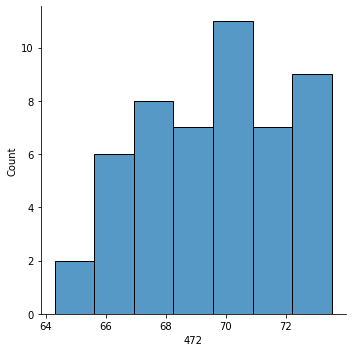

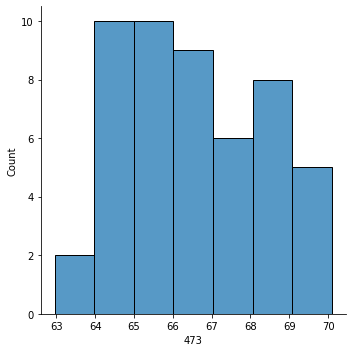

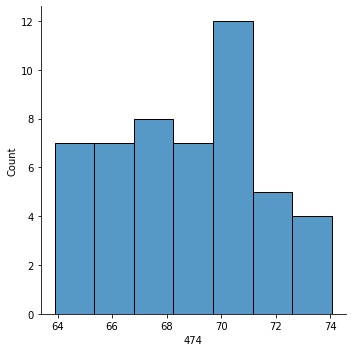

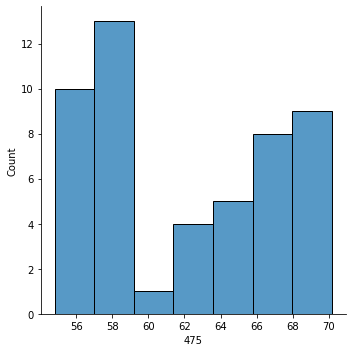

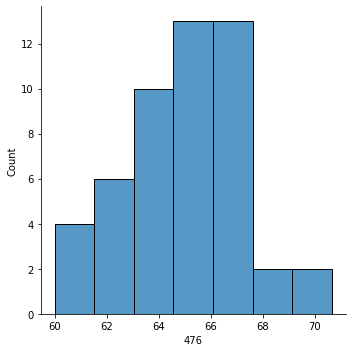

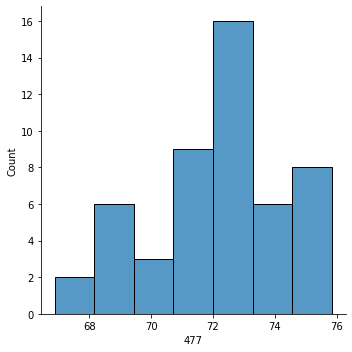

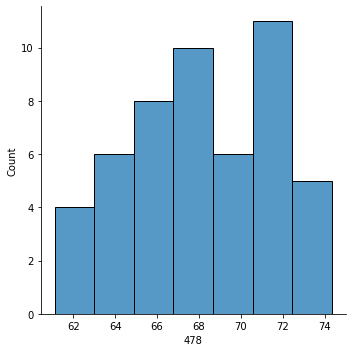

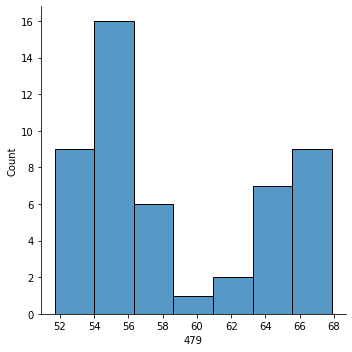

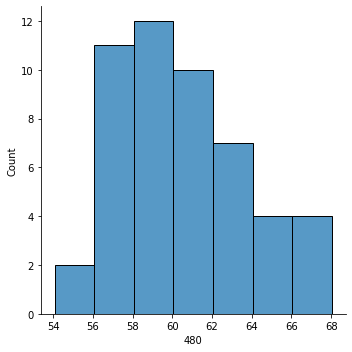

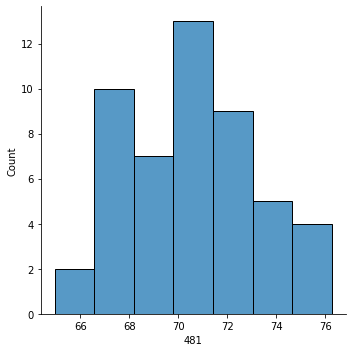

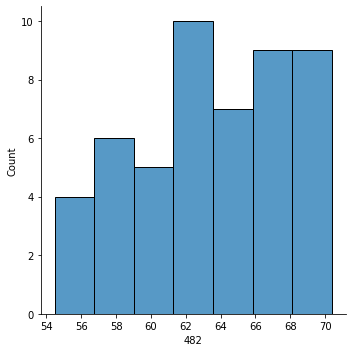

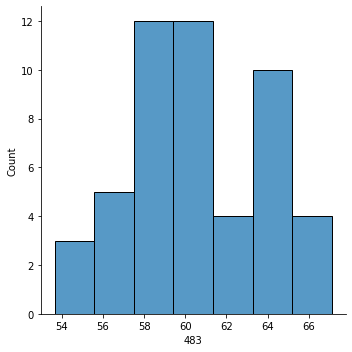

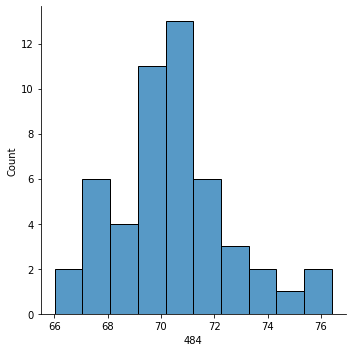

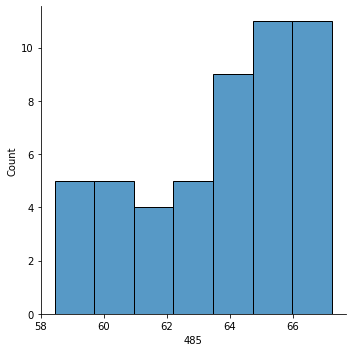

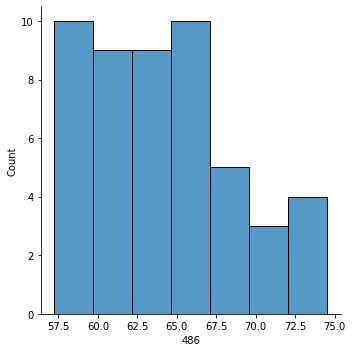

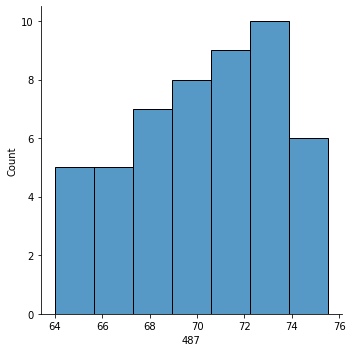

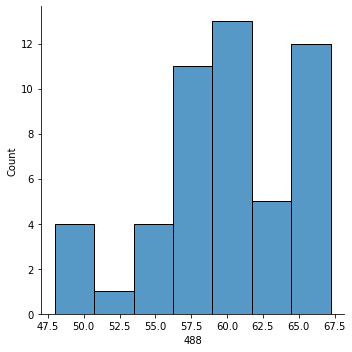

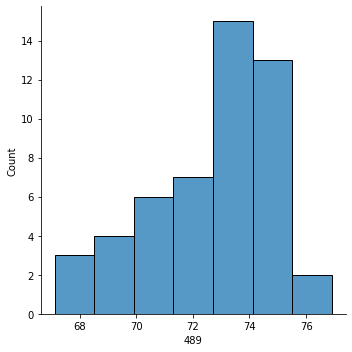

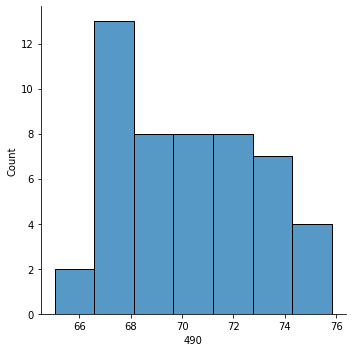

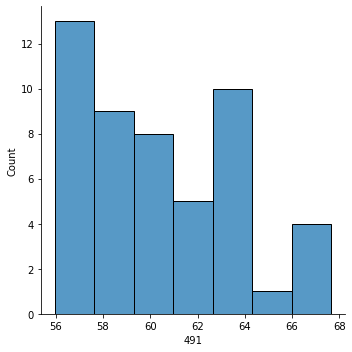

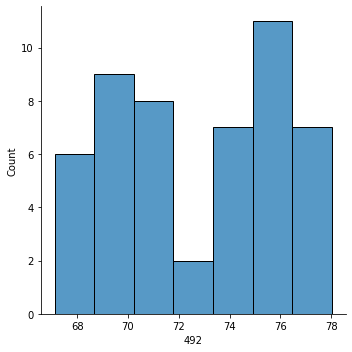

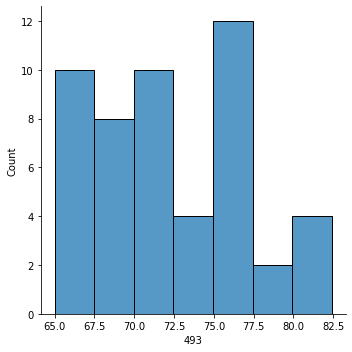

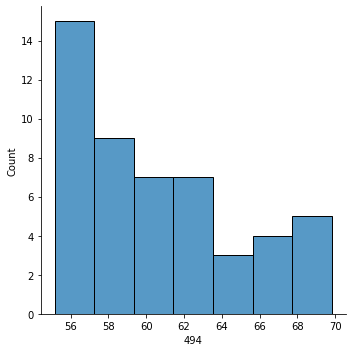

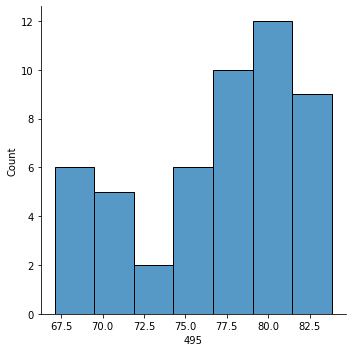

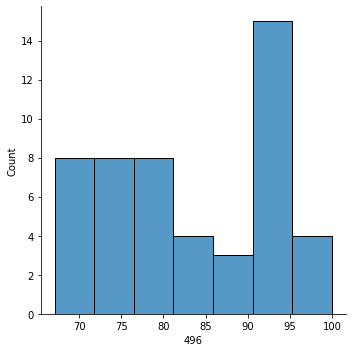

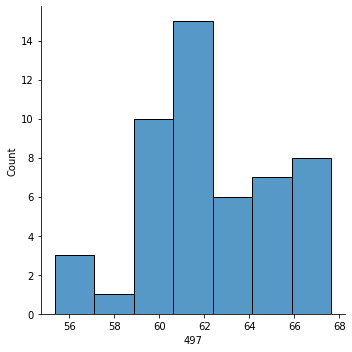

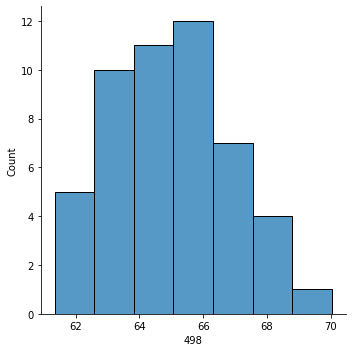

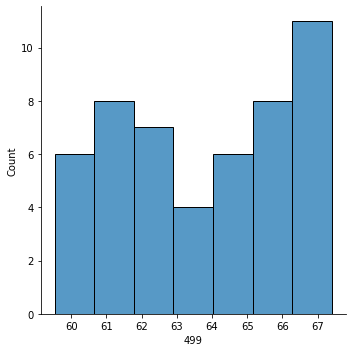

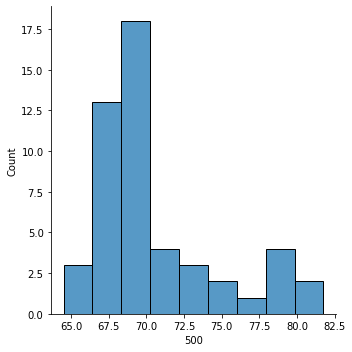

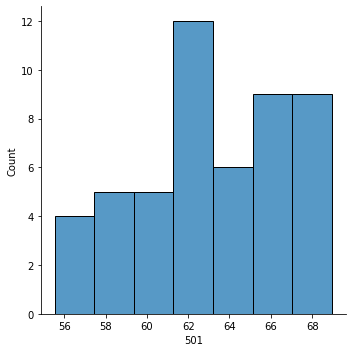

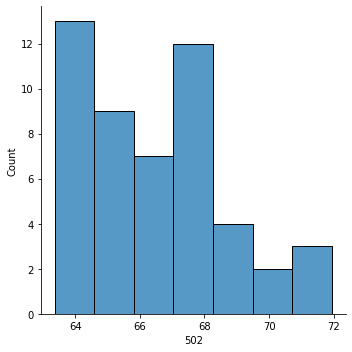

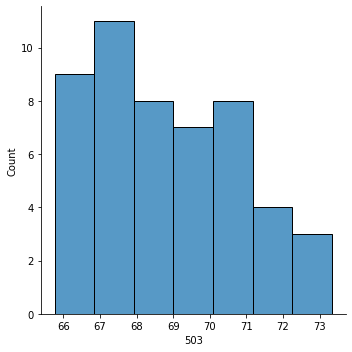

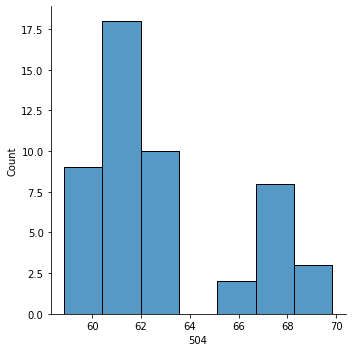

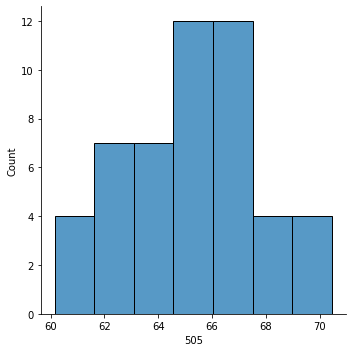

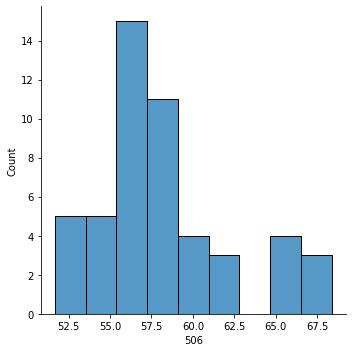

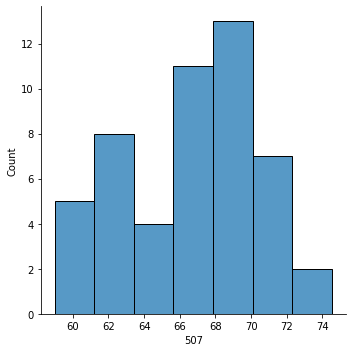

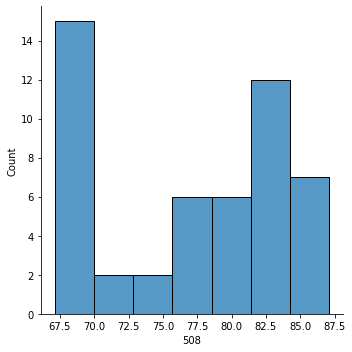

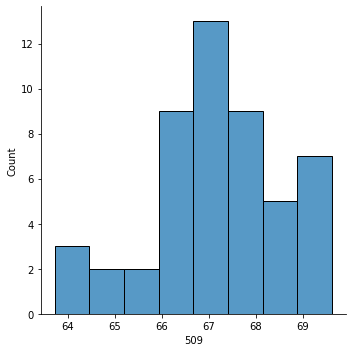

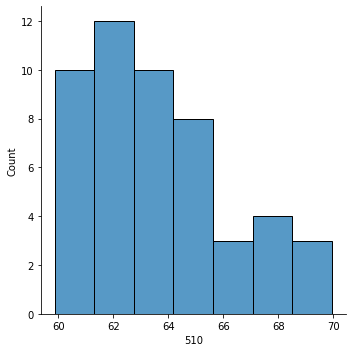

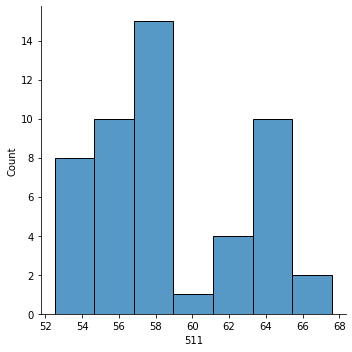

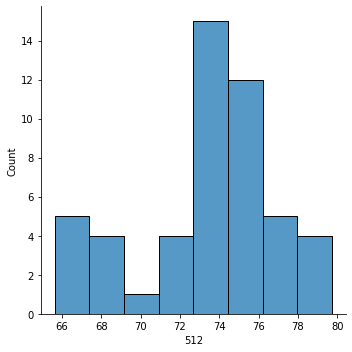

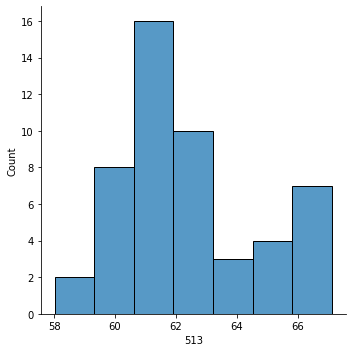

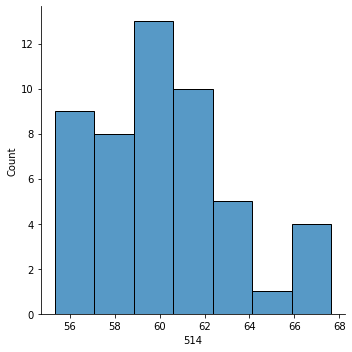

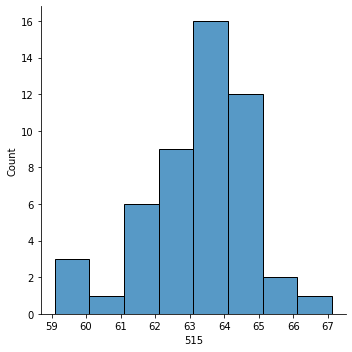

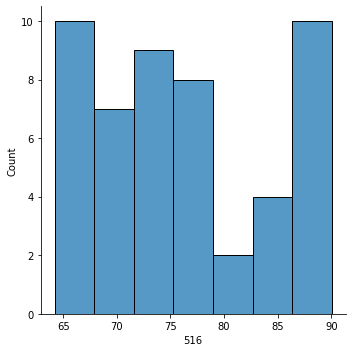

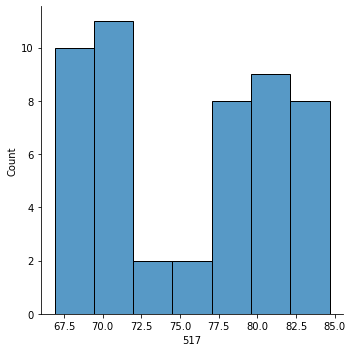

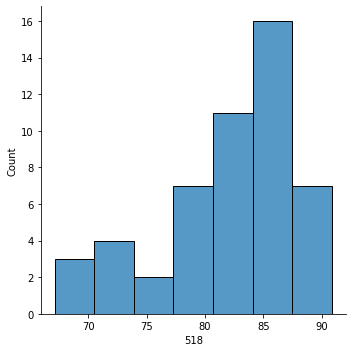

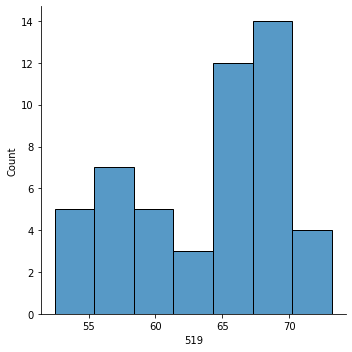

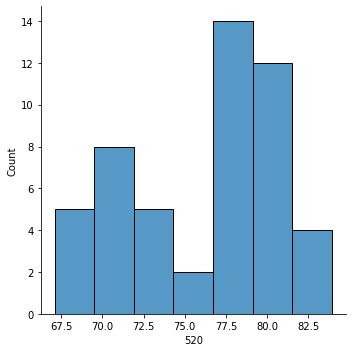

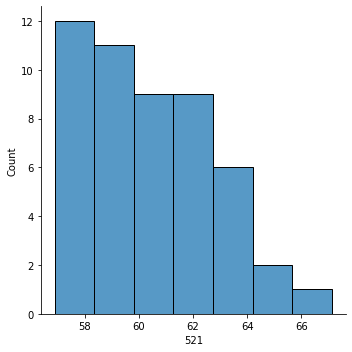

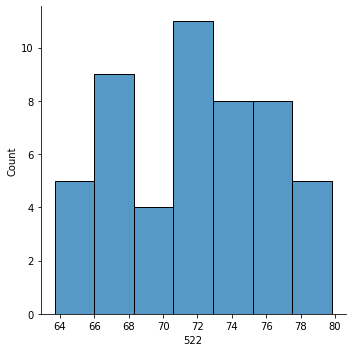

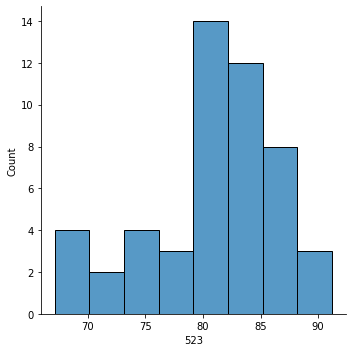

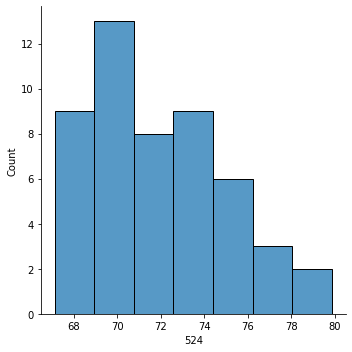

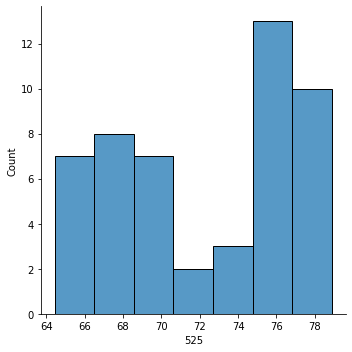

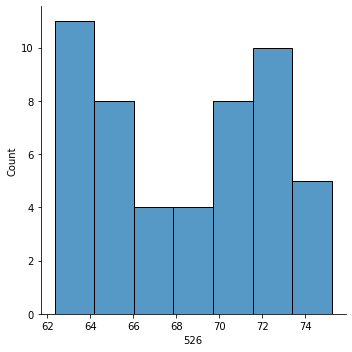

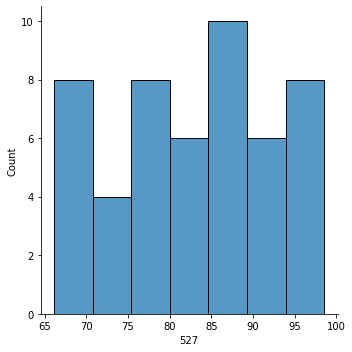

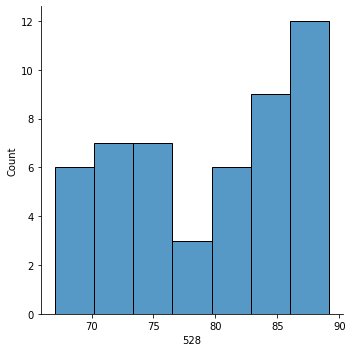

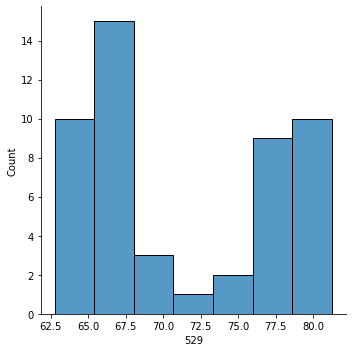

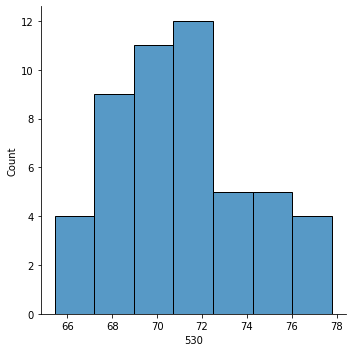

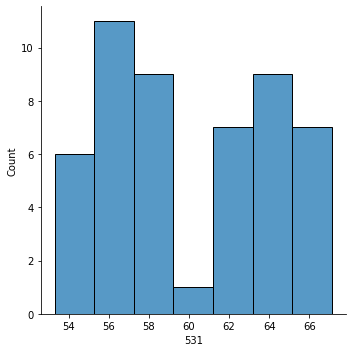

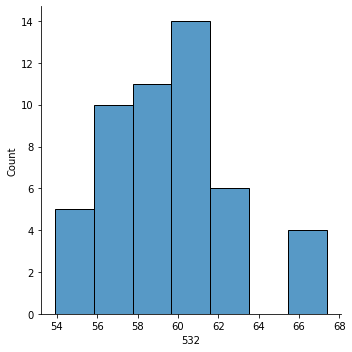

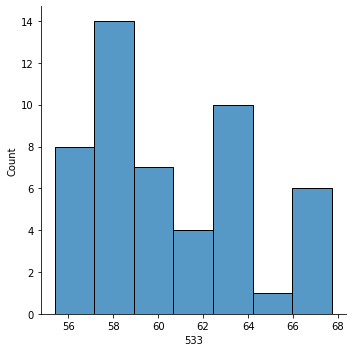

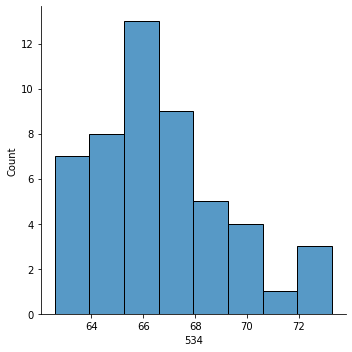

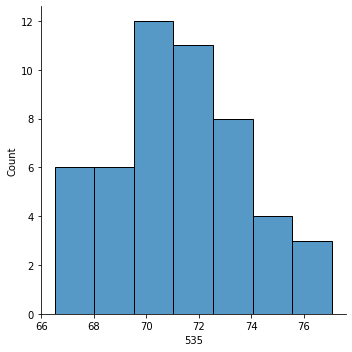

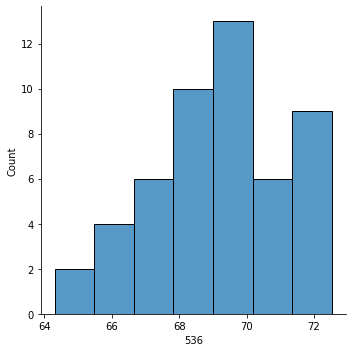

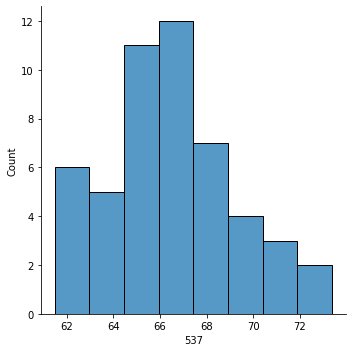

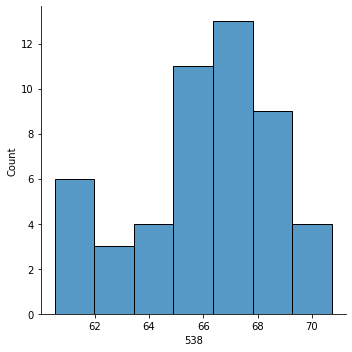

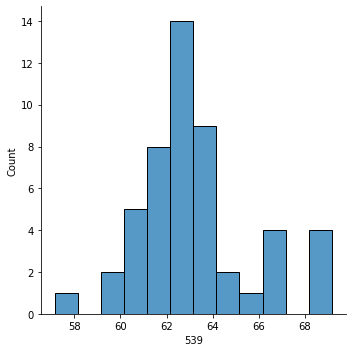

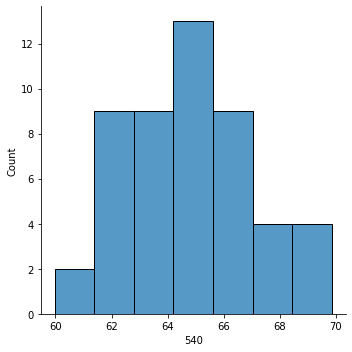

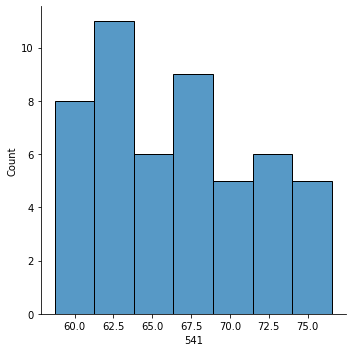

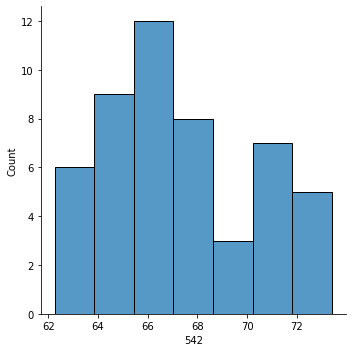

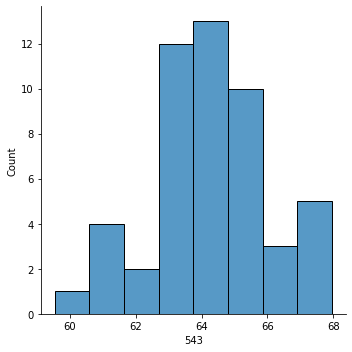

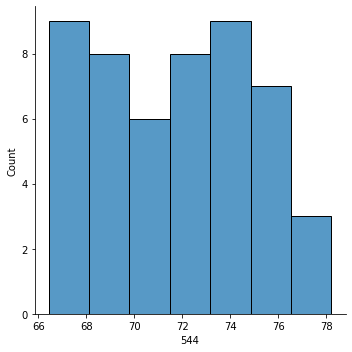

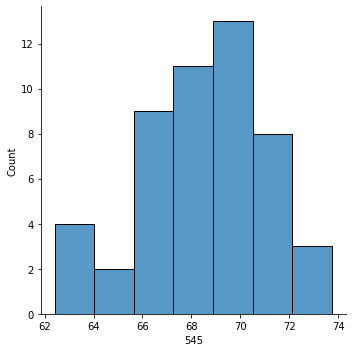

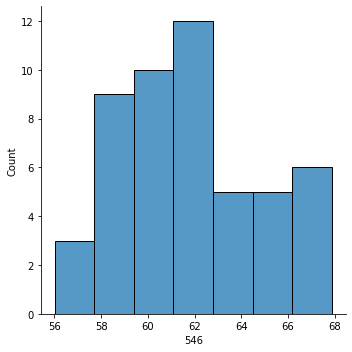

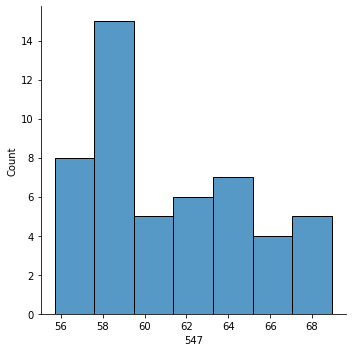

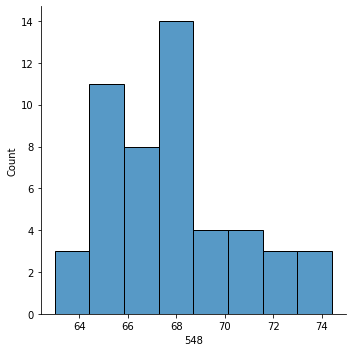

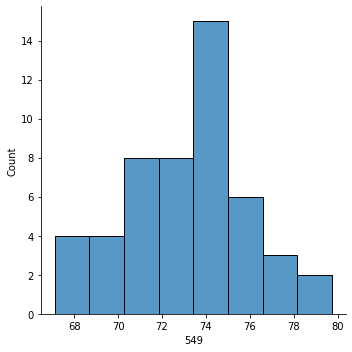

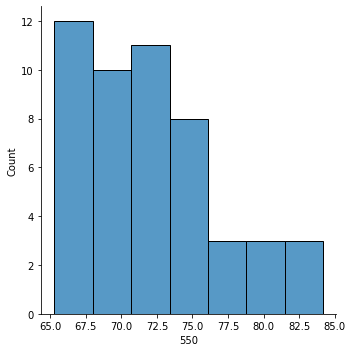

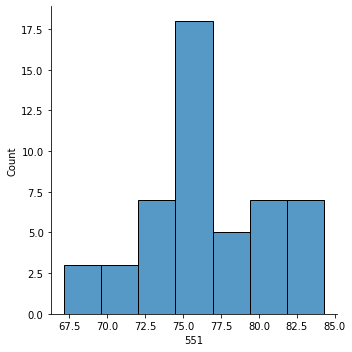

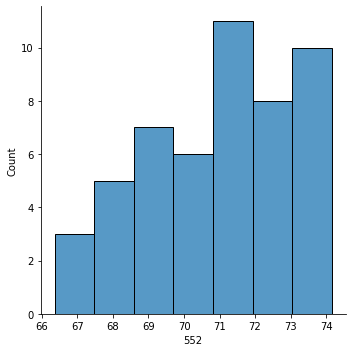

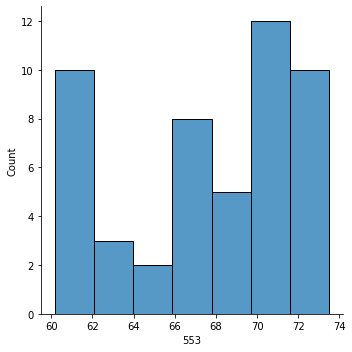

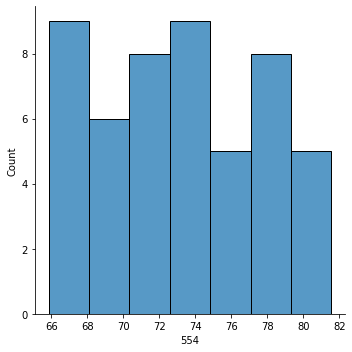

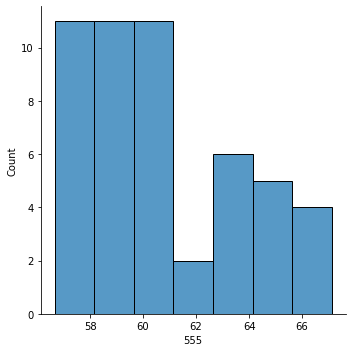

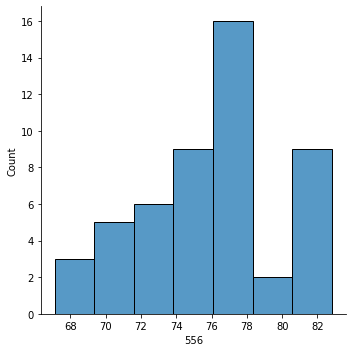

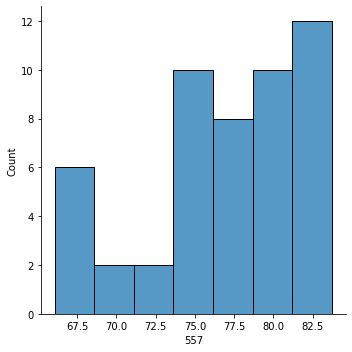

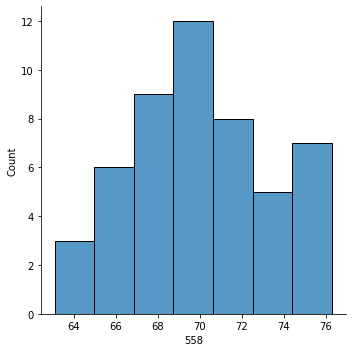

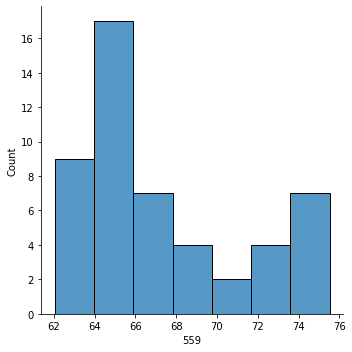

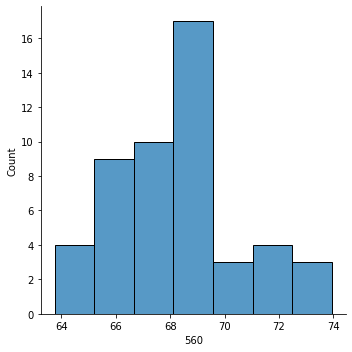

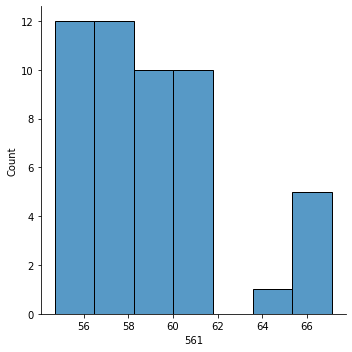

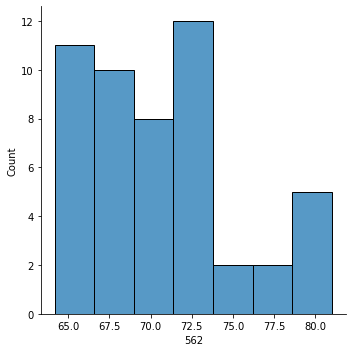

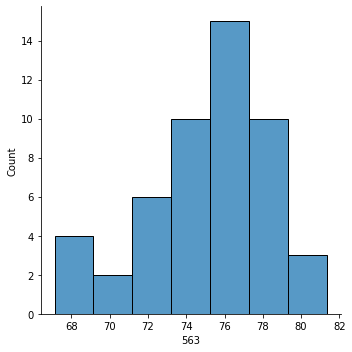

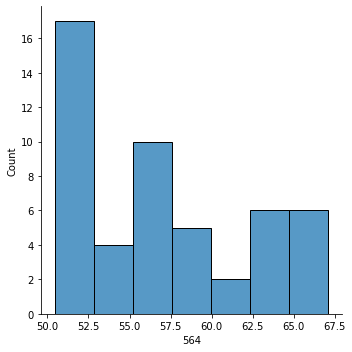

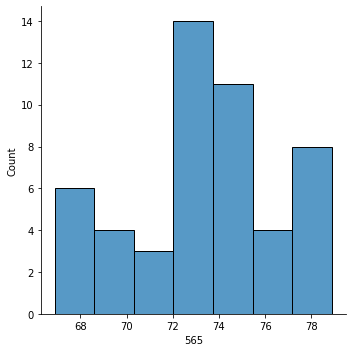

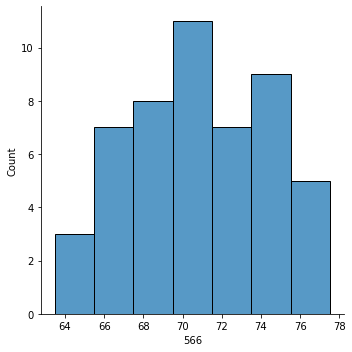

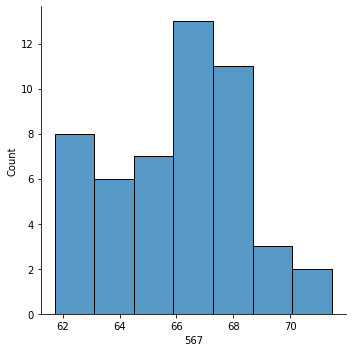

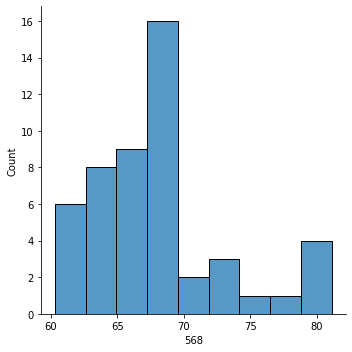

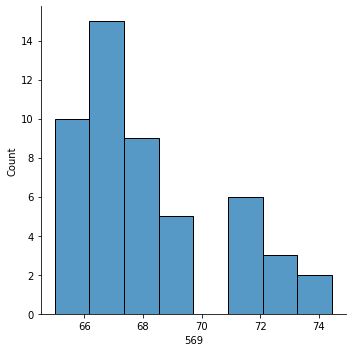

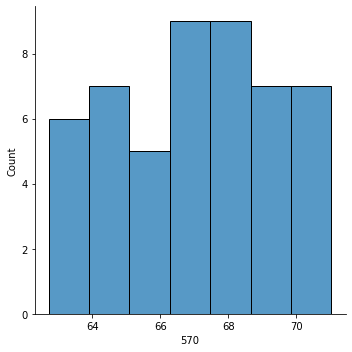

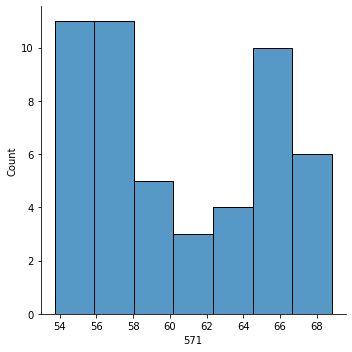

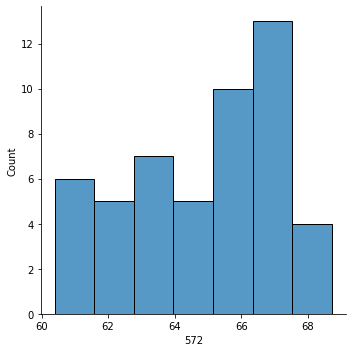

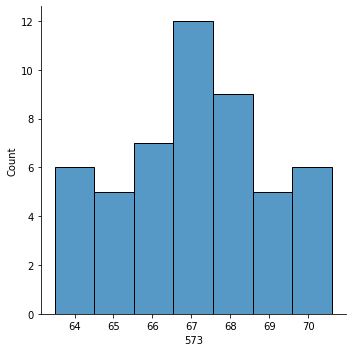

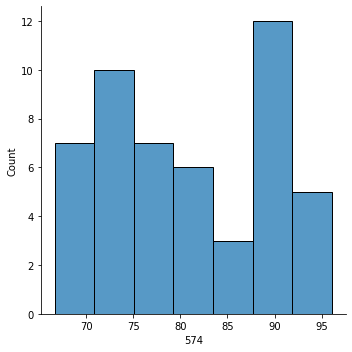

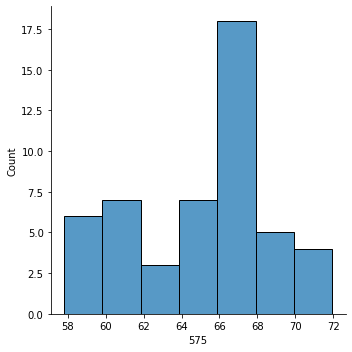

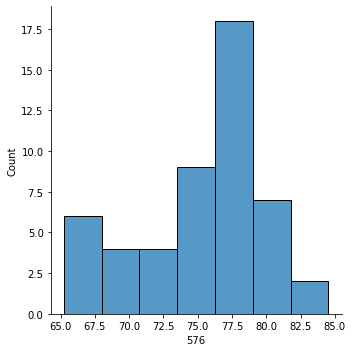

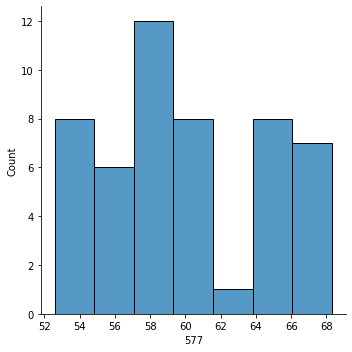

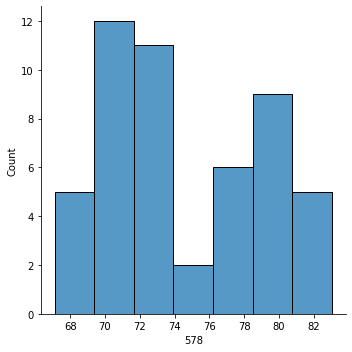

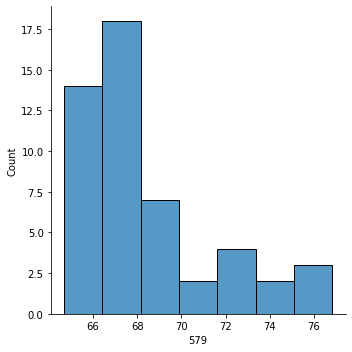

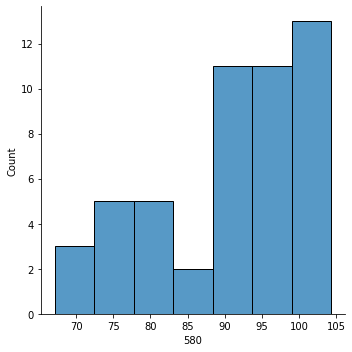

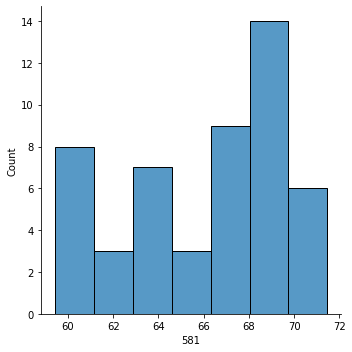

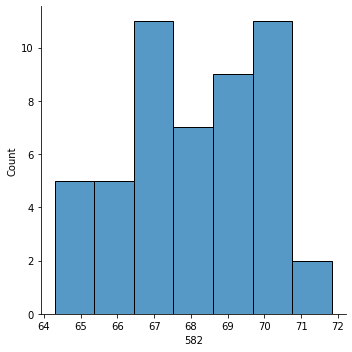

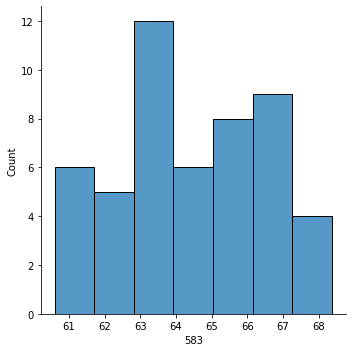

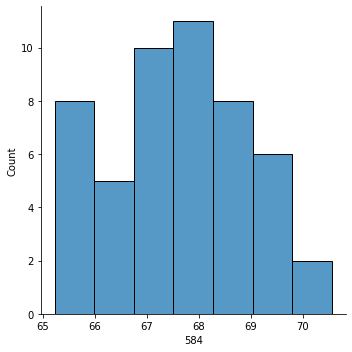

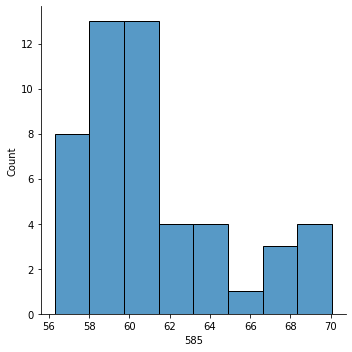

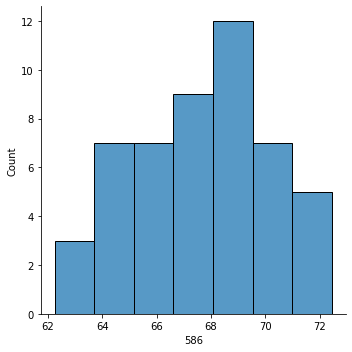

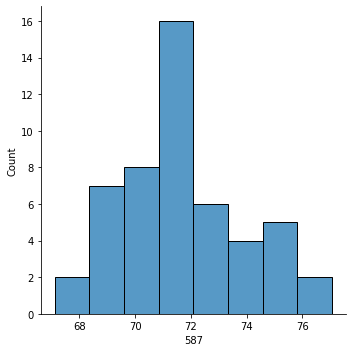

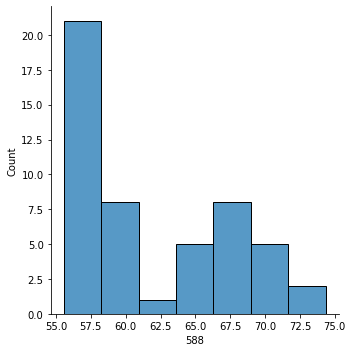

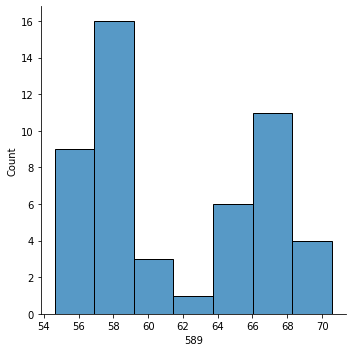

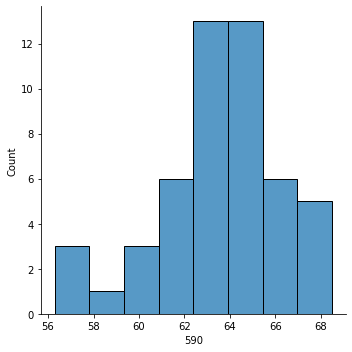

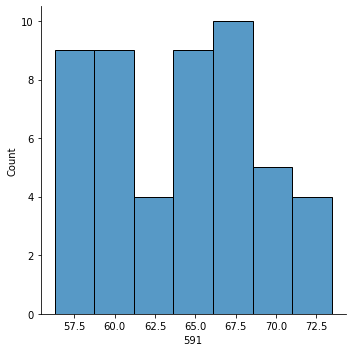

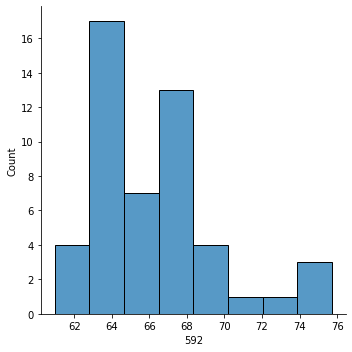

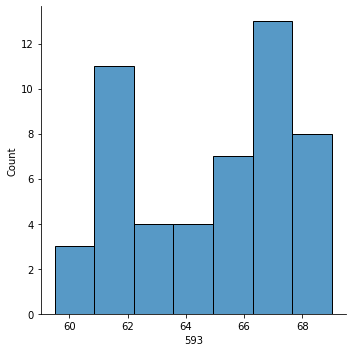

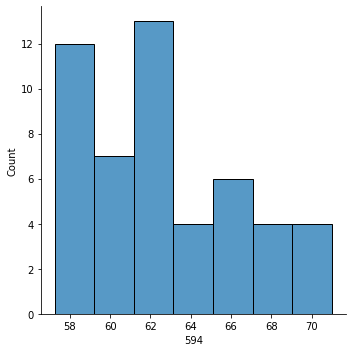

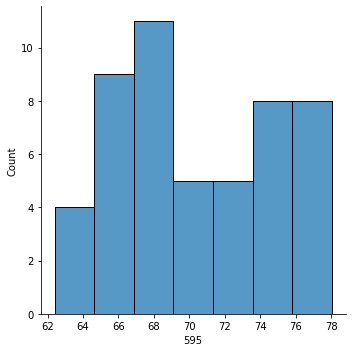

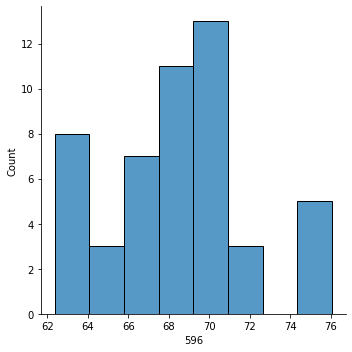

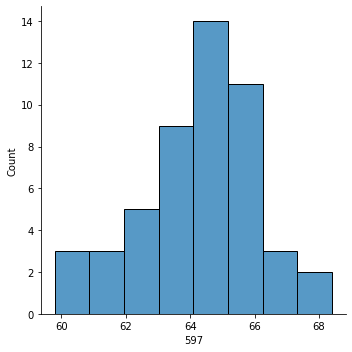

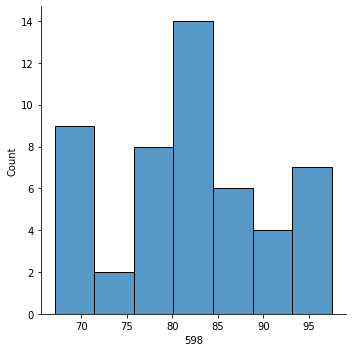

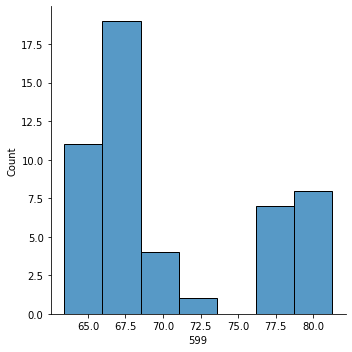

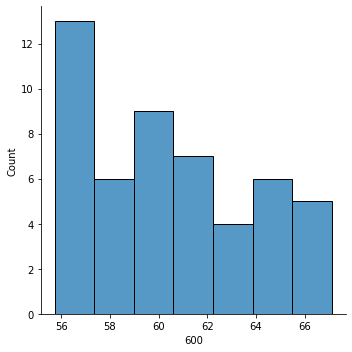

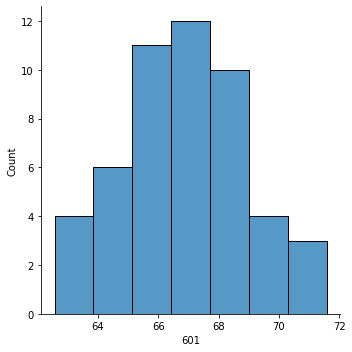

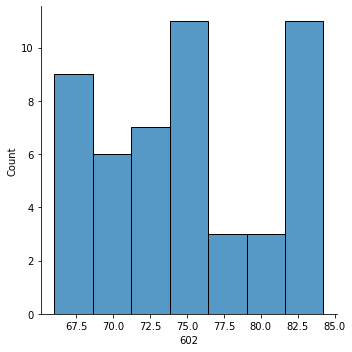

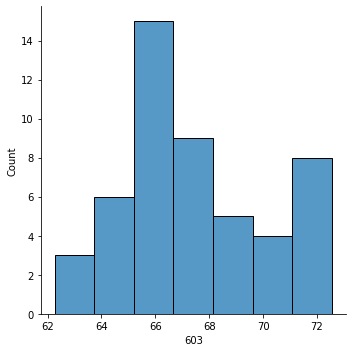

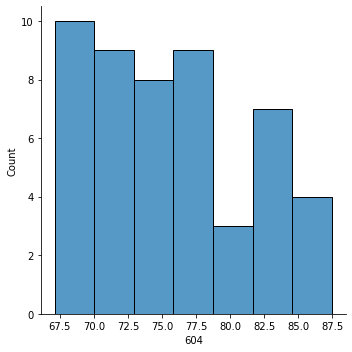

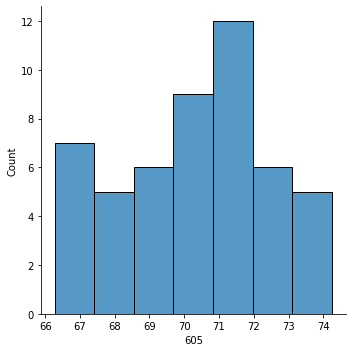

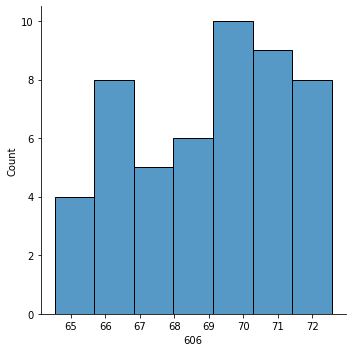

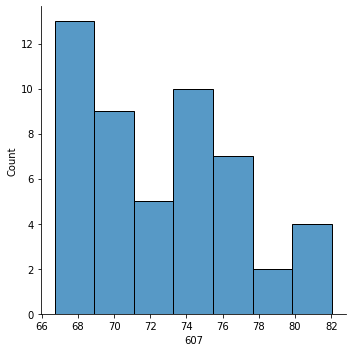

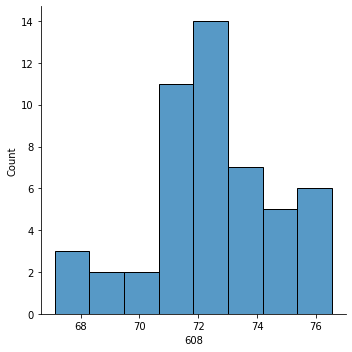

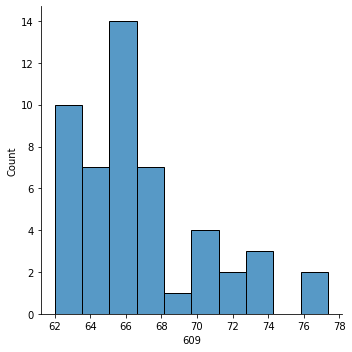

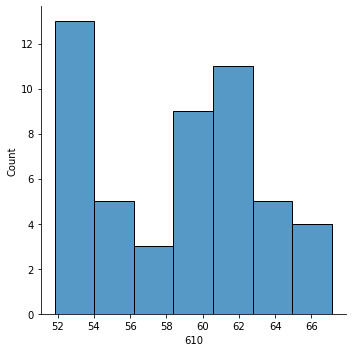

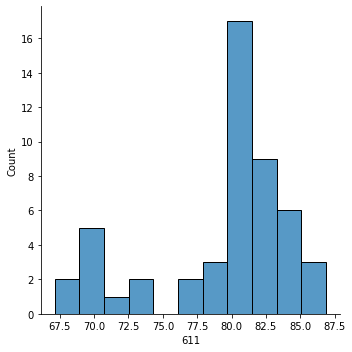

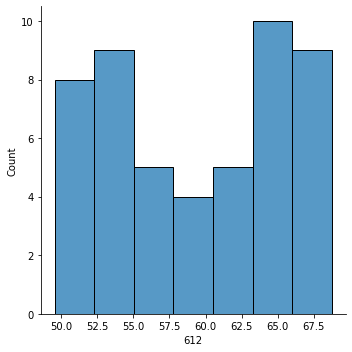

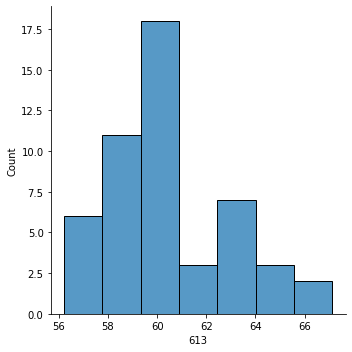

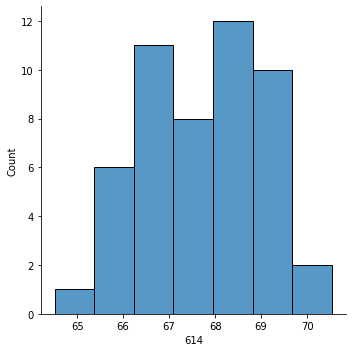

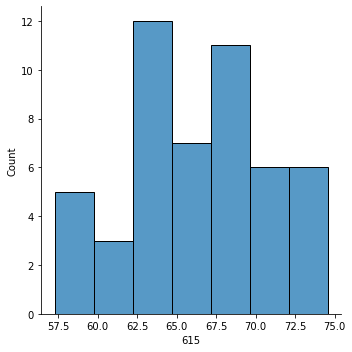

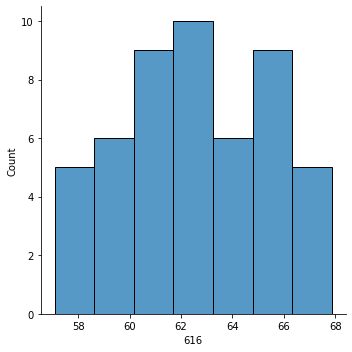

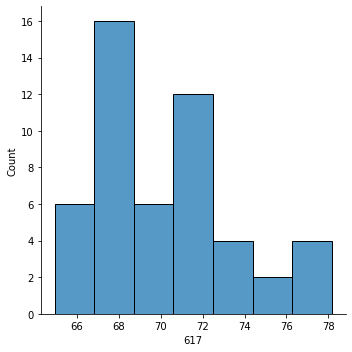

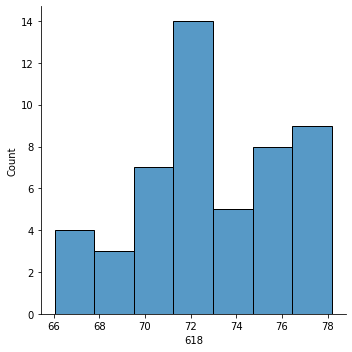

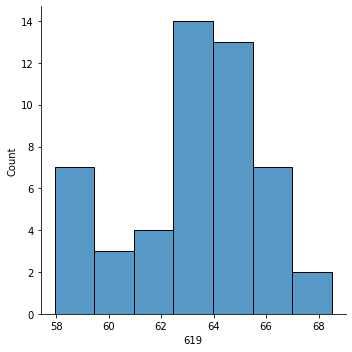

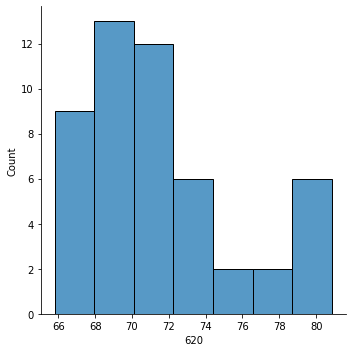

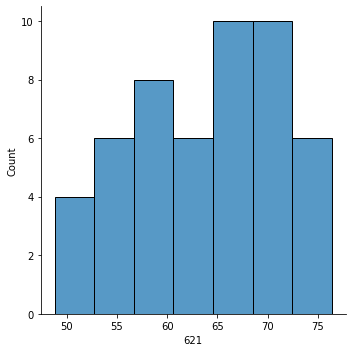

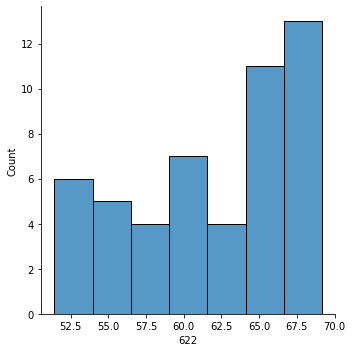

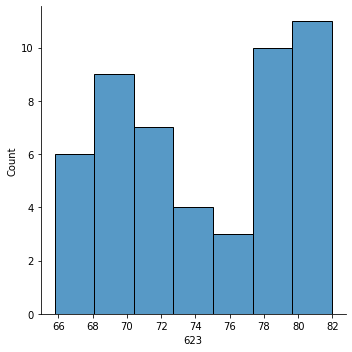

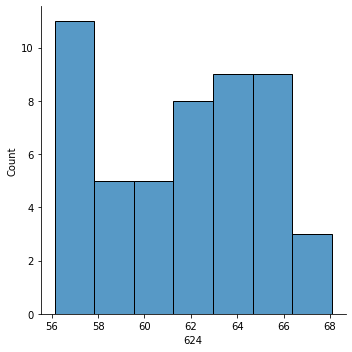

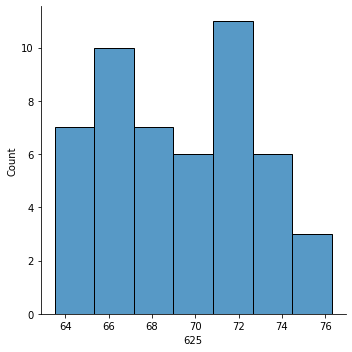

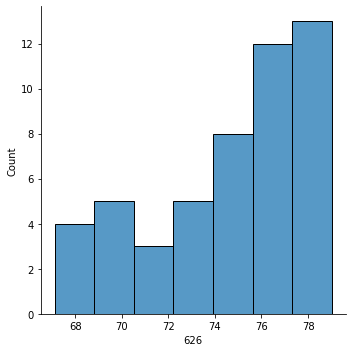

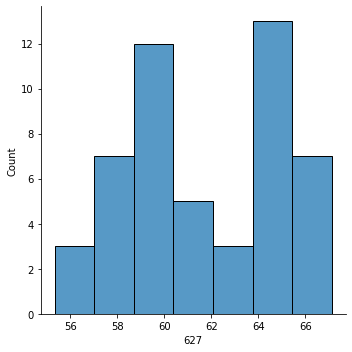

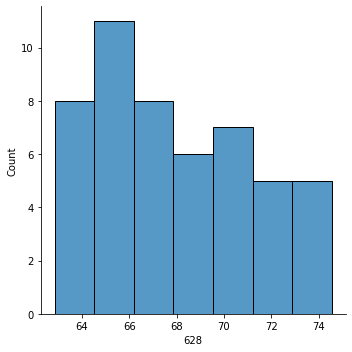

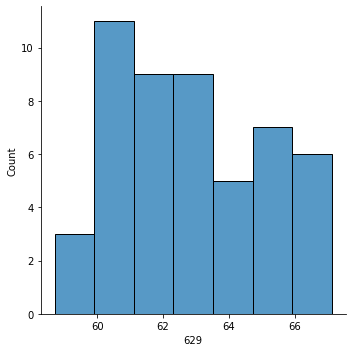

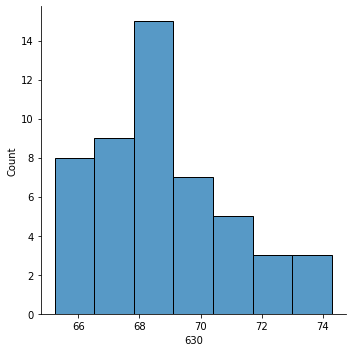

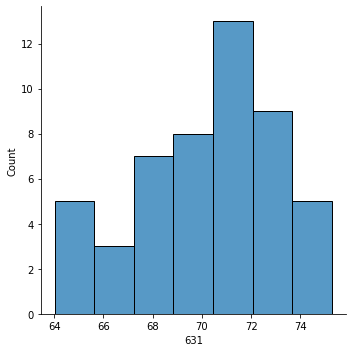

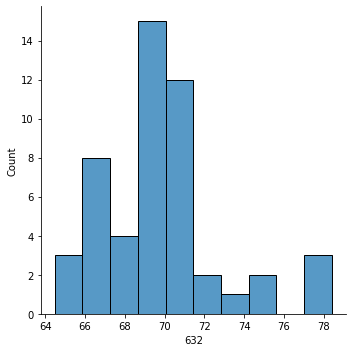

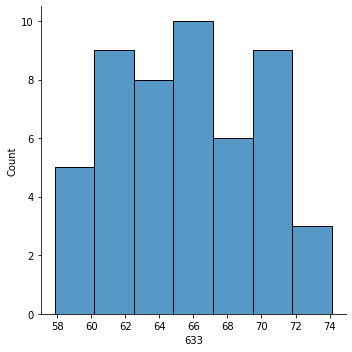

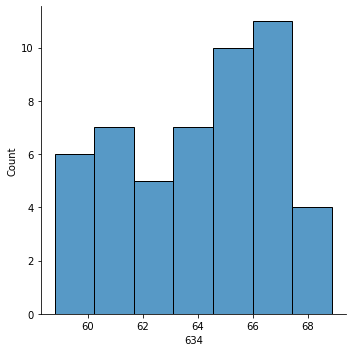

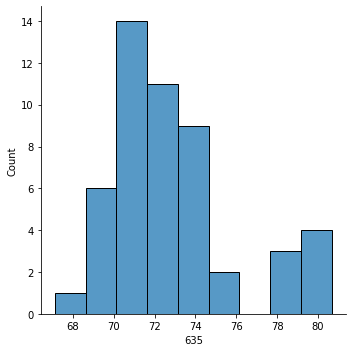

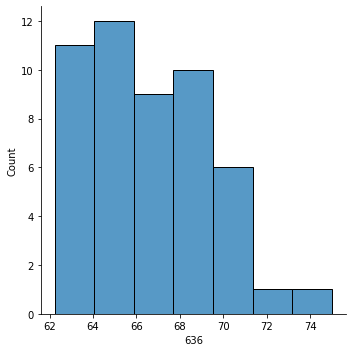

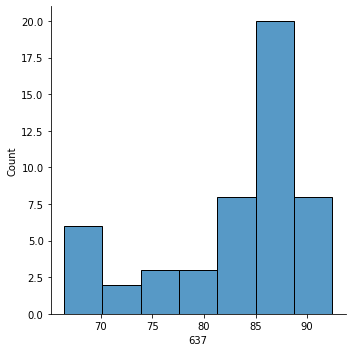

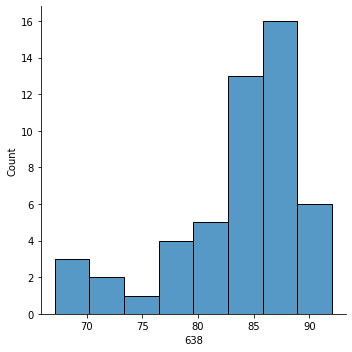

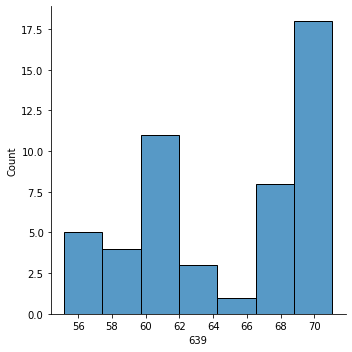

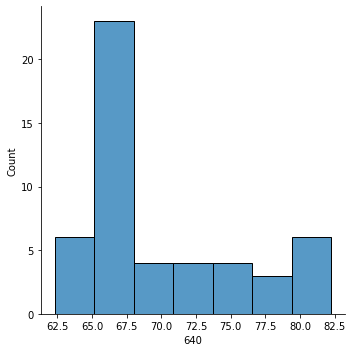

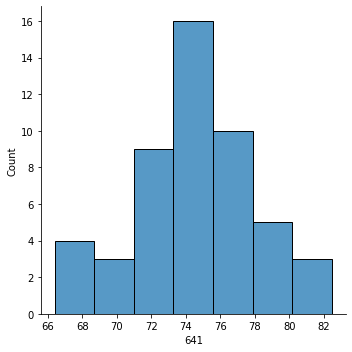

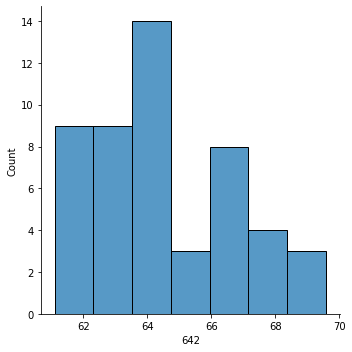

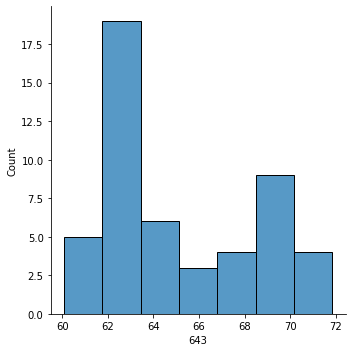

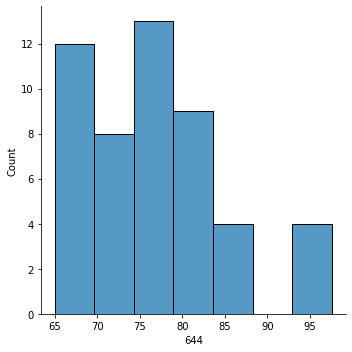

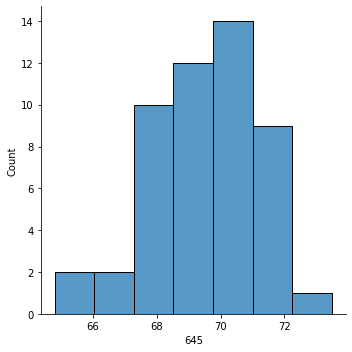

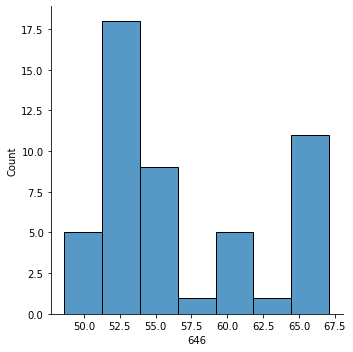

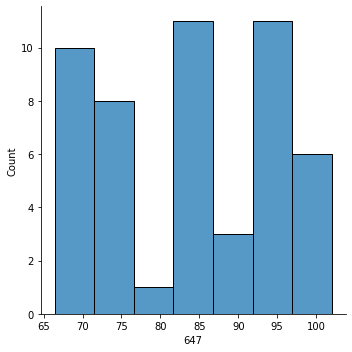

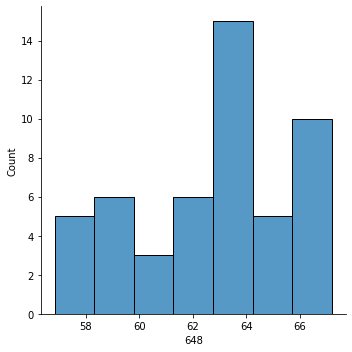

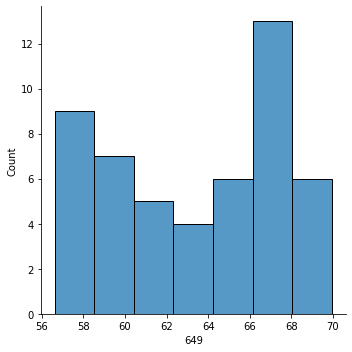

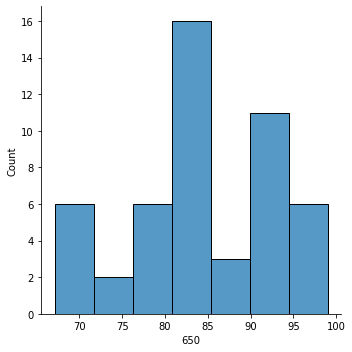

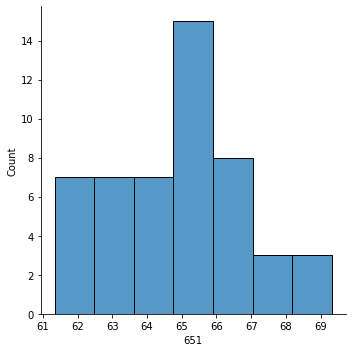

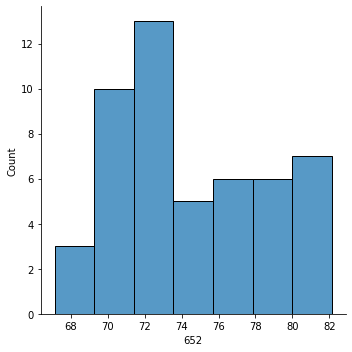

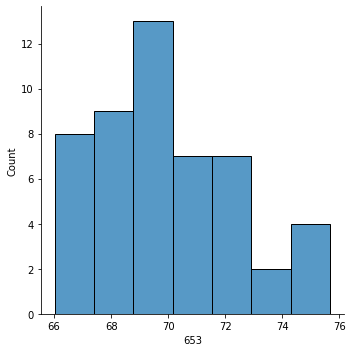

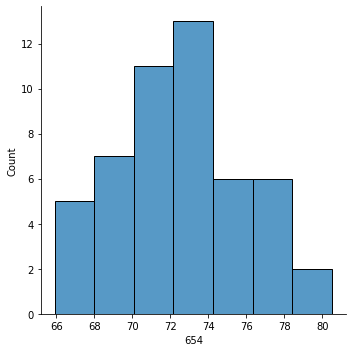

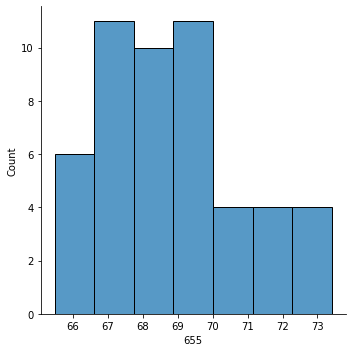

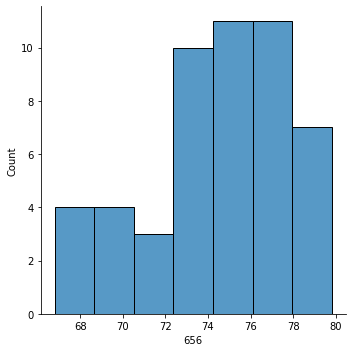

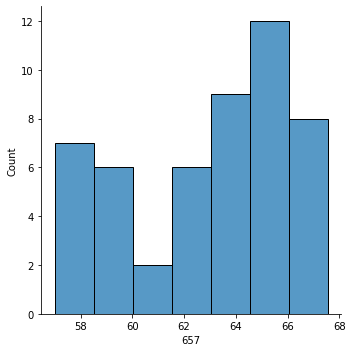

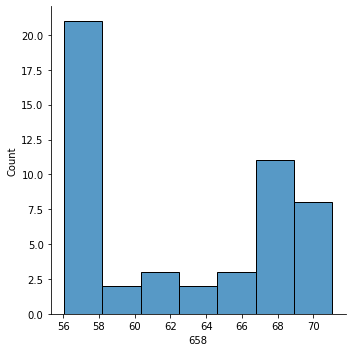

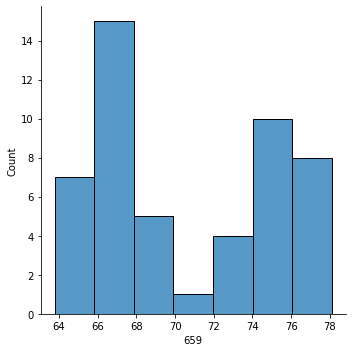

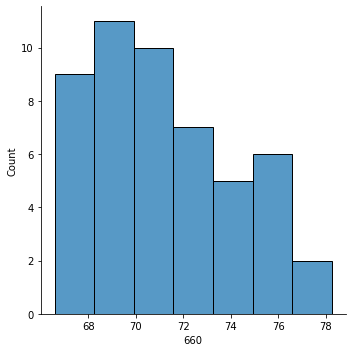

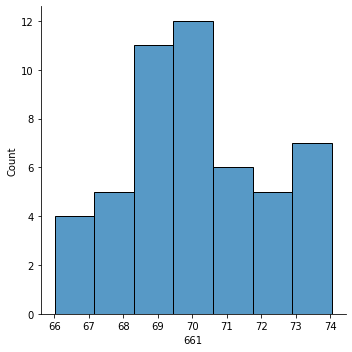

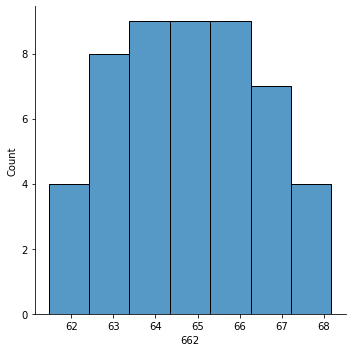

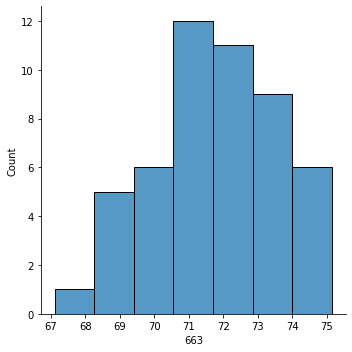

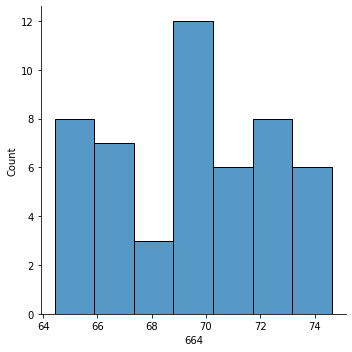

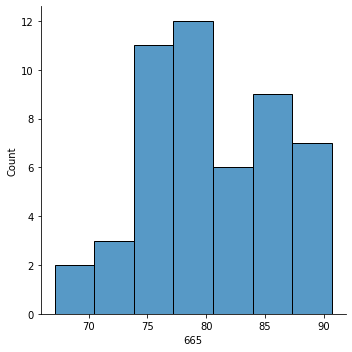

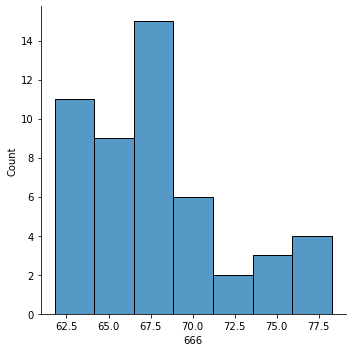

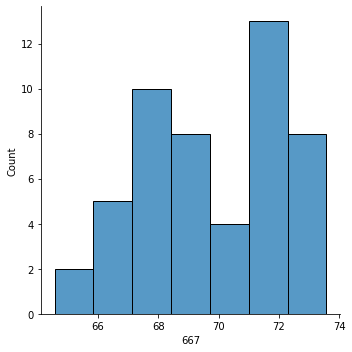

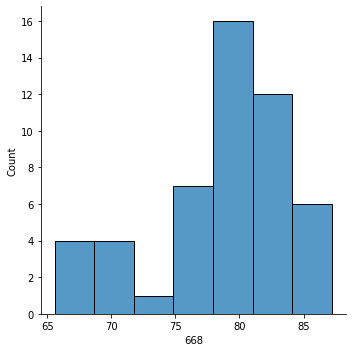

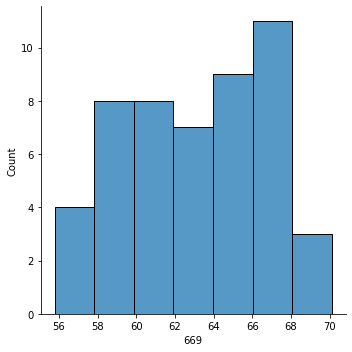

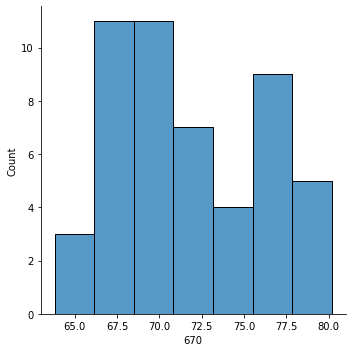

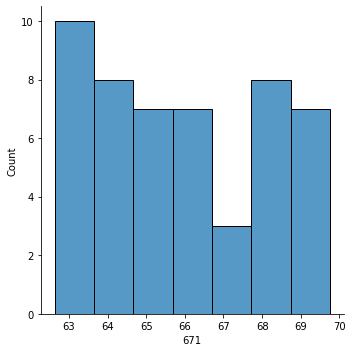

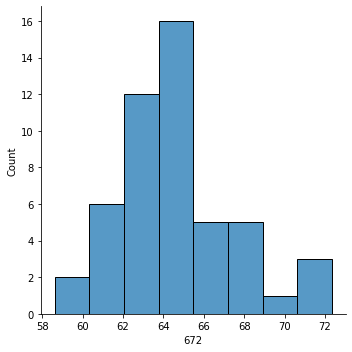

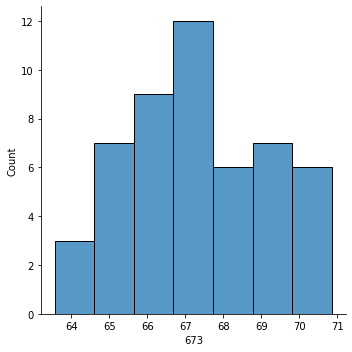

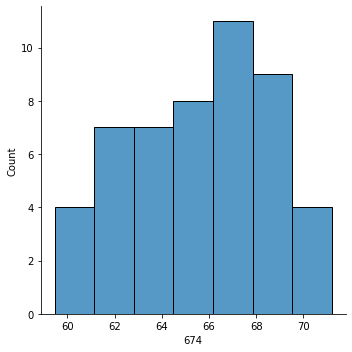

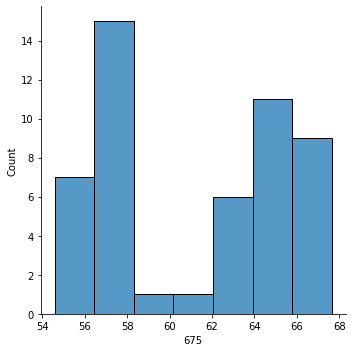

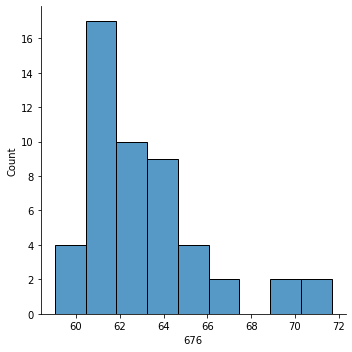

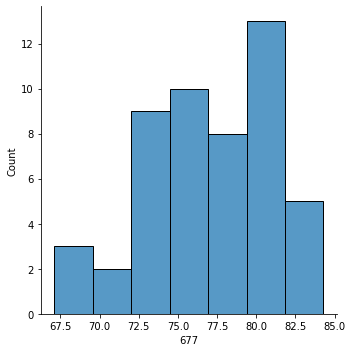

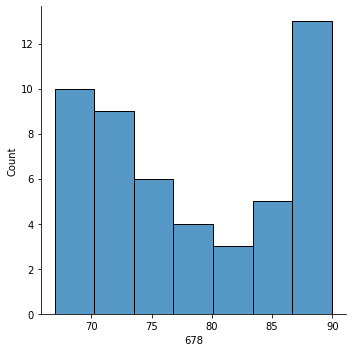

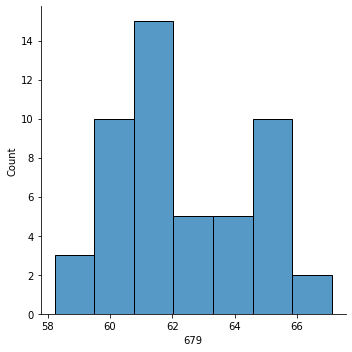

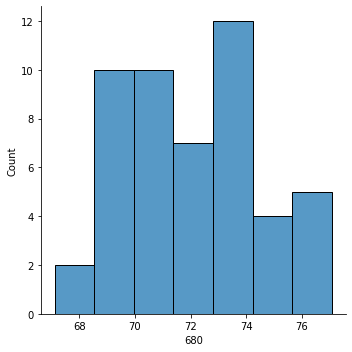

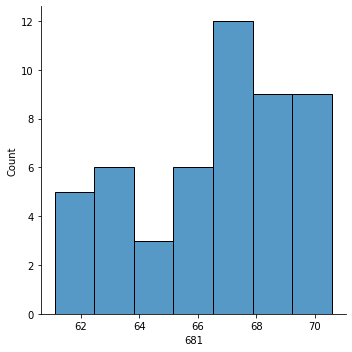

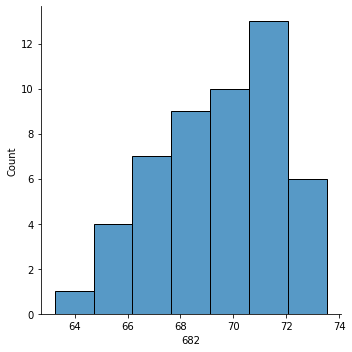

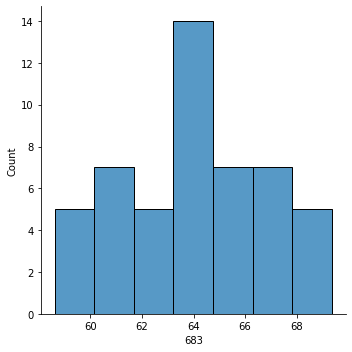

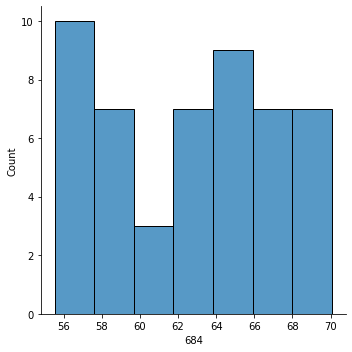

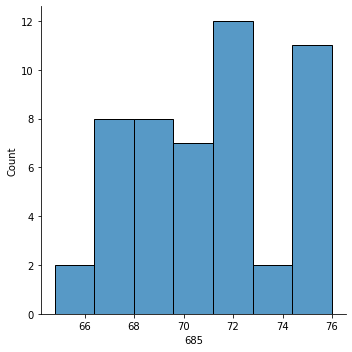

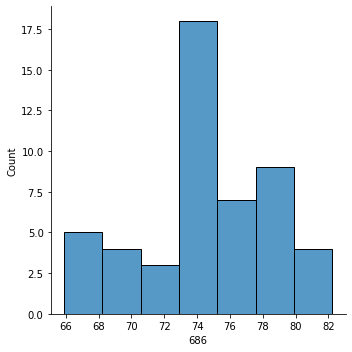

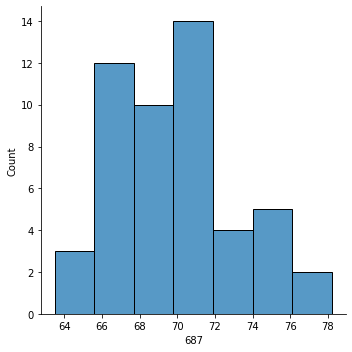

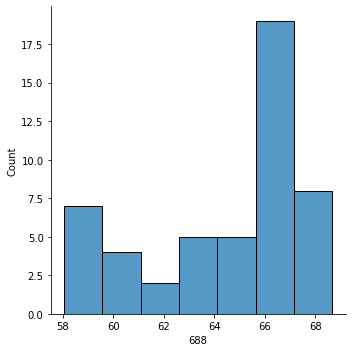

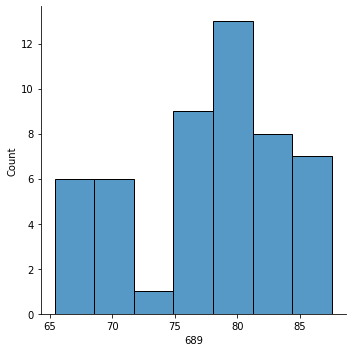

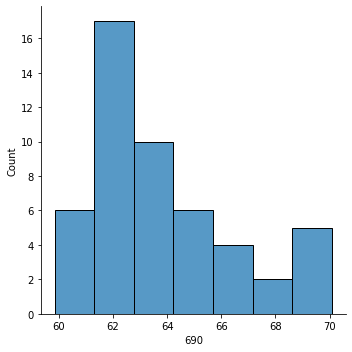

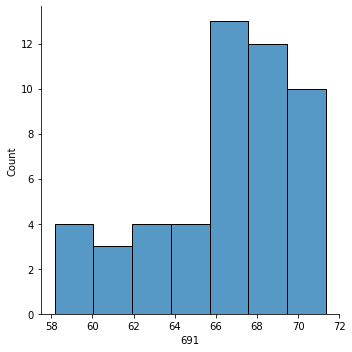

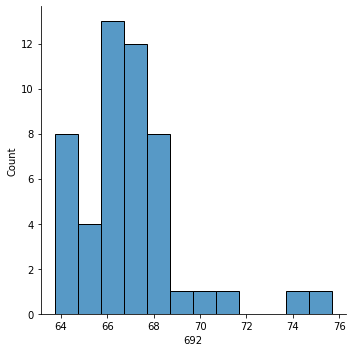

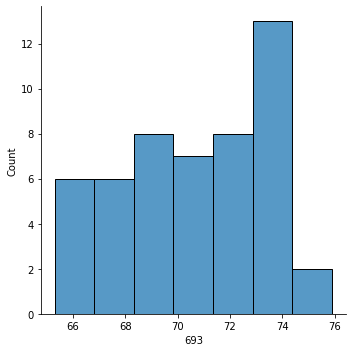

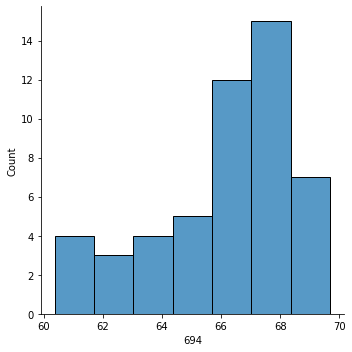

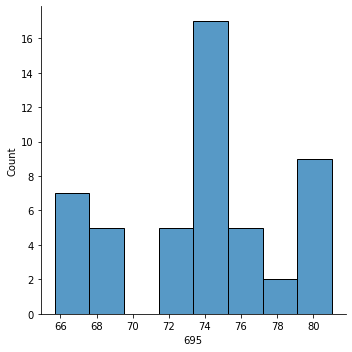

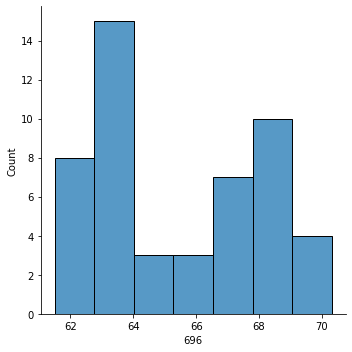

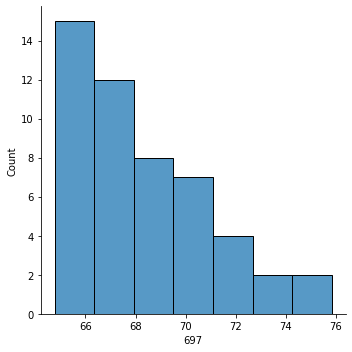

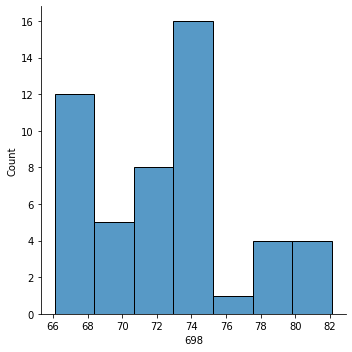

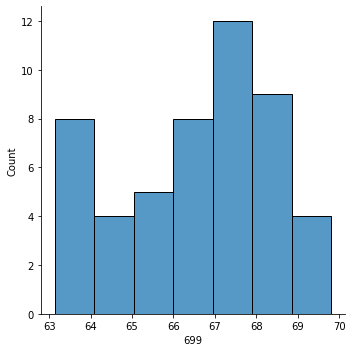

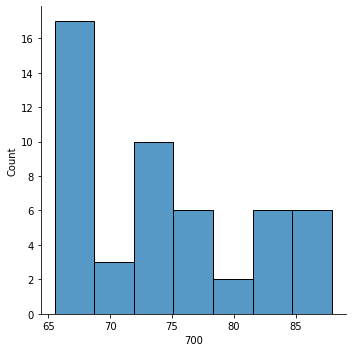

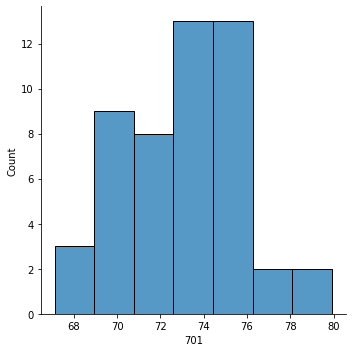

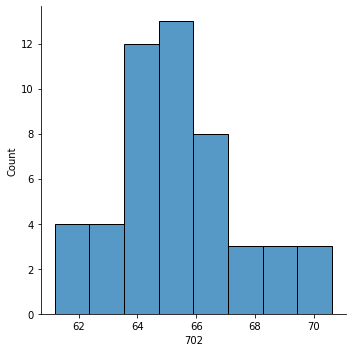

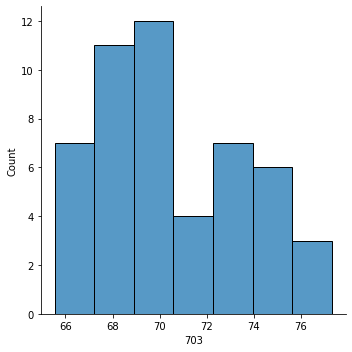

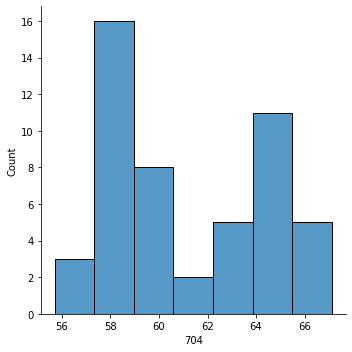

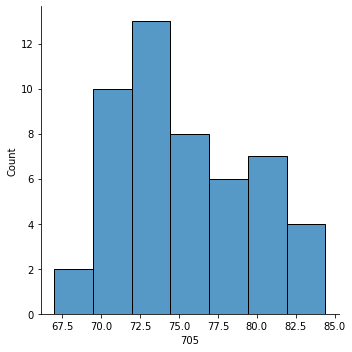

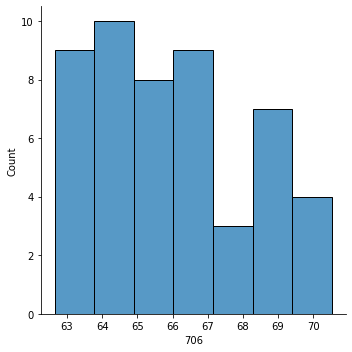

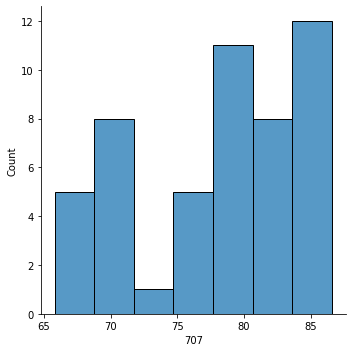

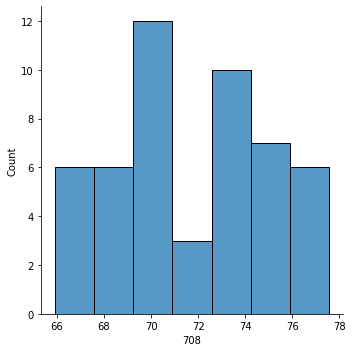

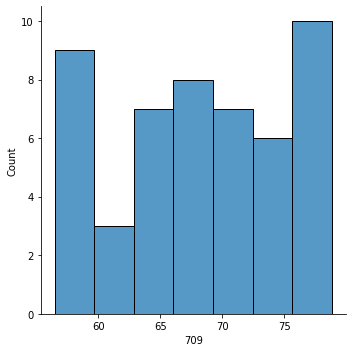

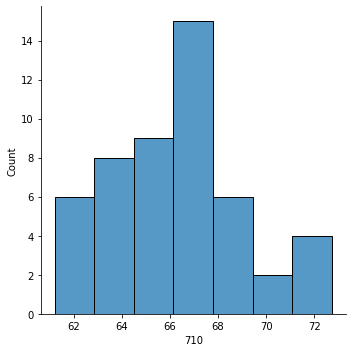

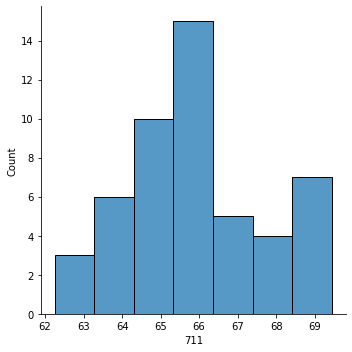

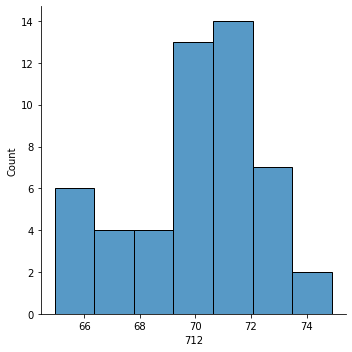

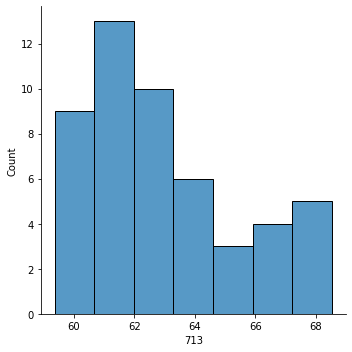

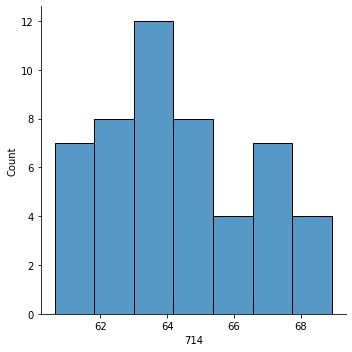

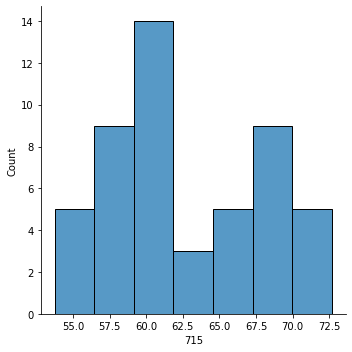

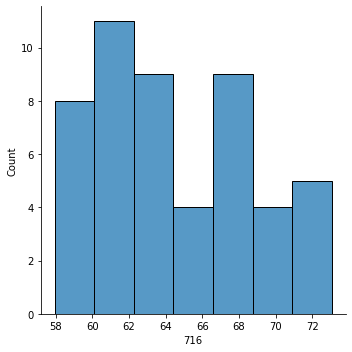

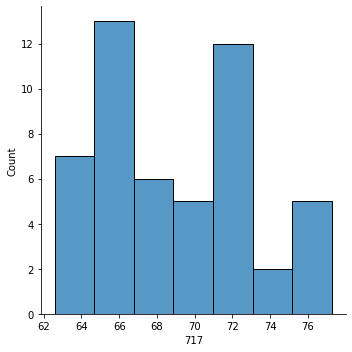

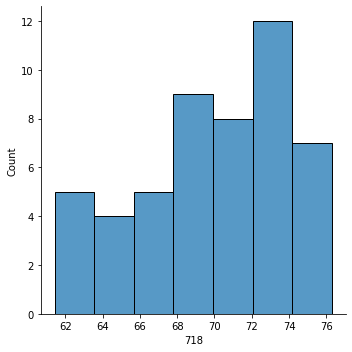

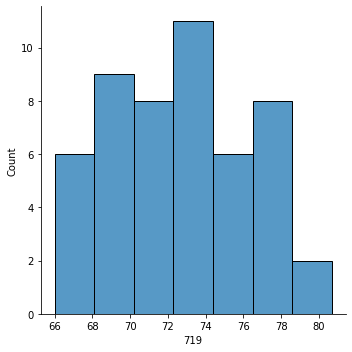

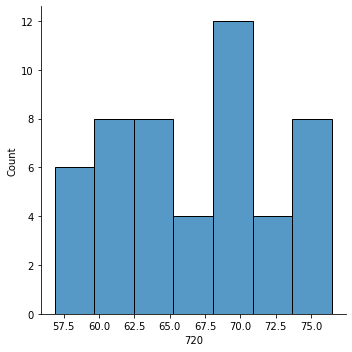

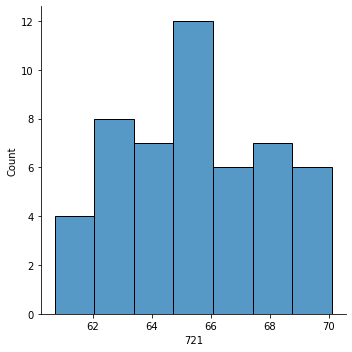

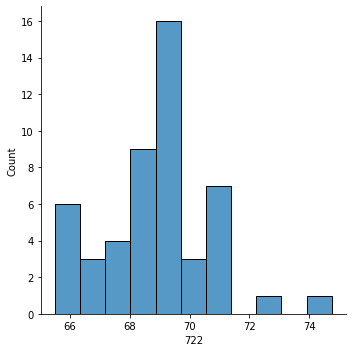

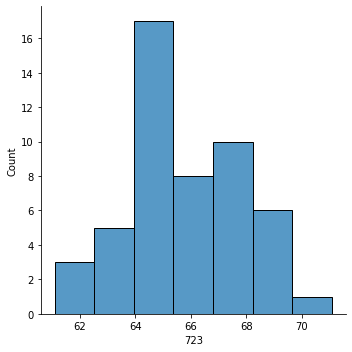

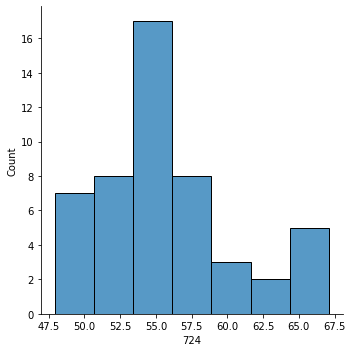

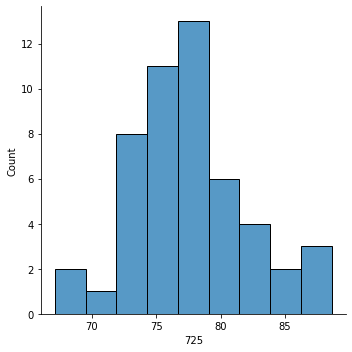

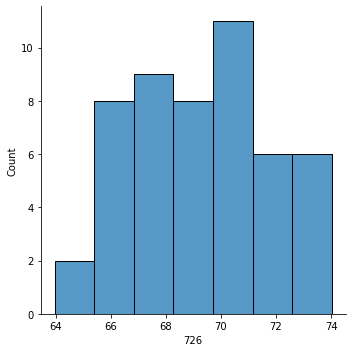

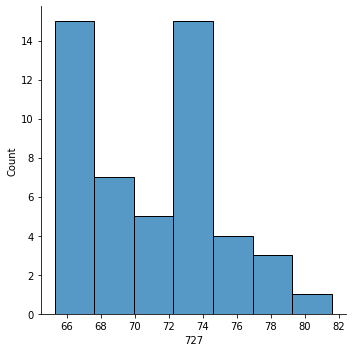

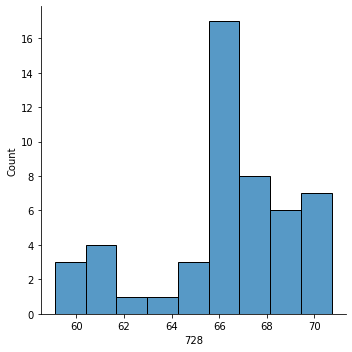

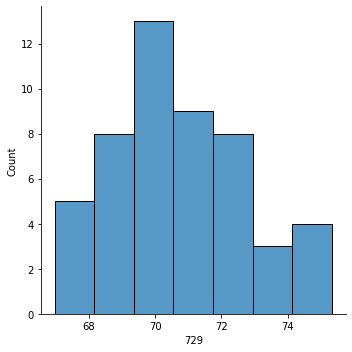

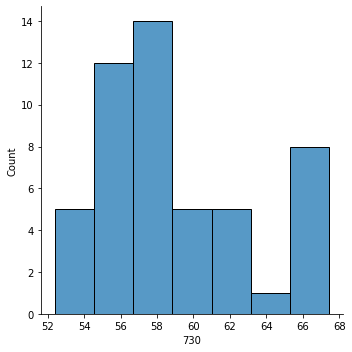

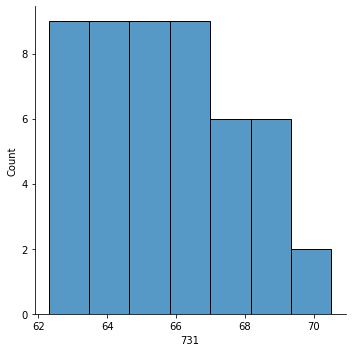

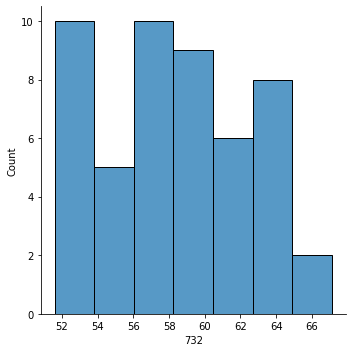

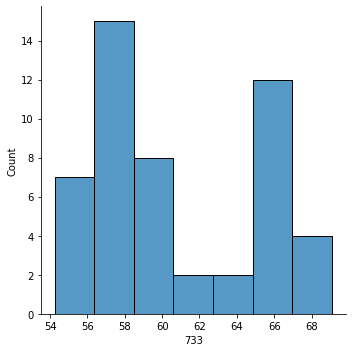

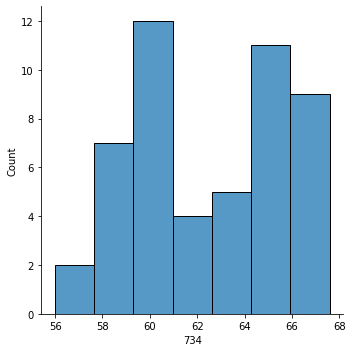

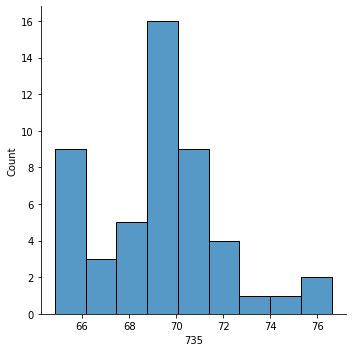

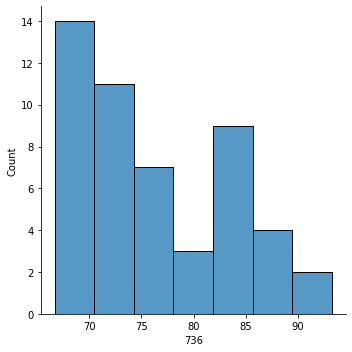

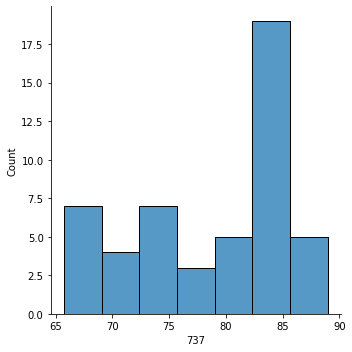

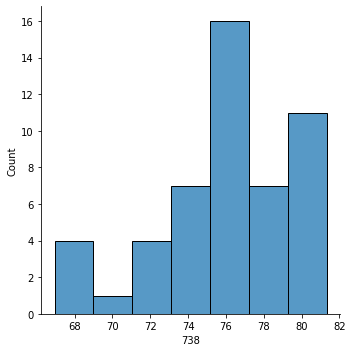

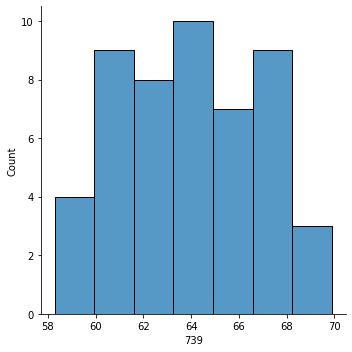

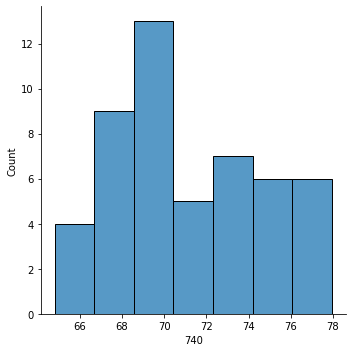

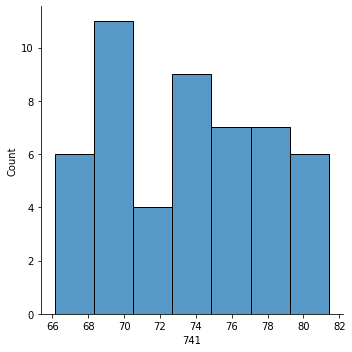

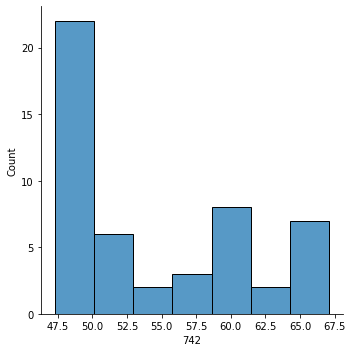

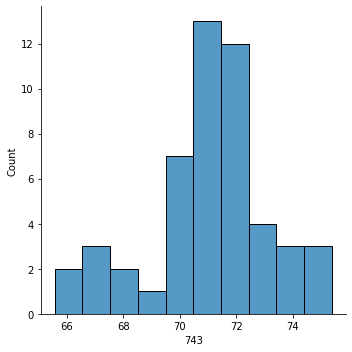

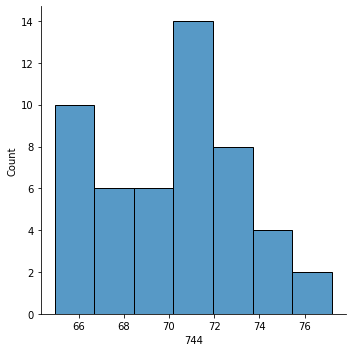

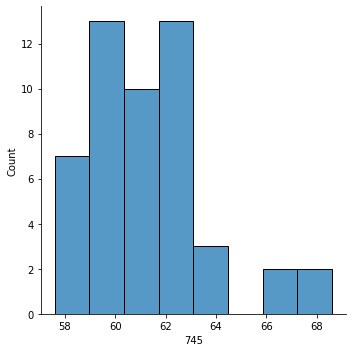

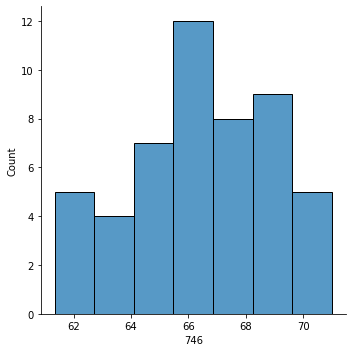

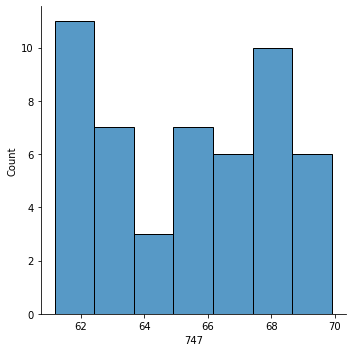

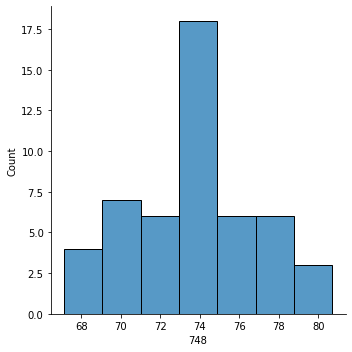

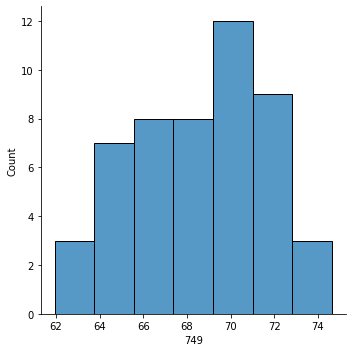

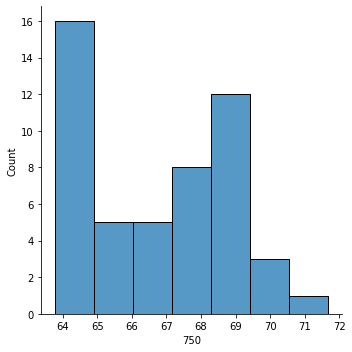

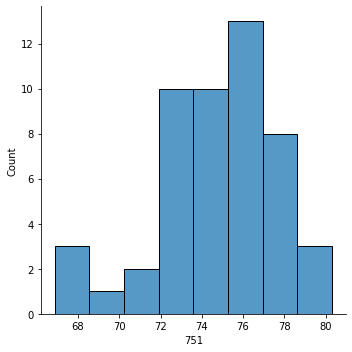

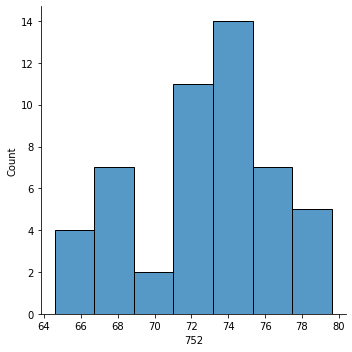

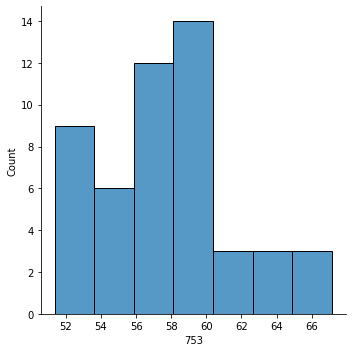

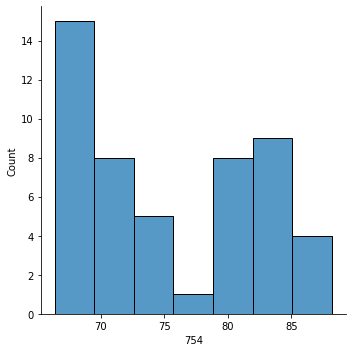

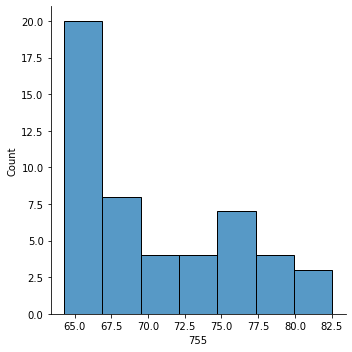

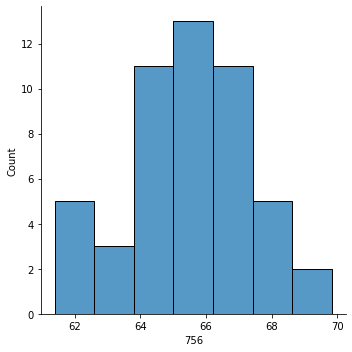

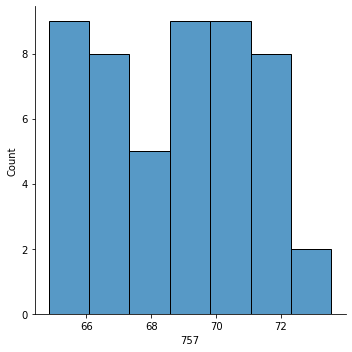

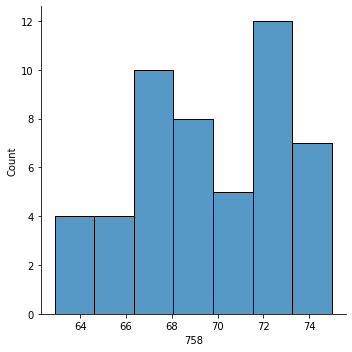

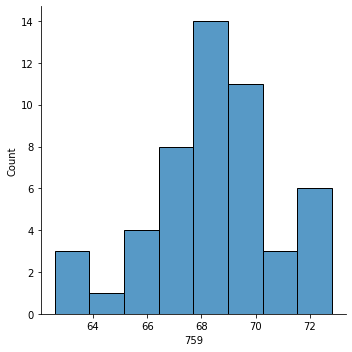

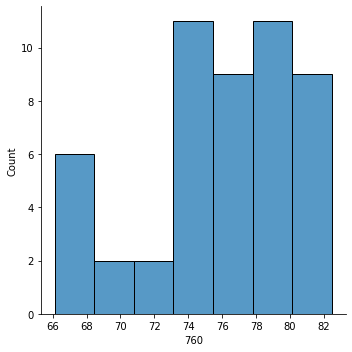

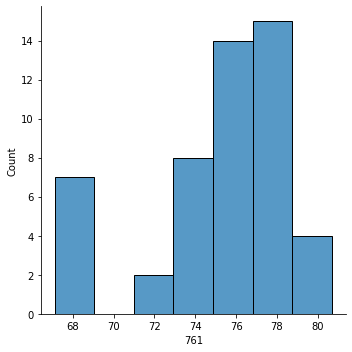

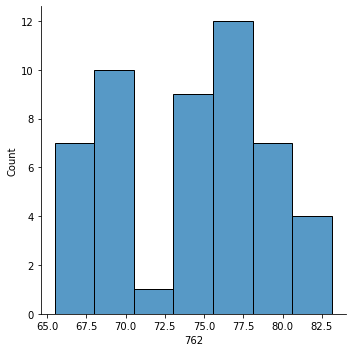

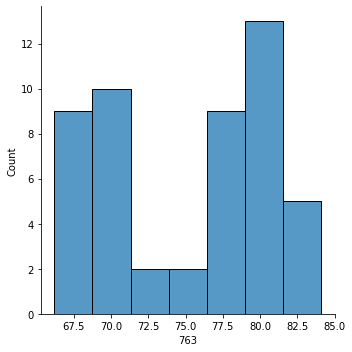

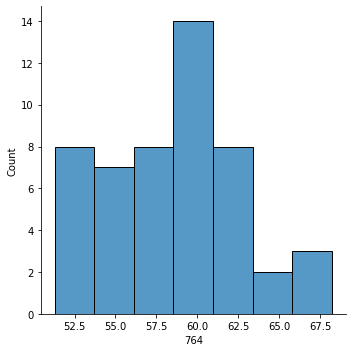

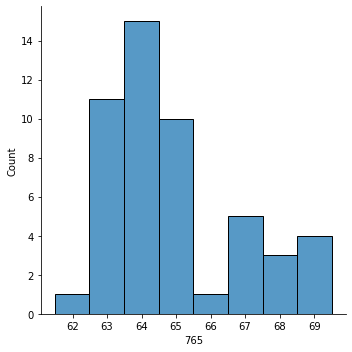

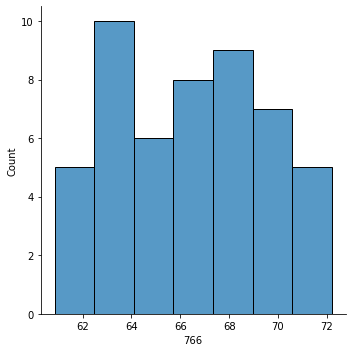

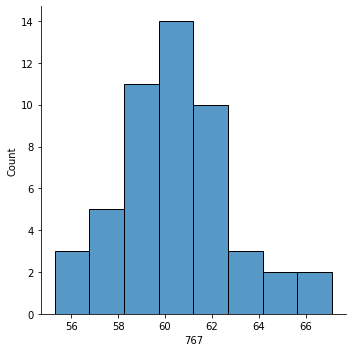

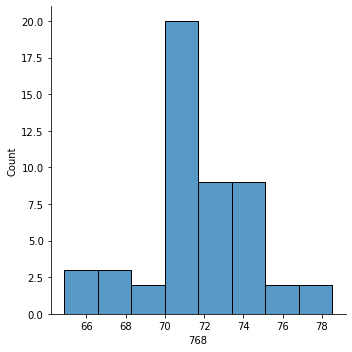

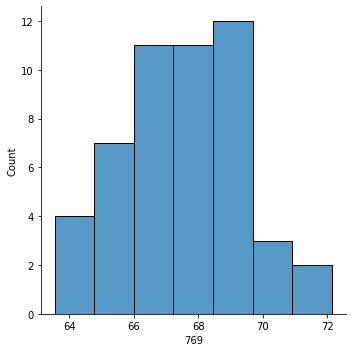

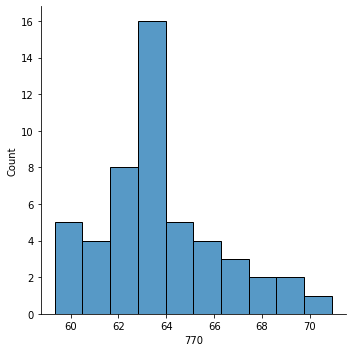

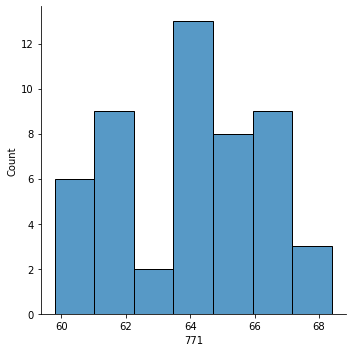

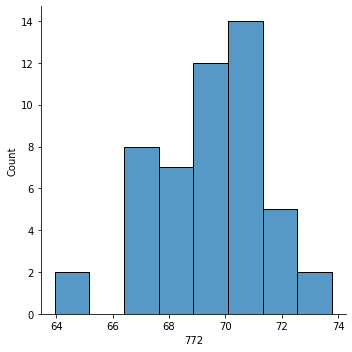

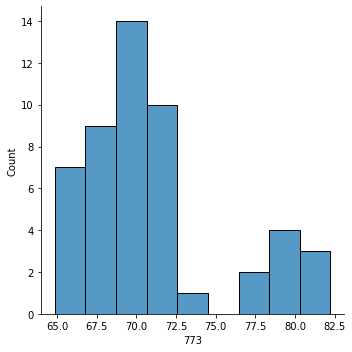

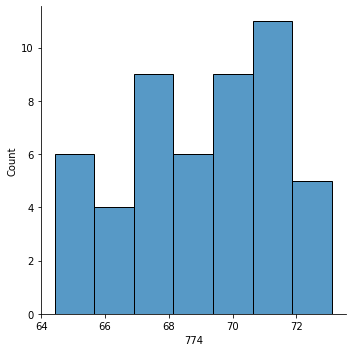

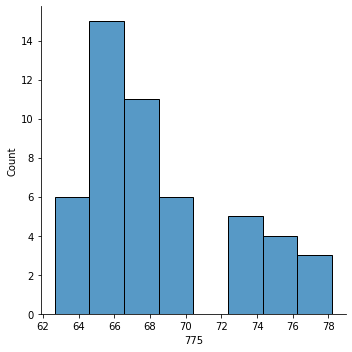

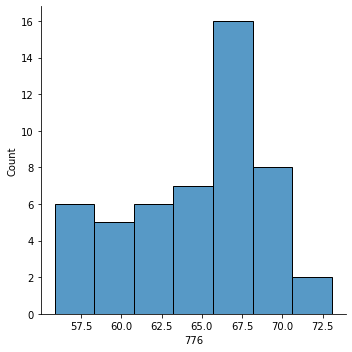

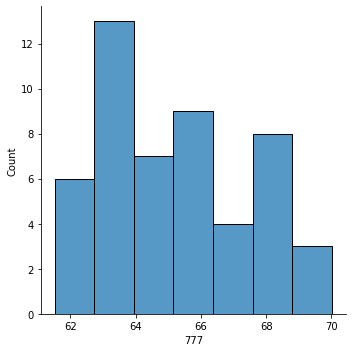

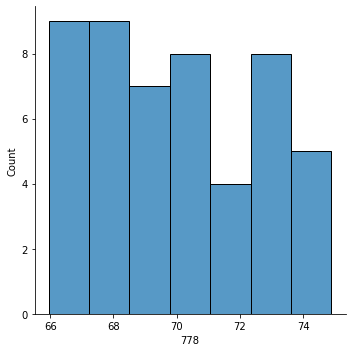

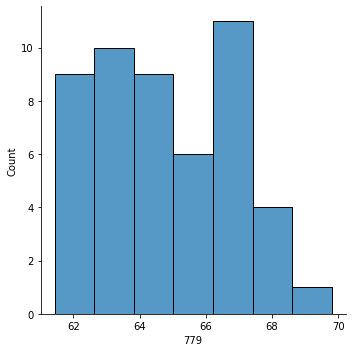

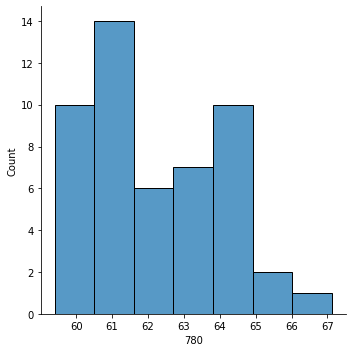

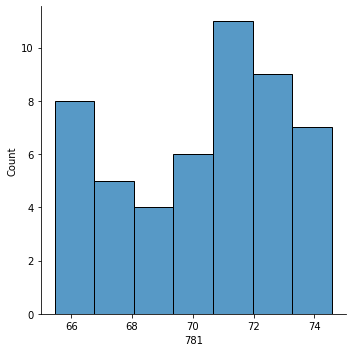

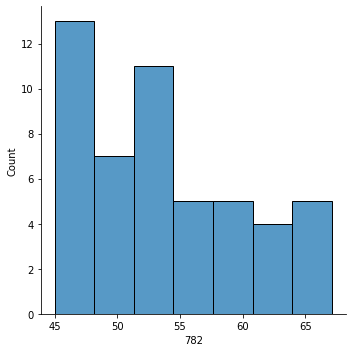

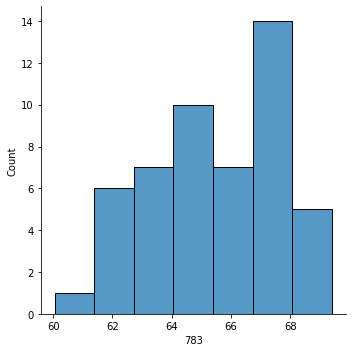

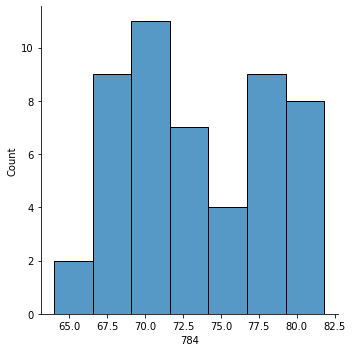

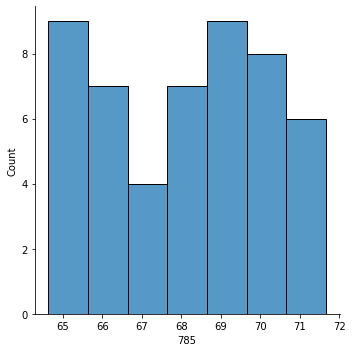

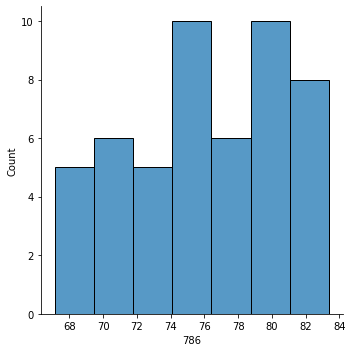

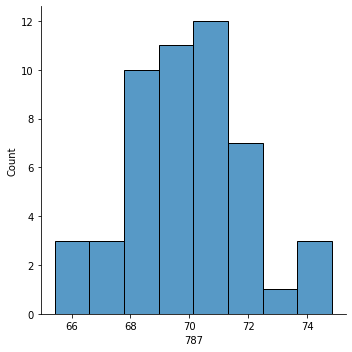

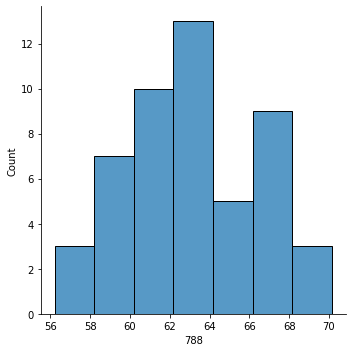

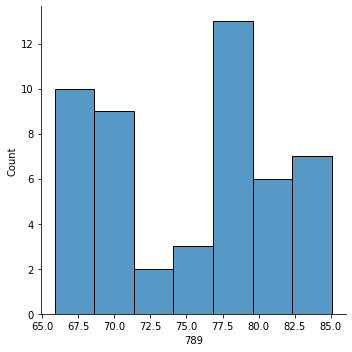

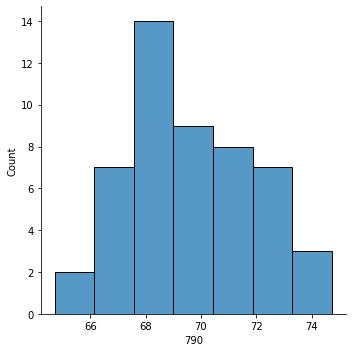

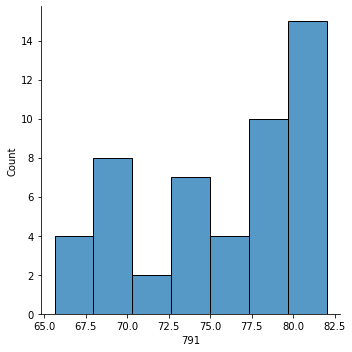

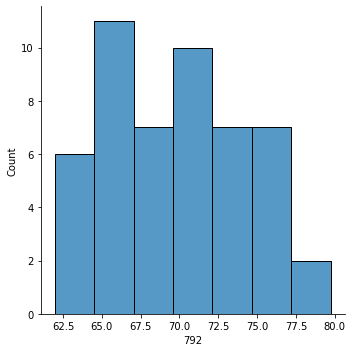

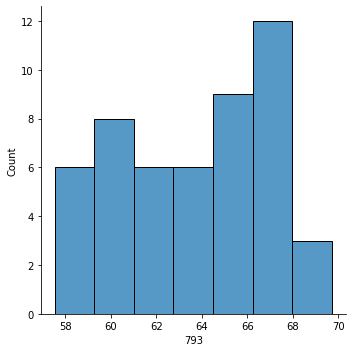

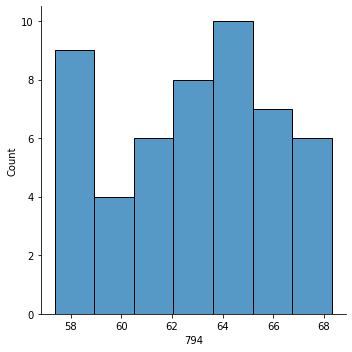

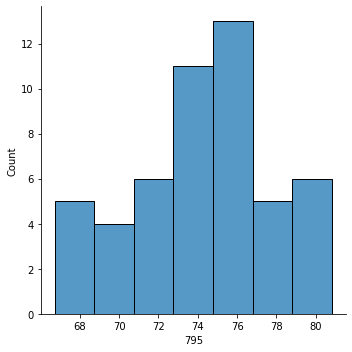

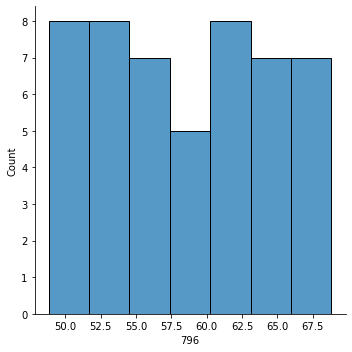

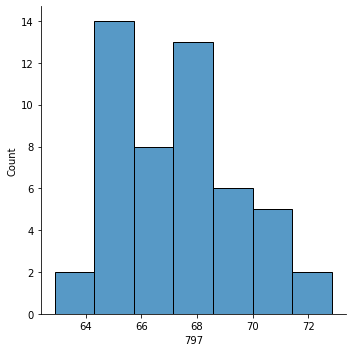

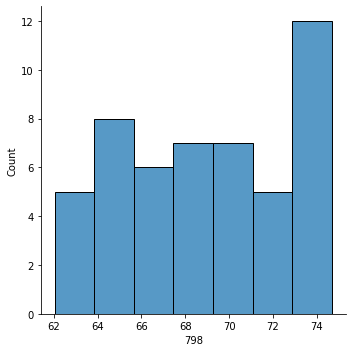

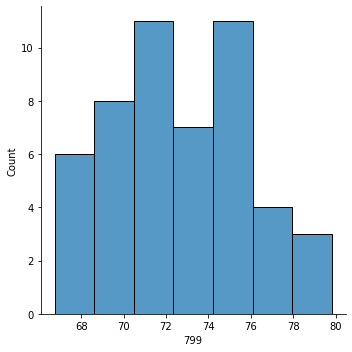

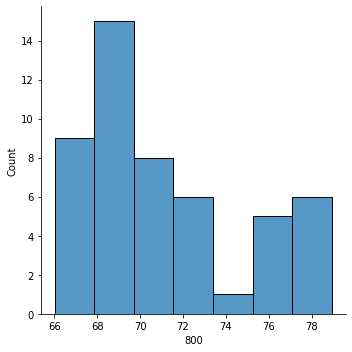

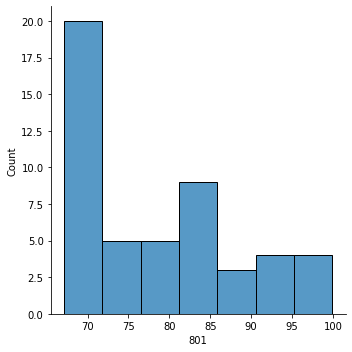

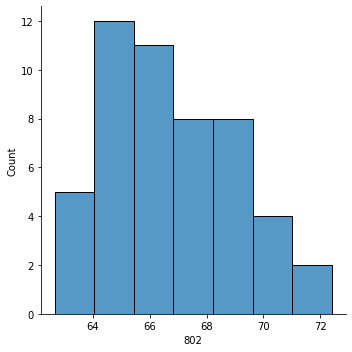

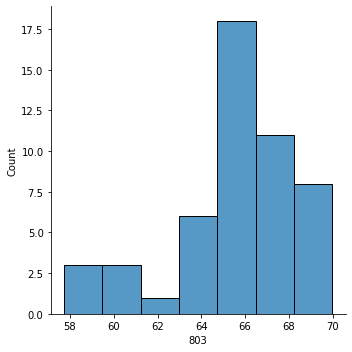

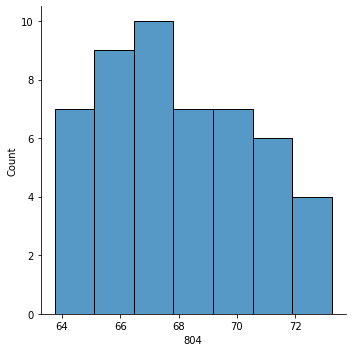

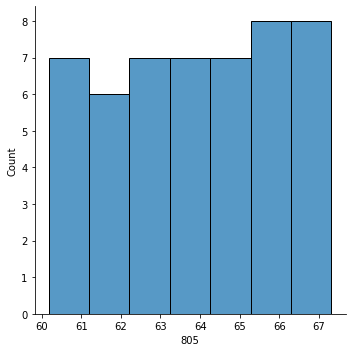

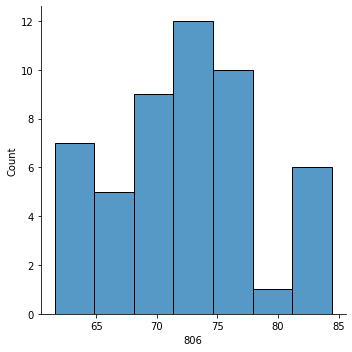

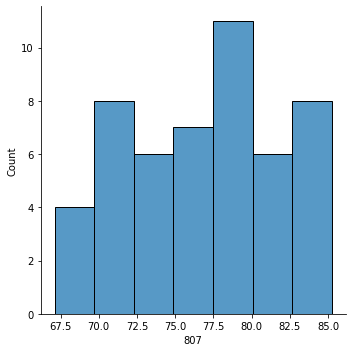

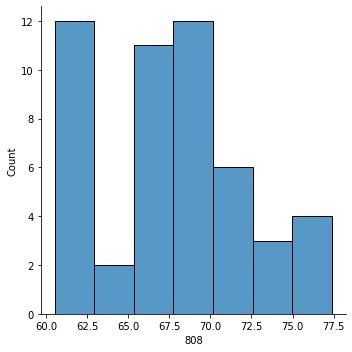

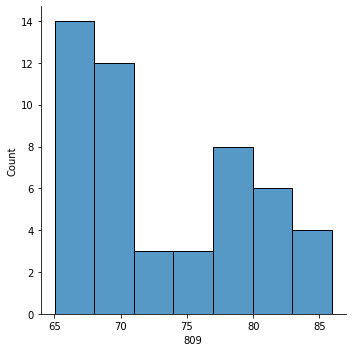

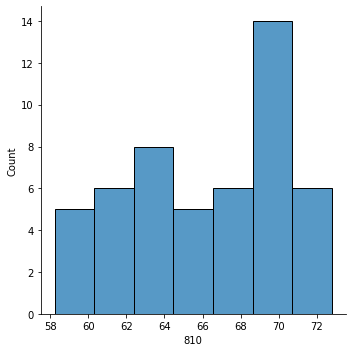

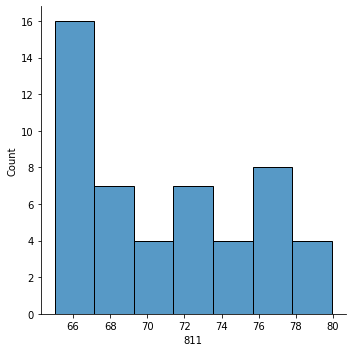

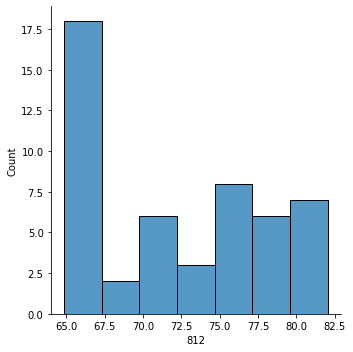

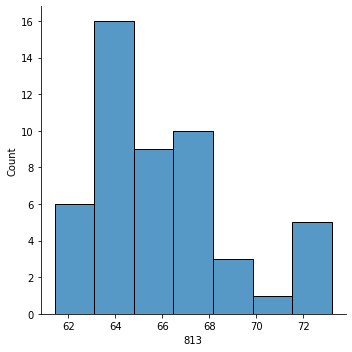

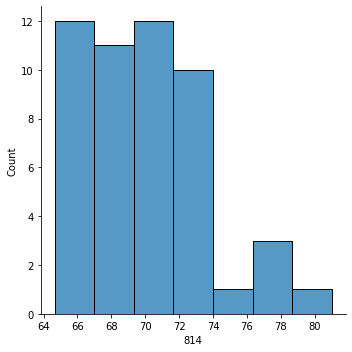

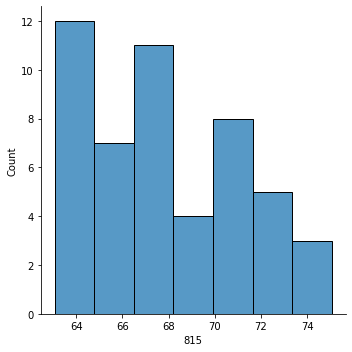

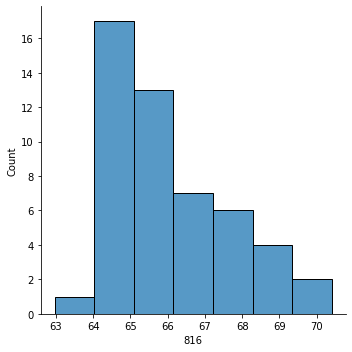

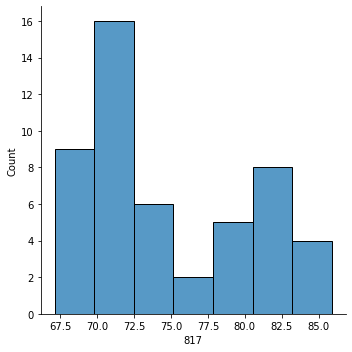

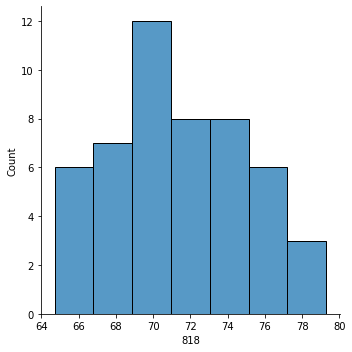

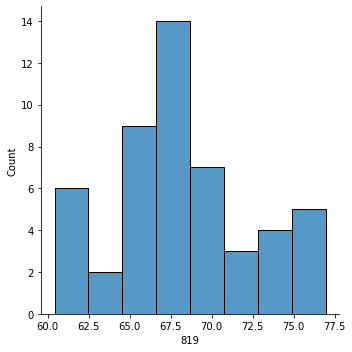

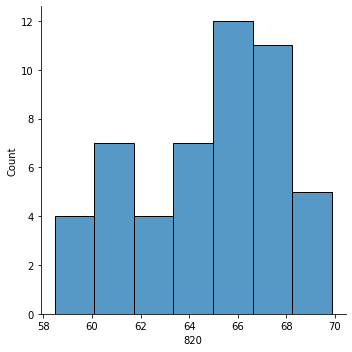

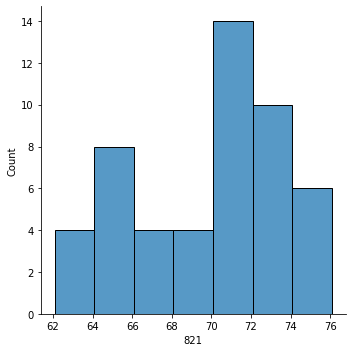

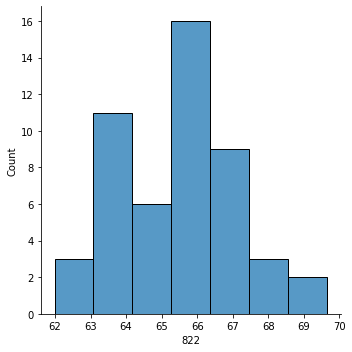

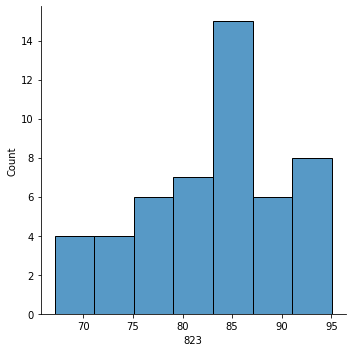

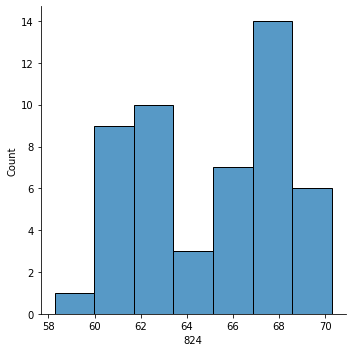

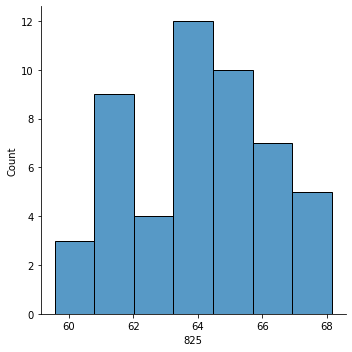

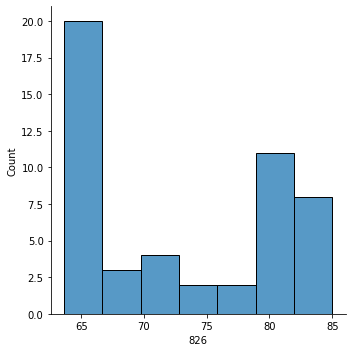

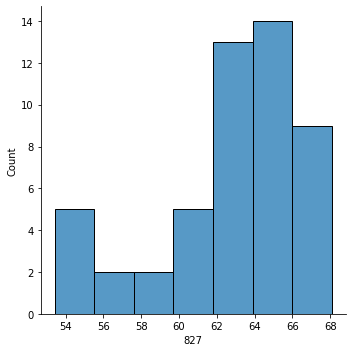

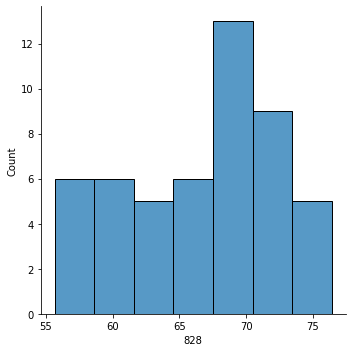

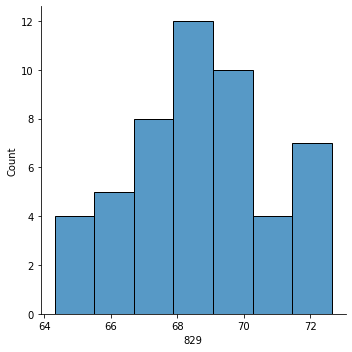

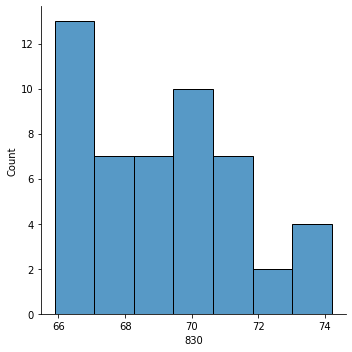

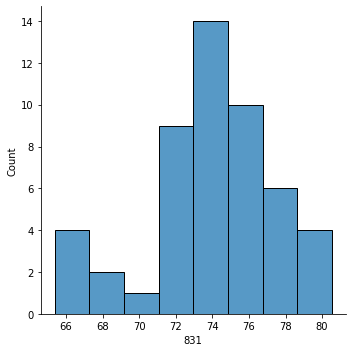

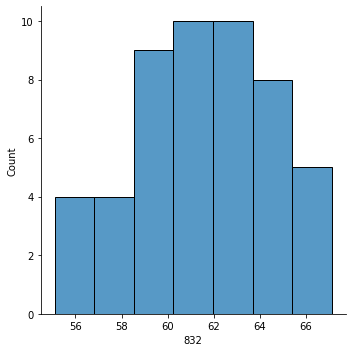

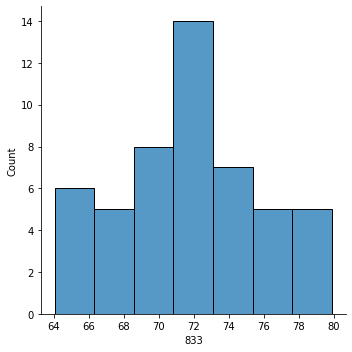

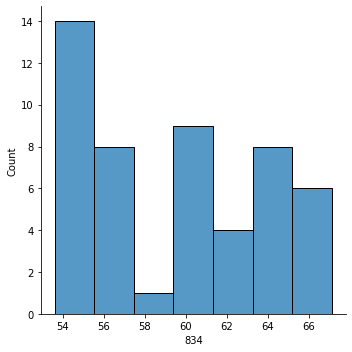

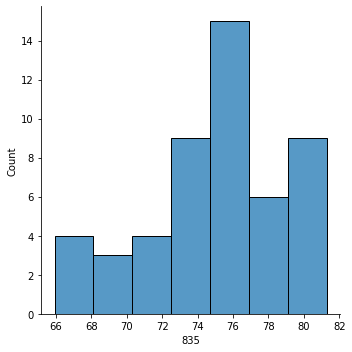

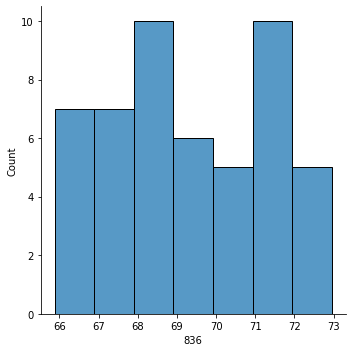

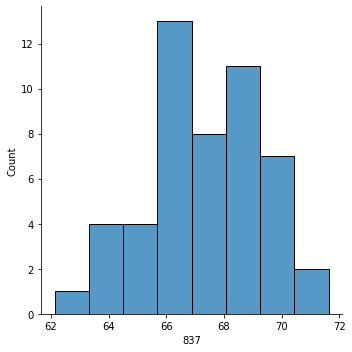

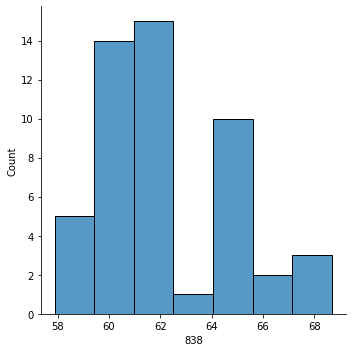

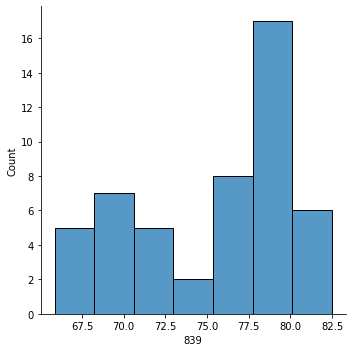

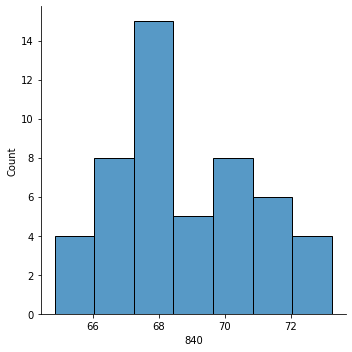

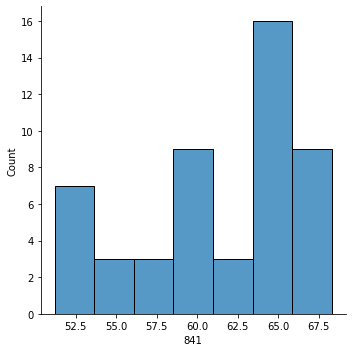

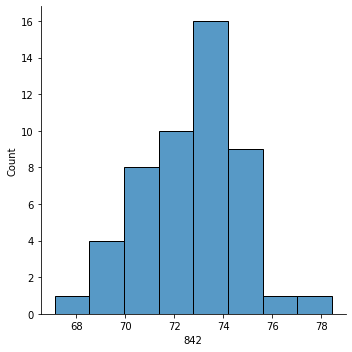

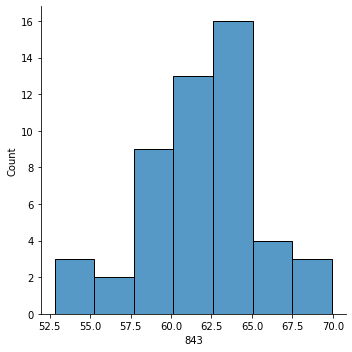

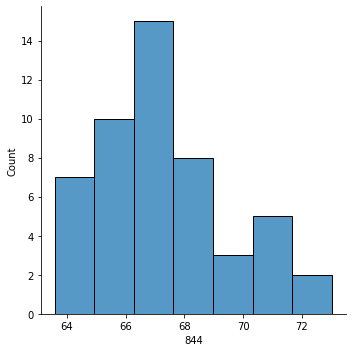

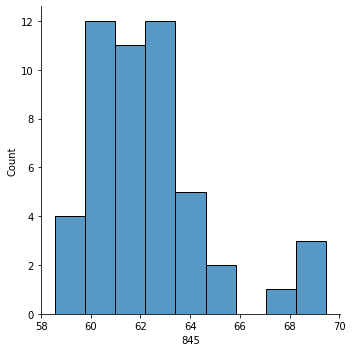

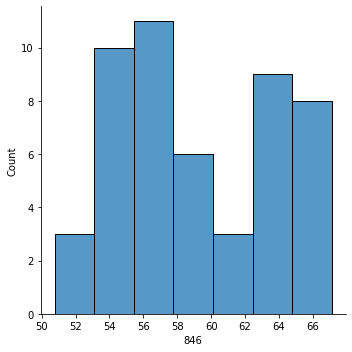

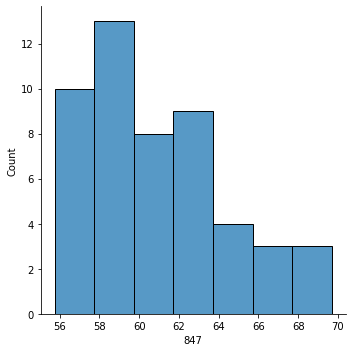

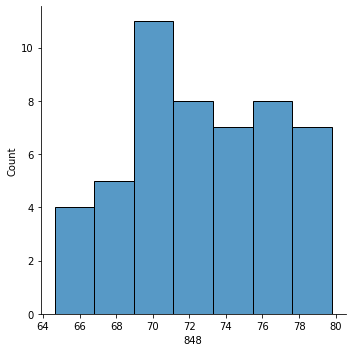

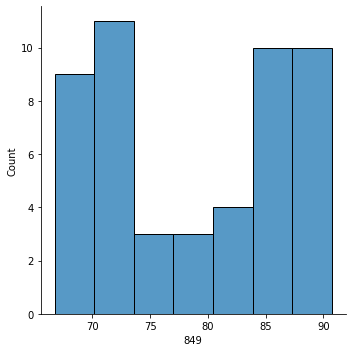

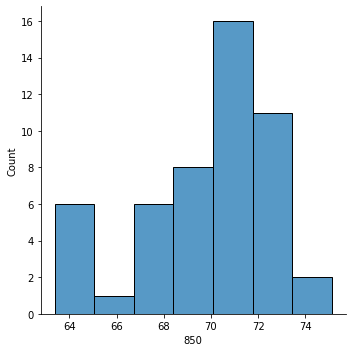

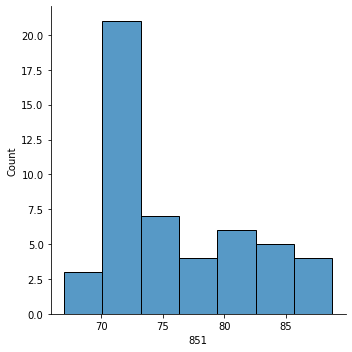

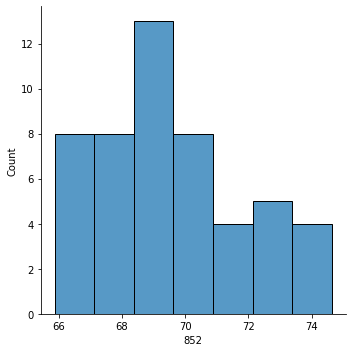

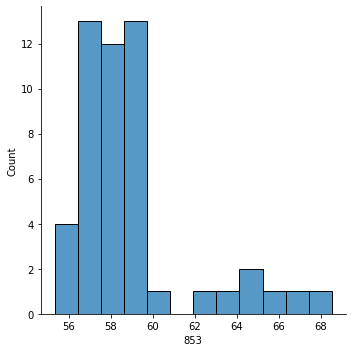

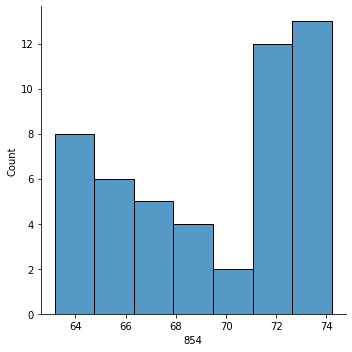

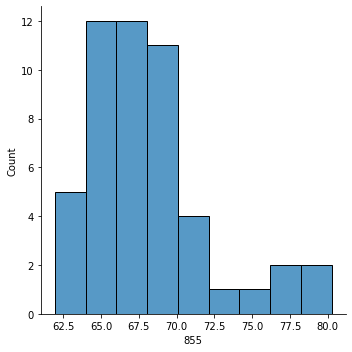

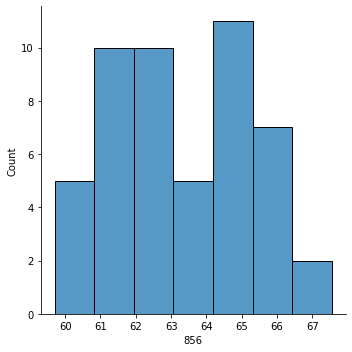

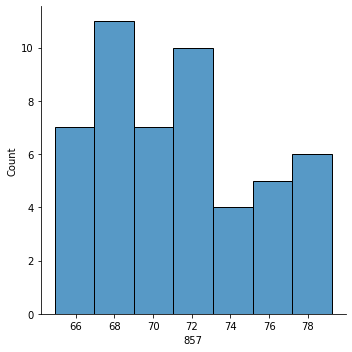

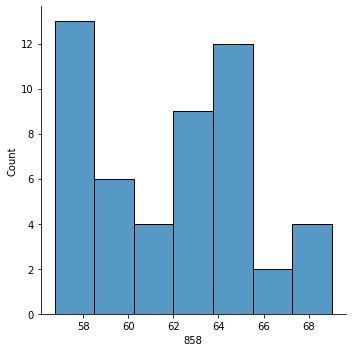

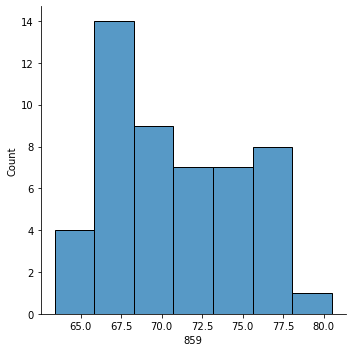

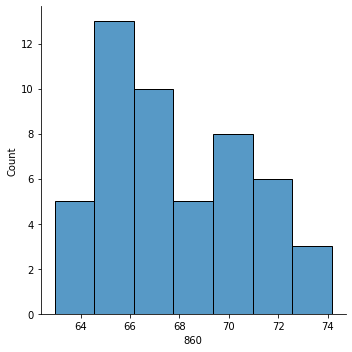

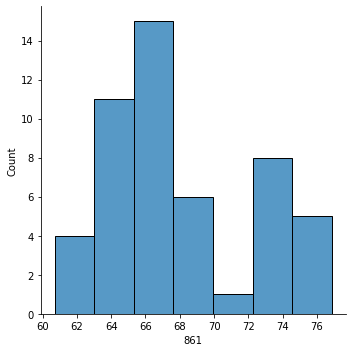

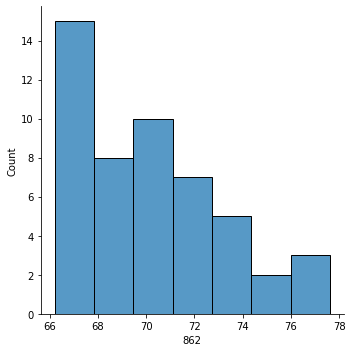

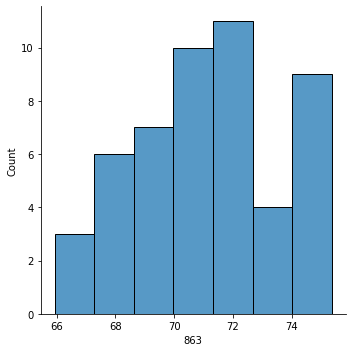

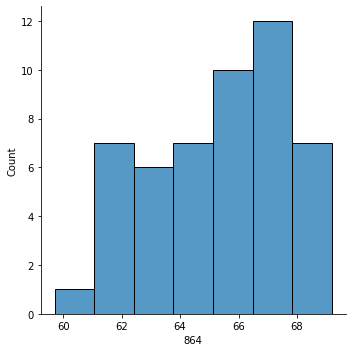

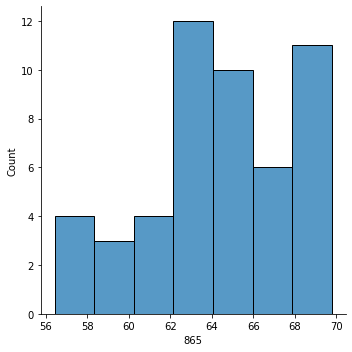

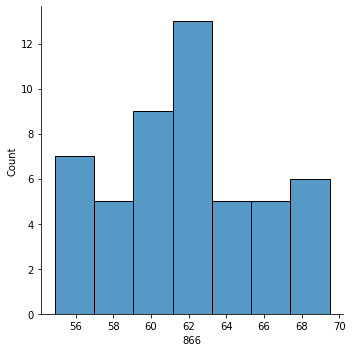

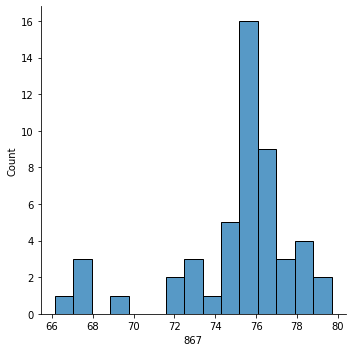

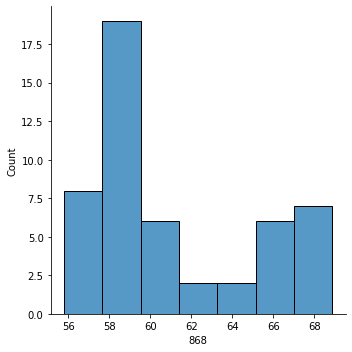

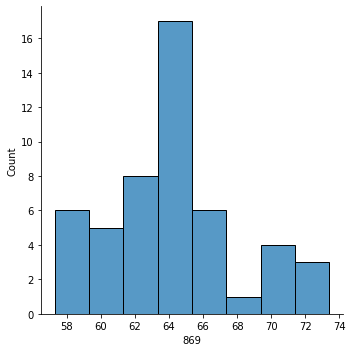

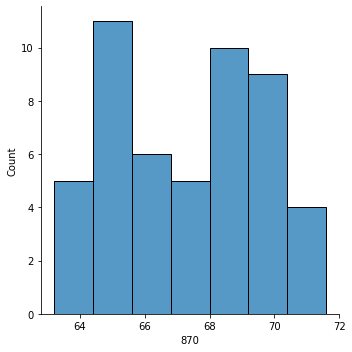

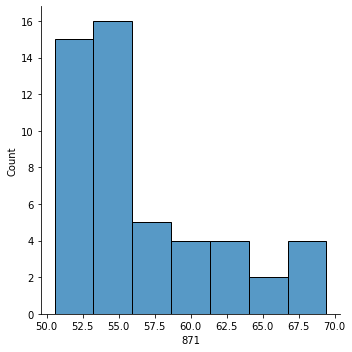

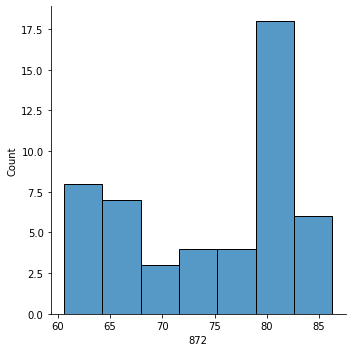

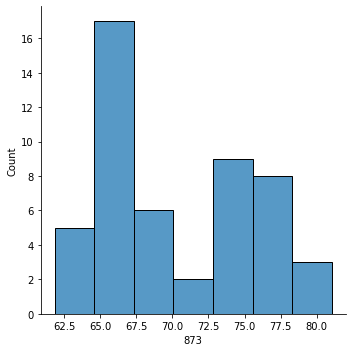

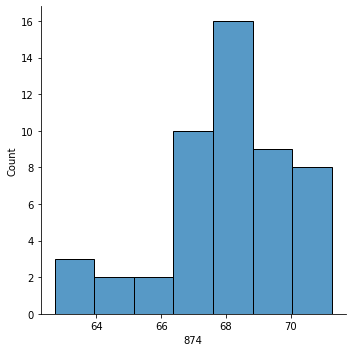

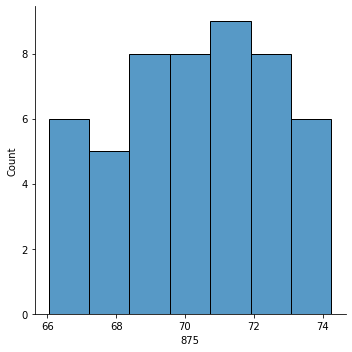

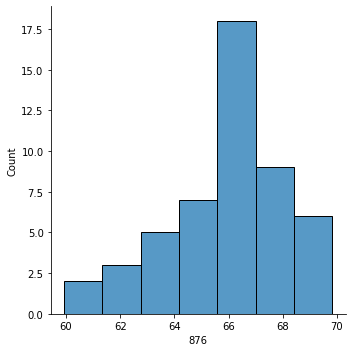

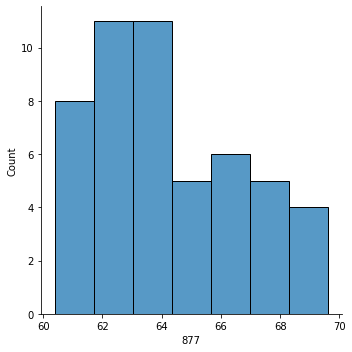

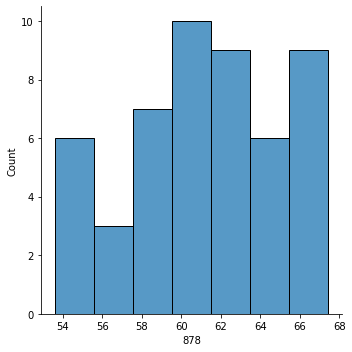

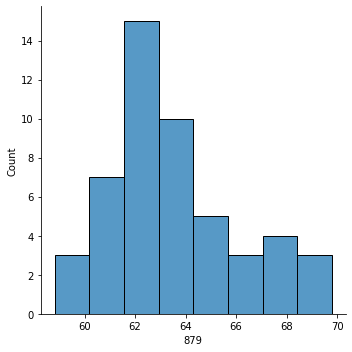

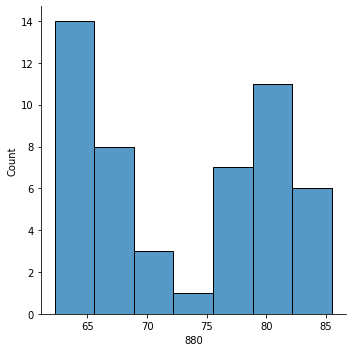

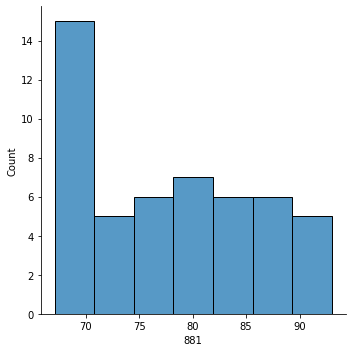

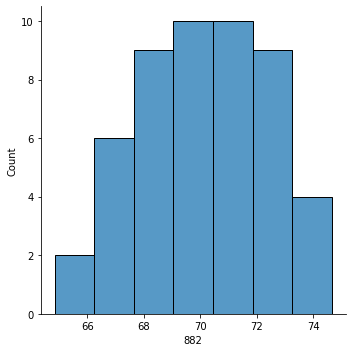

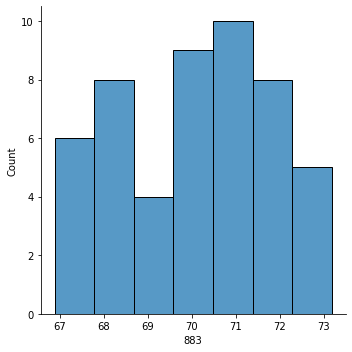

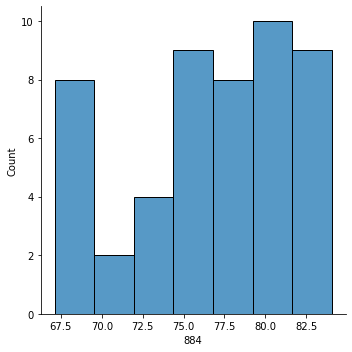

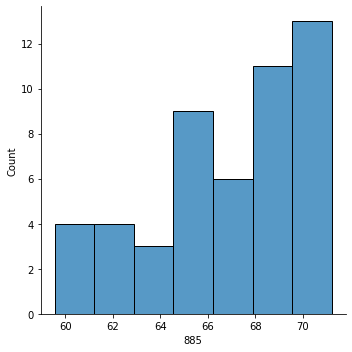

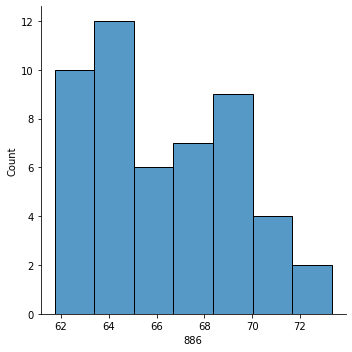

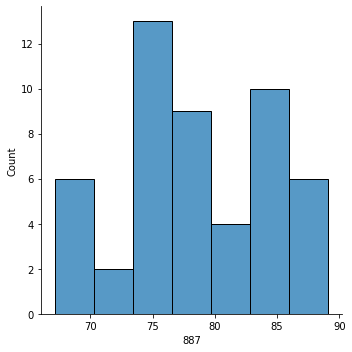

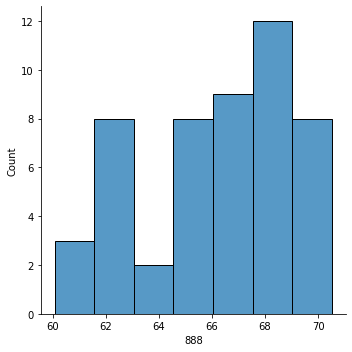

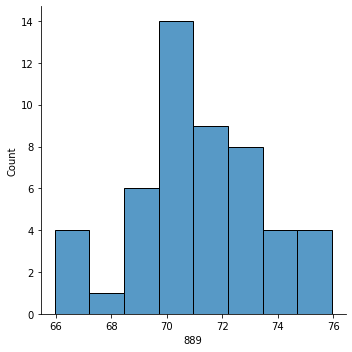

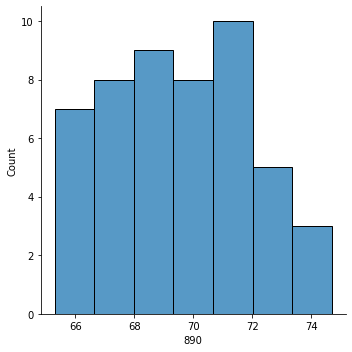

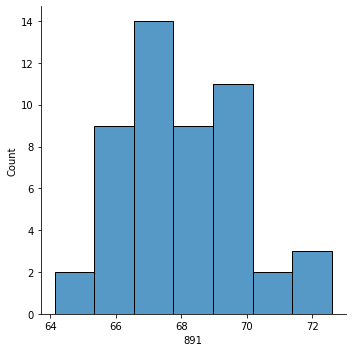

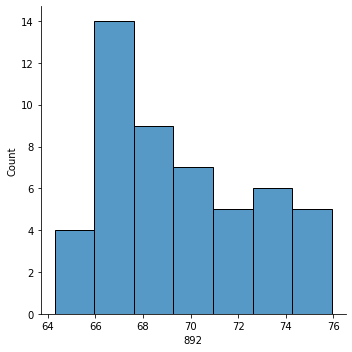

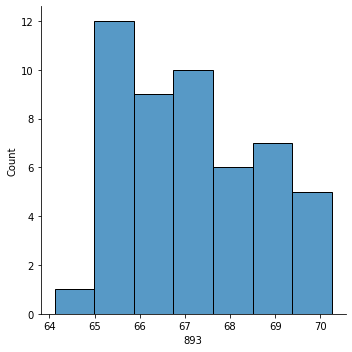

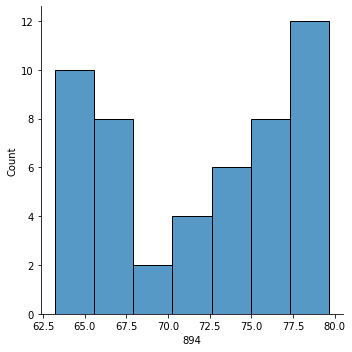

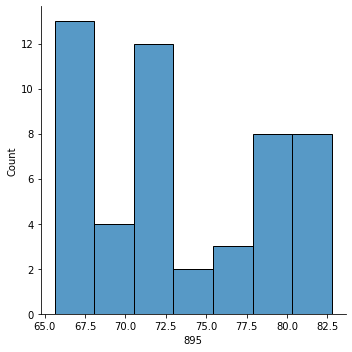

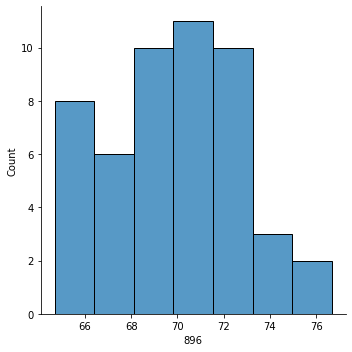

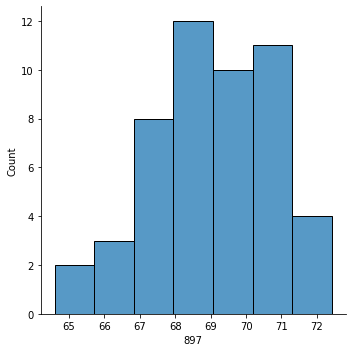

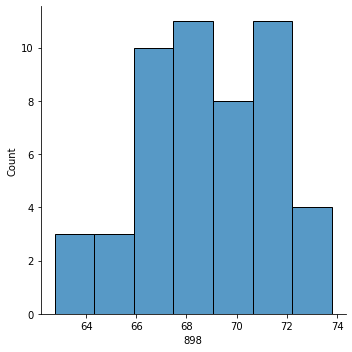

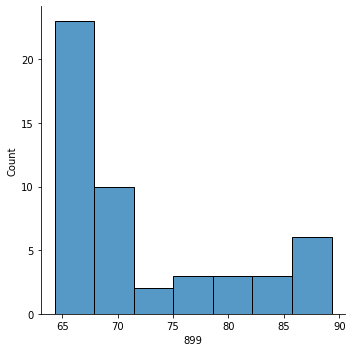

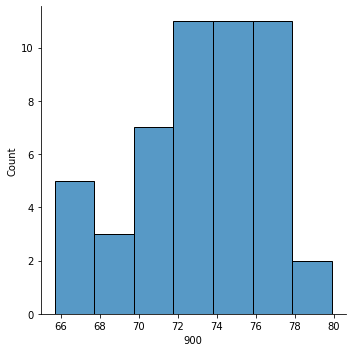

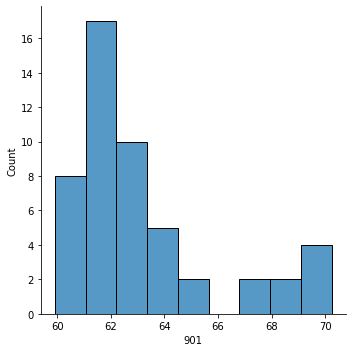

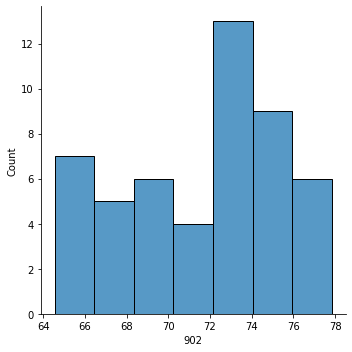

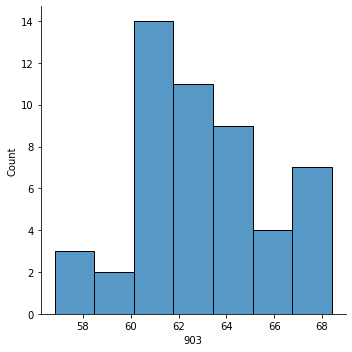

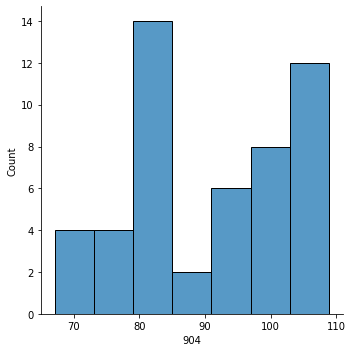

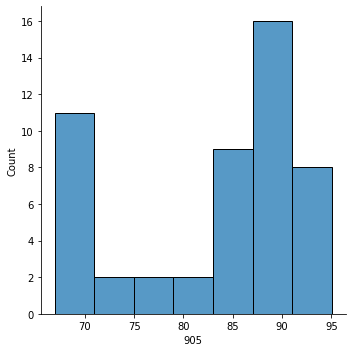

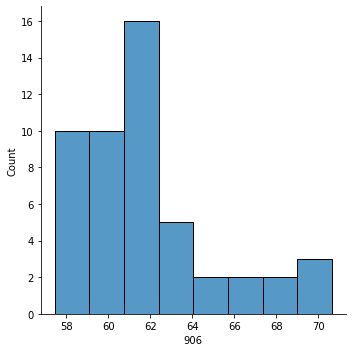

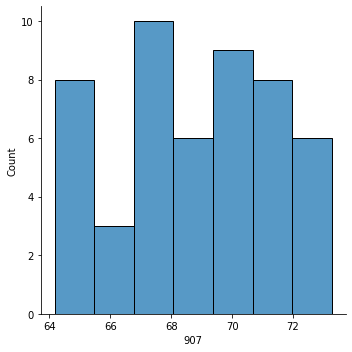

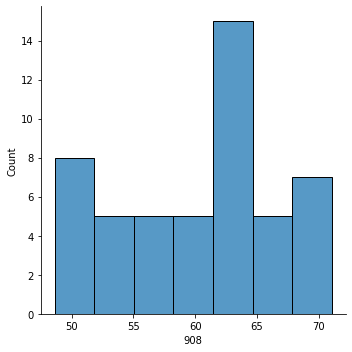

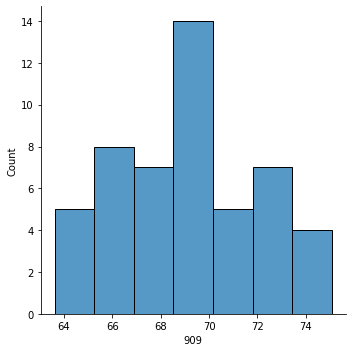

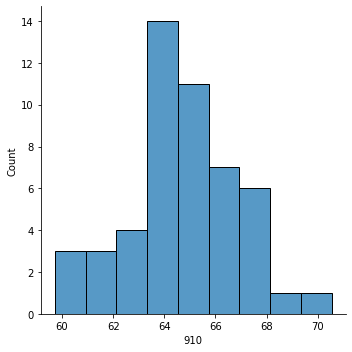

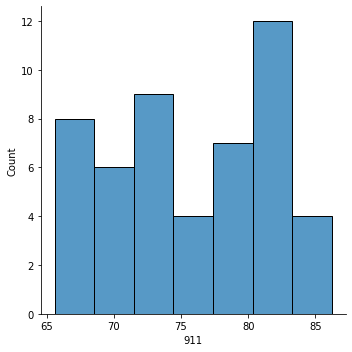

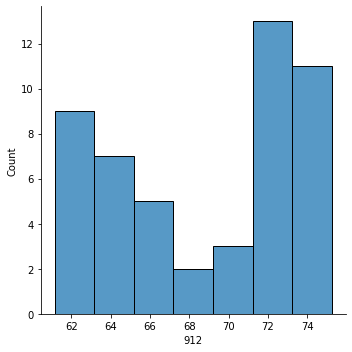

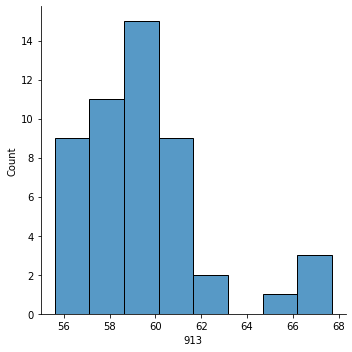

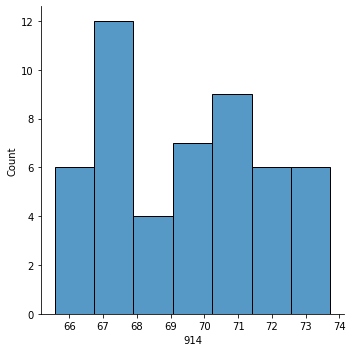

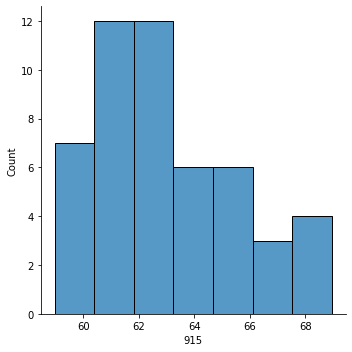

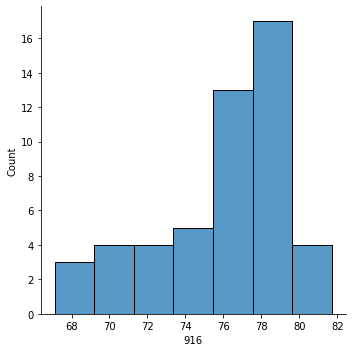

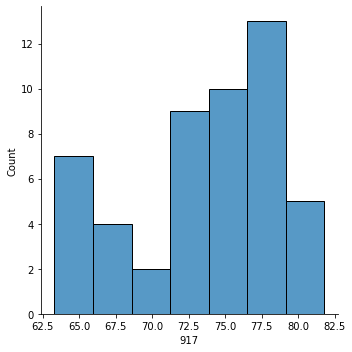

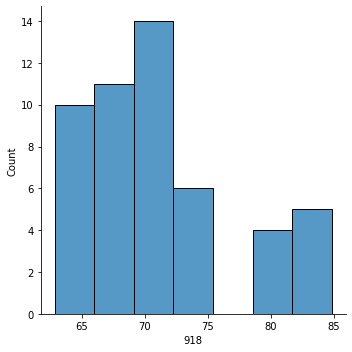

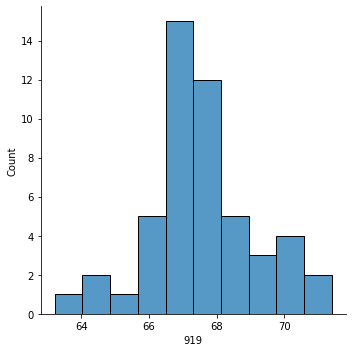

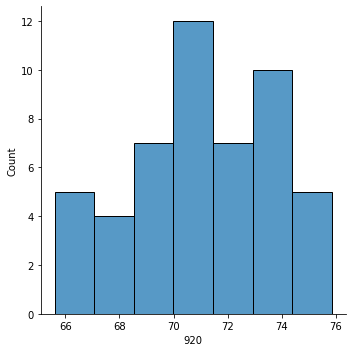

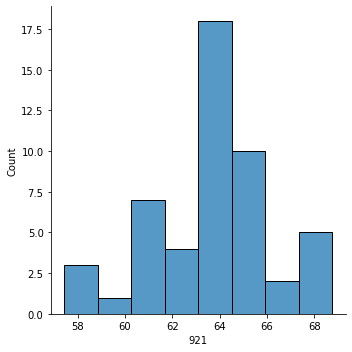

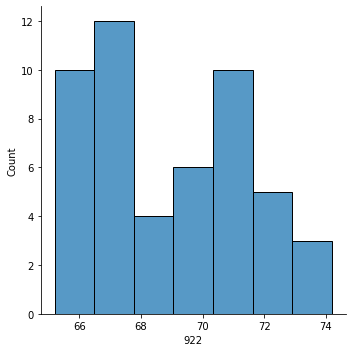

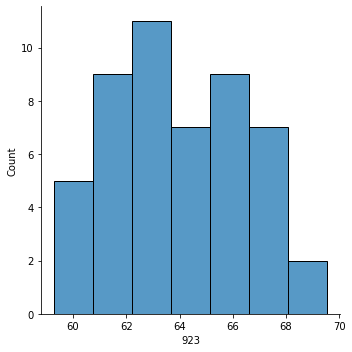

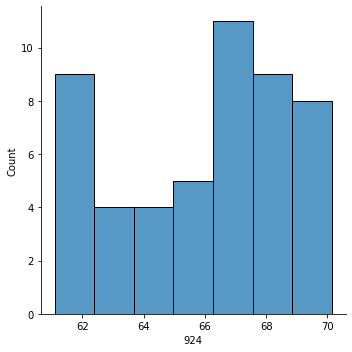

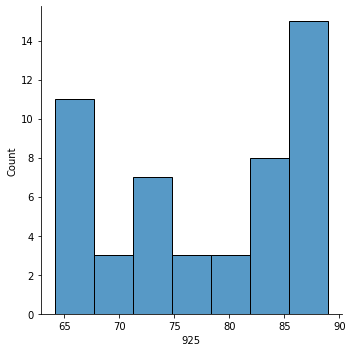

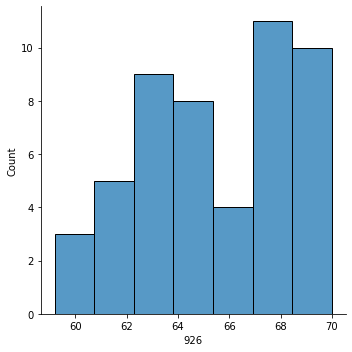

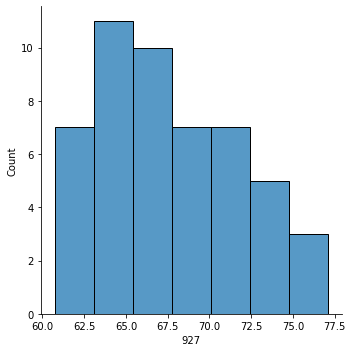

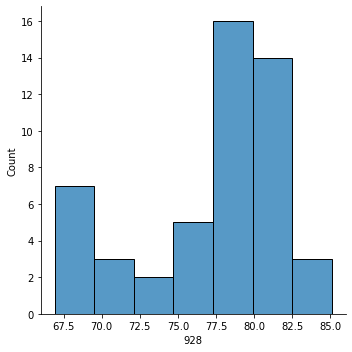

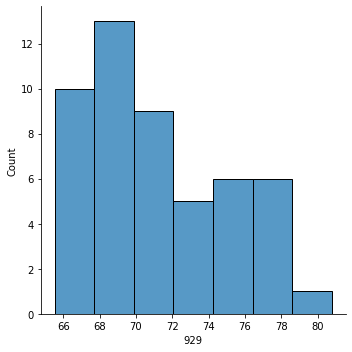

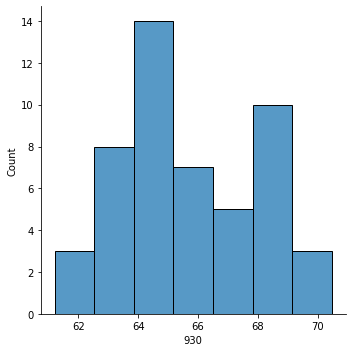

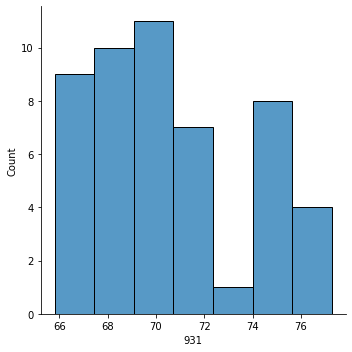

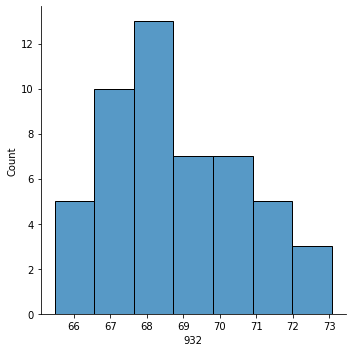

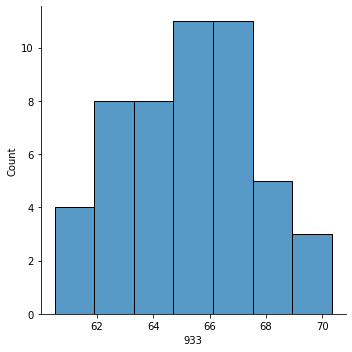

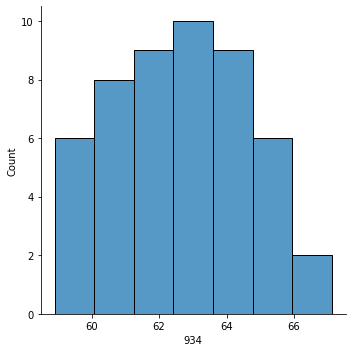

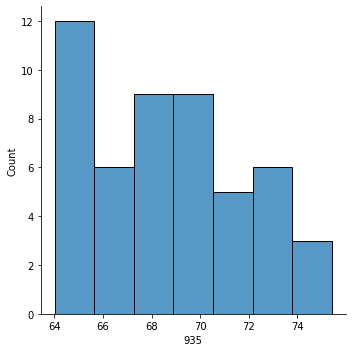

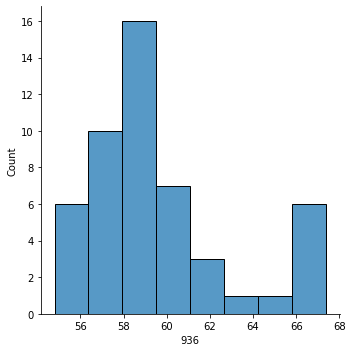

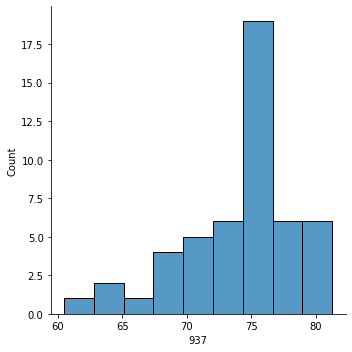

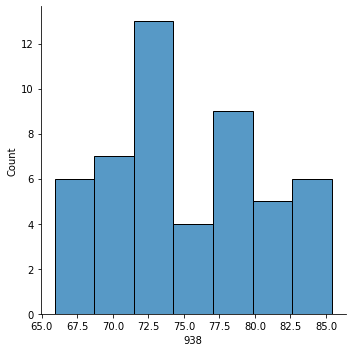

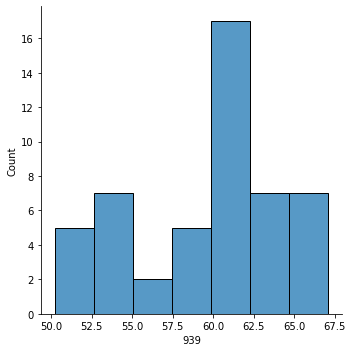

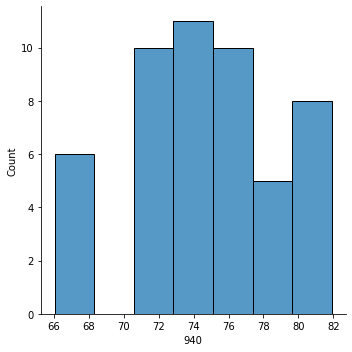

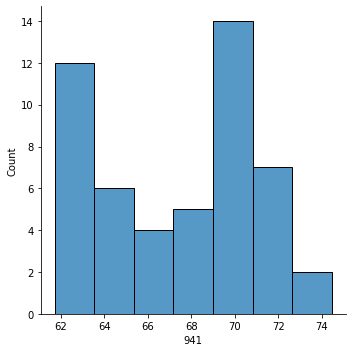

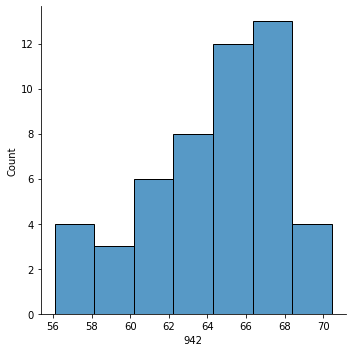

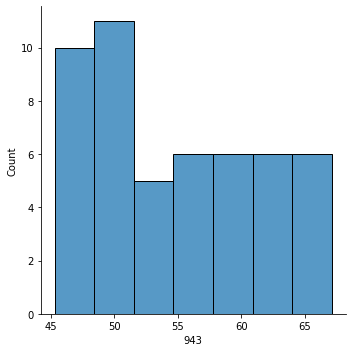

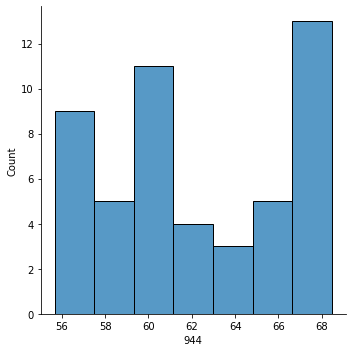

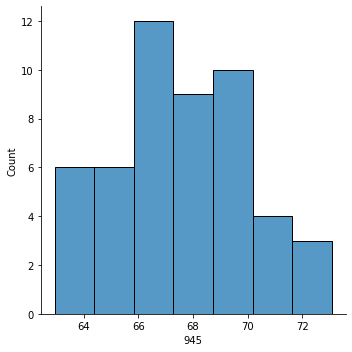

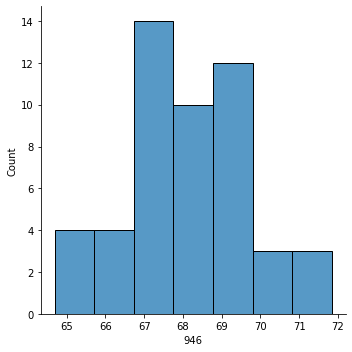

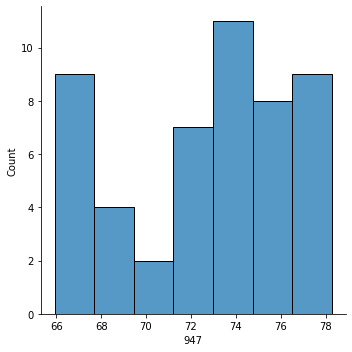

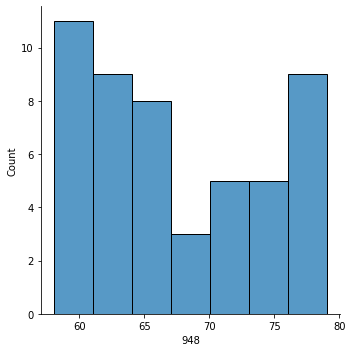

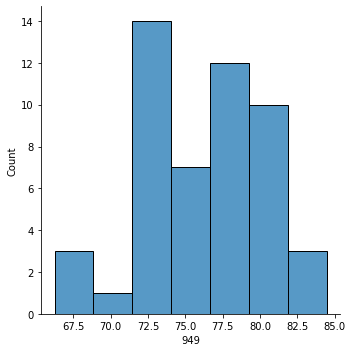

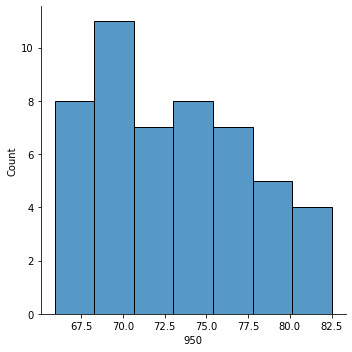

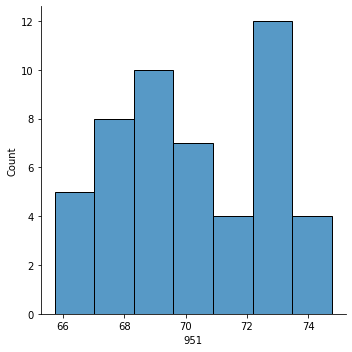

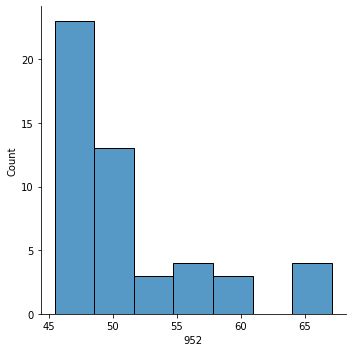

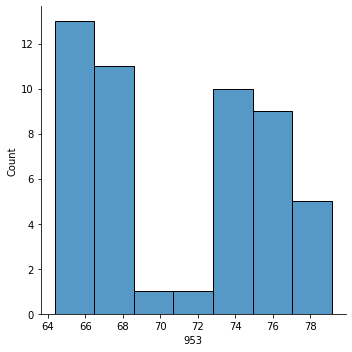

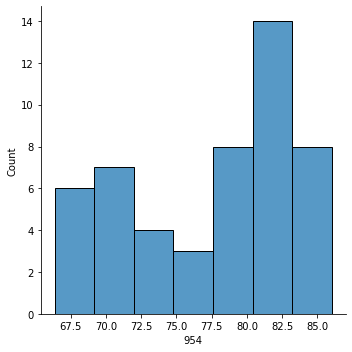

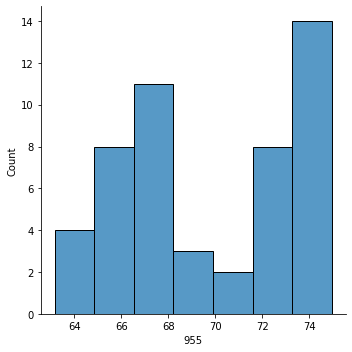

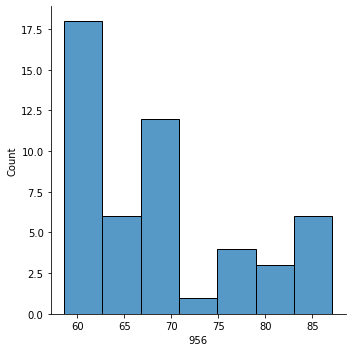

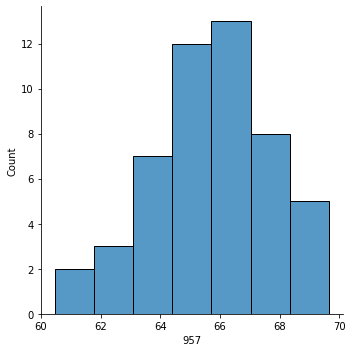

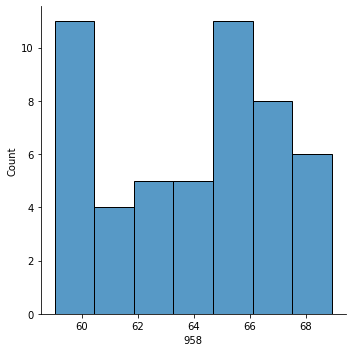

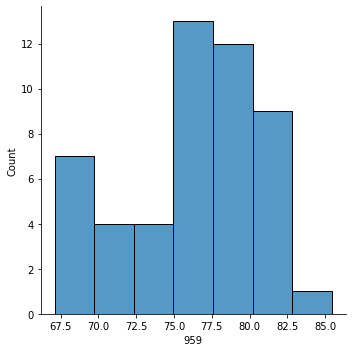

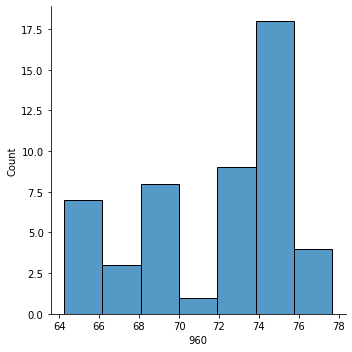

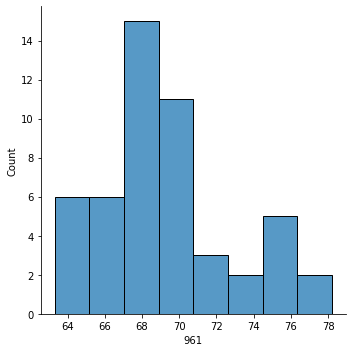

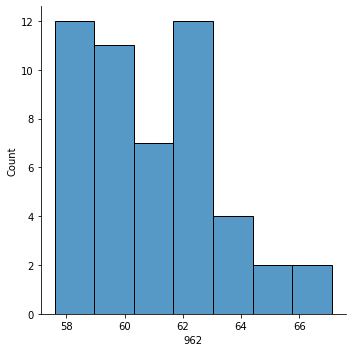

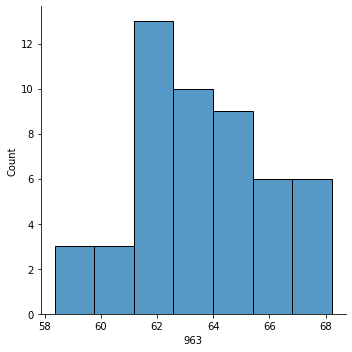

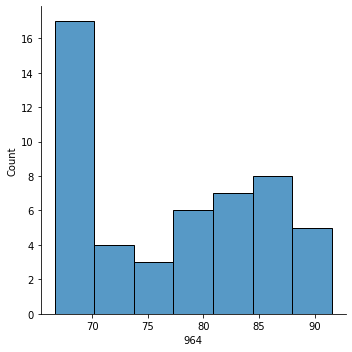

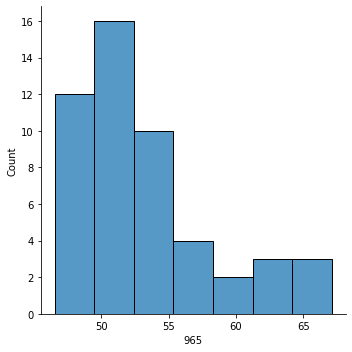

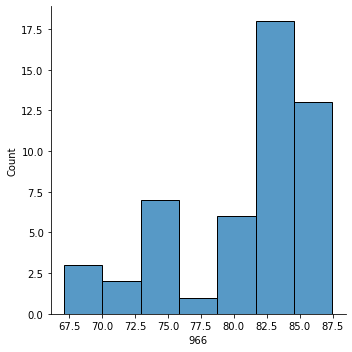

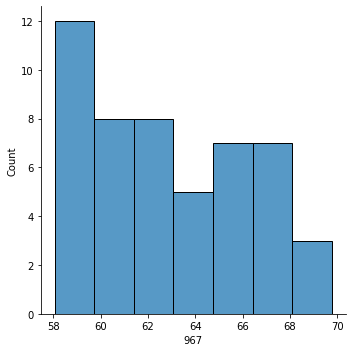

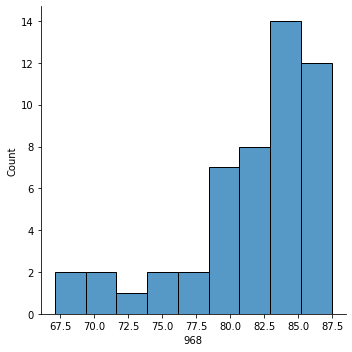

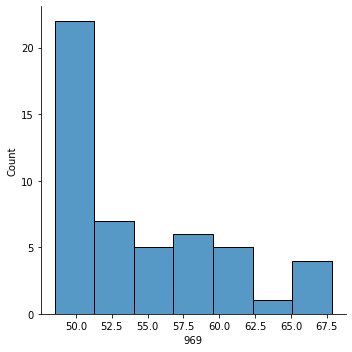

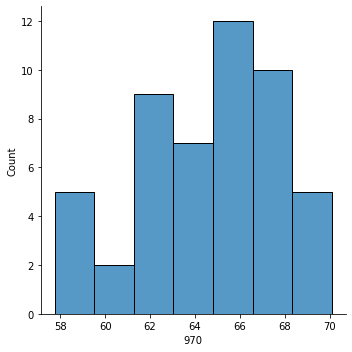

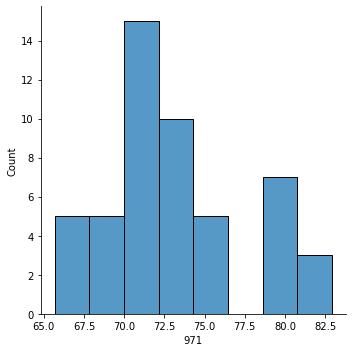

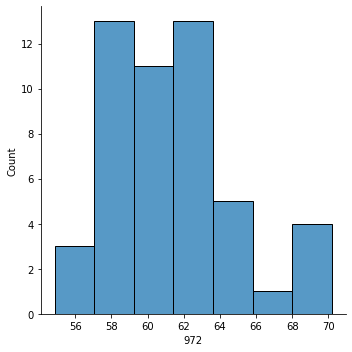

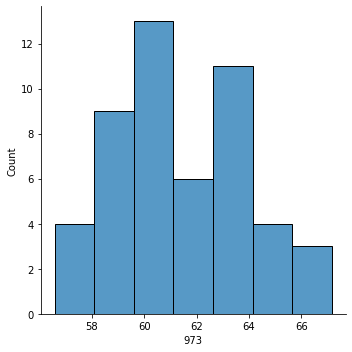

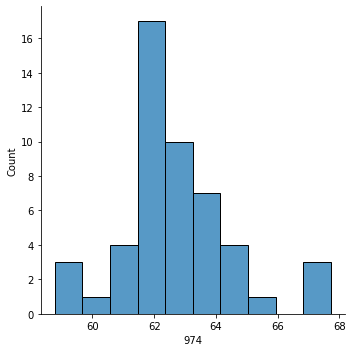

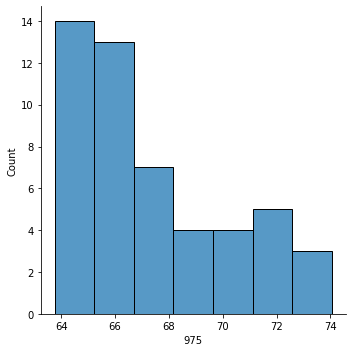

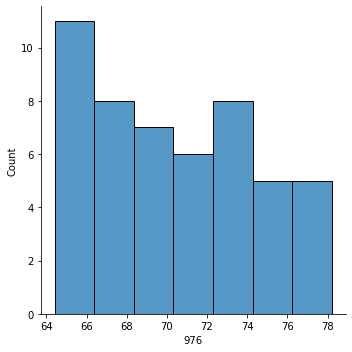

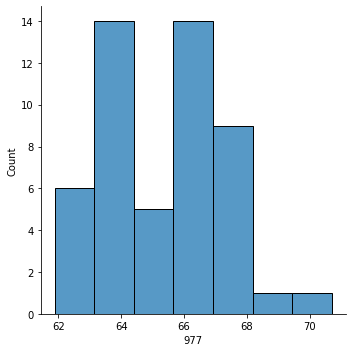

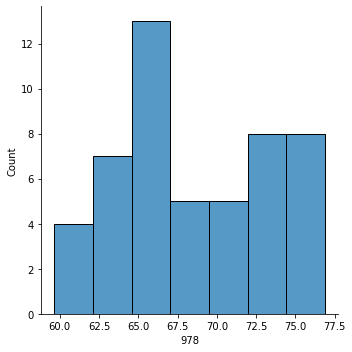

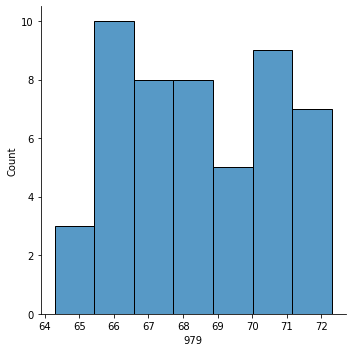

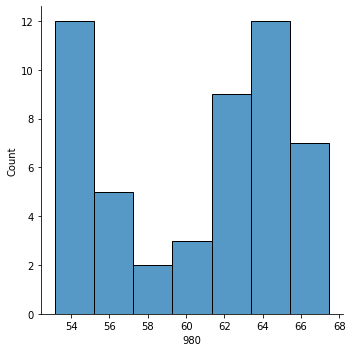

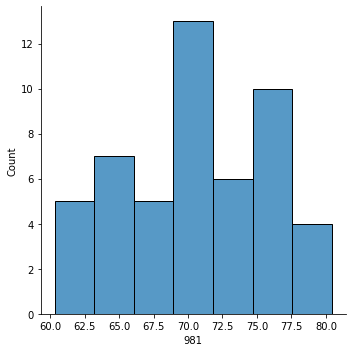

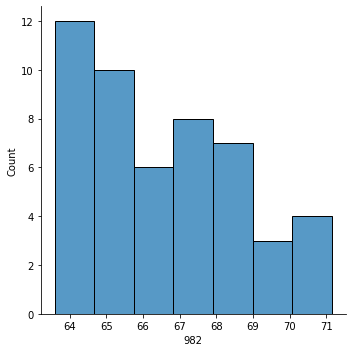

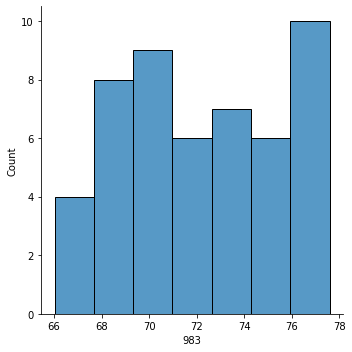

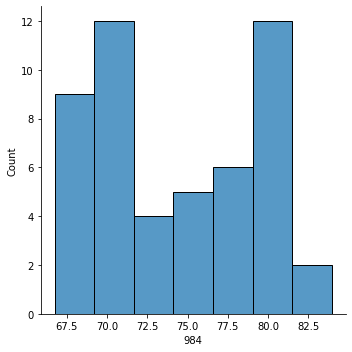

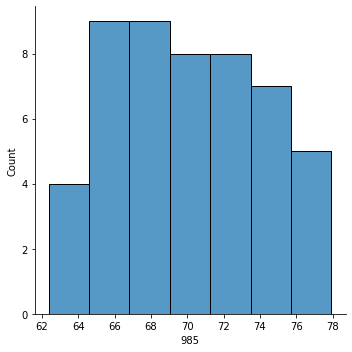

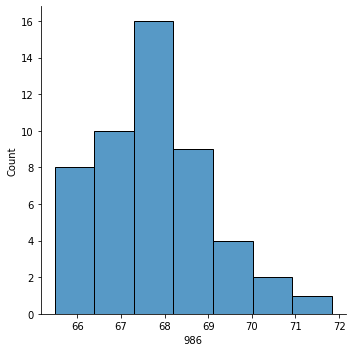

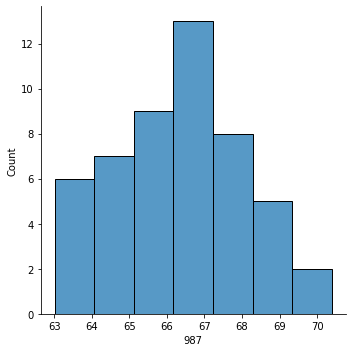

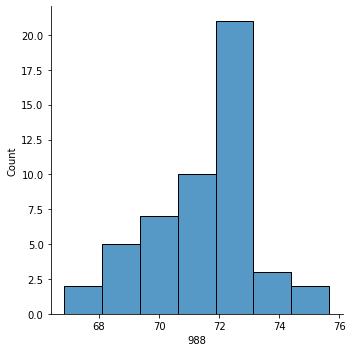

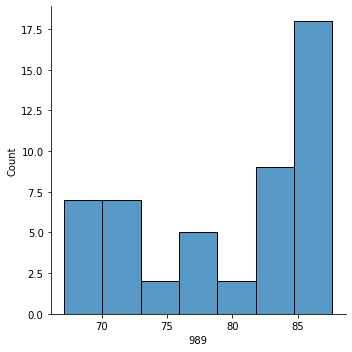

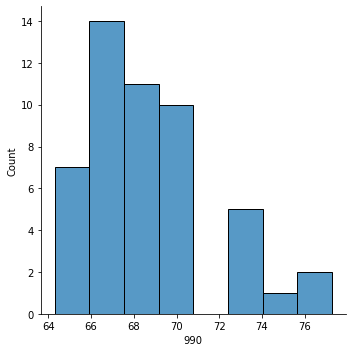

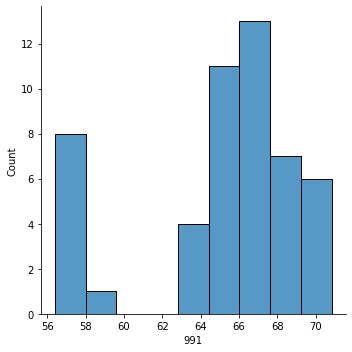

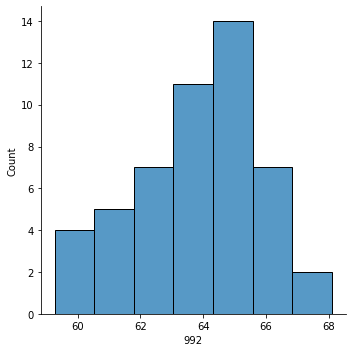

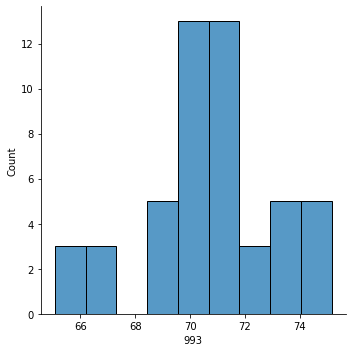

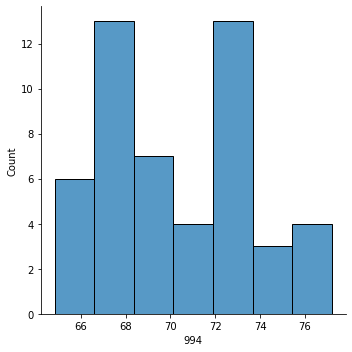

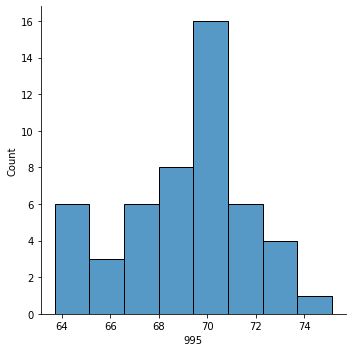

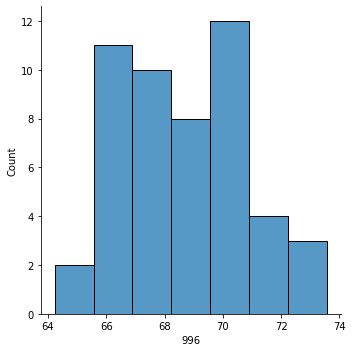

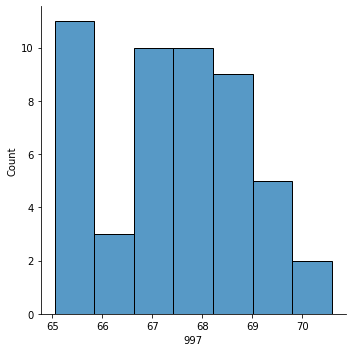

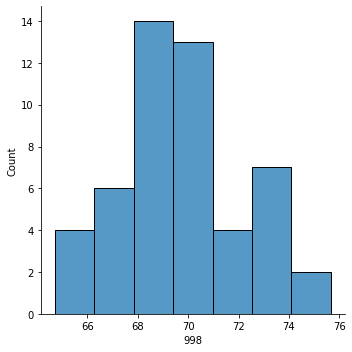

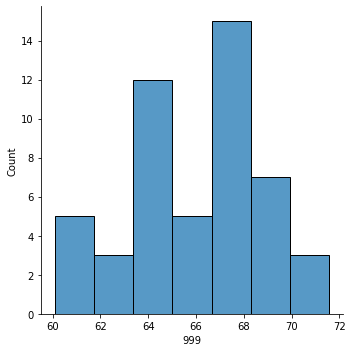

In [27]:
for i in range(len(df.columns)):
    sns.displot(df[i])